In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PBA_Fetcher import PBA_Fetcher
from wordcloud import WordCloud, ImageColorGenerator
from sqlalchemy import create_engine
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from math import pi
from PIL import Image

In [2]:
fetcher = PBA_Fetcher()

In [5]:
fetcher.get_avg_player_team()

year conference   player_name team_name pos  j_number  height  weight  \
0     2017        GOV     L. Henton       ALA  SF       0.0    78.0   206.0   
1     2017        GOV     C. Abueva       ALA  PF       0.0    73.0     0.0   
2     2017        GOV      J. Casio       ALA   G       0.0    70.0     0.0   
3     2017        GOV   C. Banchero       ALA   G      22.0    74.0     0.0   
4     2017        GOV     V. Manuel       ALA   F       0.0    76.0   227.0   
...    ...        ...           ...       ...  ..       ...     ...     ...   
1417  2020         PH     R. Escoto       SMB   C       0.0    78.0   185.0   
1418  2020         PH      P. Zamar       SMB   G       0.0     0.0   215.0   
1419  2020         PH  R. Gamalinda       SMB   G       0.0    76.0     0.0   
1420  2020         PH   V. Pessumal       SMB   G       0.0    74.0   215.0   
1421  2020         PH     W. Comboy       SMB   G       0.0     0.0     0.0   

      ply_GP  ply_MIN  ...  tm_TO  tm_PTO  tm_PF  tm_FBm  tm_FBa  tm_FBm%  \
0         11    41.81  ...  15.64   17.64  22.27    7.18    8.18    11.91   
1          8    28.19  ...  15.64   17.64  22.27    7.18    8.18    11.91   
2         11    23.81  ...  15.64   17.64  22.27    7.18    8.18    11.91   
3         10    23.40  ...  15.64   17.64  22.27    7.18    8.18    11.91   
4          8    16.89  ...  15.64   17.64  22.27    7.18    8.18    11.91   
...      ...      ...  ...    ...     ...    ...     ...     ...      ...   
1417       1    11.52  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1418       1     4.52  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1419       1     5.57  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1420       1     9.65  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1421       1     0.43  ...  19.00   21.00  26.00    6.00    6.00    13.00   

      tm_bPTS  tm_PTS  tm_W  tm_L  
0       36.73    94.0     3     8  
1       36.73    94.0     3     8  
2       36.73    94.0     3     8  
3       36.73    94.0     3     8  
4       36.73    94.0     3     8  
...       ...     ...   ...   ...  
1417    16.00    94.0     1     0  
1418    16.00    94.0     1     0  
1419    16.00    94.0     1     0  
1420    16.00    94.0     1     0  
1421    16.00    94.0     1     0  

[1422 rows x 58 columns]

In [15]:
fetcher.get_all()

year conference   player_name team_name pos  j_number  height  weight  \
0     2017        GOV     L. Henton       ALA  SF       0.0    78.0   206.0   
1     2017        GOV     C. Abueva       ALA  PF       0.0    73.0     0.0   
2     2017        GOV      J. Casio       ALA   G       0.0    70.0     0.0   
3     2017        GOV   C. Banchero       ALA   G      22.0    74.0     0.0   
4     2017        GOV     V. Manuel       ALA   F       0.0    76.0   227.0   
...    ...        ...           ...       ...  ..       ...     ...     ...   
1417  2020         PH     R. Escoto       SMB   C       0.0    78.0   185.0   
1418  2020         PH      P. Zamar       SMB   G       0.0     0.0   215.0   
1419  2020         PH  R. Gamalinda       SMB   G       0.0    76.0     0.0   
1420  2020         PH   V. Pessumal       SMB   G       0.0    74.0   215.0   
1421  2020         PH     W. Comboy       SMB   G       0.0     0.0     0.0   

      ply_GP_avg  ply_MIN_avg  ...  tm_TO_total  tm_PTO_total  tm_PF_total  \
0             11        41.81  ...        15.64         17.64        22.27   
1              8        28.19  ...        15.64         17.64        22.27   
2             11        23.81  ...        15.64         17.64        22.27   
3             10        23.40  ...        15.64         17.64        22.27   
4              8        16.89  ...        15.64         17.64        22.27   
...          ...          ...  ...          ...           ...          ...   
1417           1        11.52  ...        19.00         21.00        26.00   
1418           1         4.52  ...        19.00         21.00        26.00   
1419           1         5.57  ...        19.00         21.00        26.00   
1420           1         9.65  ...        19.00         21.00        26.00   
1421           1         0.43  ...        19.00         21.00        26.00   

      tm_FBm_total  tm_FBa_total  tm_FBm%_total  tm_bPTS_total  tm_PTS_total  \
0             7.18          8.18          11.91          36.73          94.0   
1             7.18          8.18          11.91          36.73          94.0   
2             7.18          8.18          11.91          36.73          94.0   
3             7.18          8.18          11.91          36.73          94.0   
4             7.18          8.18          11.91          36.73          94.0   
...            ...           ...            ...            ...           ...   
1417          6.00          6.00          13.00          16.00          94.0   
1418          6.00          6.00          13.00          16.00          94.0   
1419          6.00          6.00          13.00          16.00          94.0   
1420          6.00          6.00          13.00          16.00          94.0   
1421          6.00          6.00          13.00          16.00          94.0   

      tm_W_total  tm_L_total  
0            3.0         8.0  
1            3.0         8.0  
2            3.0         8.0  
3            3.0         8.0  
4            3.0         8.0  
...          ...         ...  
1417         1.0         0.0  
1418         1.0         0.0  
1419         1.0         0.0  
1420         1.0         0.0  
1421         1.0         0.0  

[1422 rows x 108 columns]

In [96]:
chkcol = sum([1 if x else 0 for x in get_teamstat_with_name(df_team_avg_stat).isnull().any()])
print('There are {} columns with NaN'.format(chkcol))


There are 0 columns with NaN


# Word Cloud Player Frequency

In [15]:
def display_wc_player_freq():
    """Show playername Wordcloud based on minutes"""
    # Get player frequency
    engine = create_engine('sqlite:///pba.db')
    with engine.connect() as conn:
        df_player_total_mins = pd.read_sql("""SELECT p.player_name, ts.`MIN`
                                                FROM player p
                                                INNER JOIN total_stat ts
                                                ON p.`index` = ts.player_id
                                            """,
                                           con=conn)
    engine.dispose()
    df_player_total_mins.MIN = (df_player_total_mins.MIN
                                .apply(lambda x: round(x)))
    df_player_total_mins['last_name'] = (df_player_total_mins.player_name
                                     .apply(lambda x: x.split('. ')[1]))
    # Sum total frequency per conference
    player_freq = (df_player_total_mins.groupby('last_name')
               .sum().squeeze().to_dict())
    pba_mask = np.array(Image.open('pba_logo_wc.png'))
    # Word Cloud
    wc = WordCloud(mask=pba_mask, random_state=40, relative_scaling=0, 
                  background_color="white", regexp=r'\b[a-zA-Z]+?\b',
                   repeat=False)

    wc.generate_from_frequencies(player_freq)

    image_colors = ImageColorGenerator(pba_mask)
    wc.recolor(color_func=image_colors)
    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off');

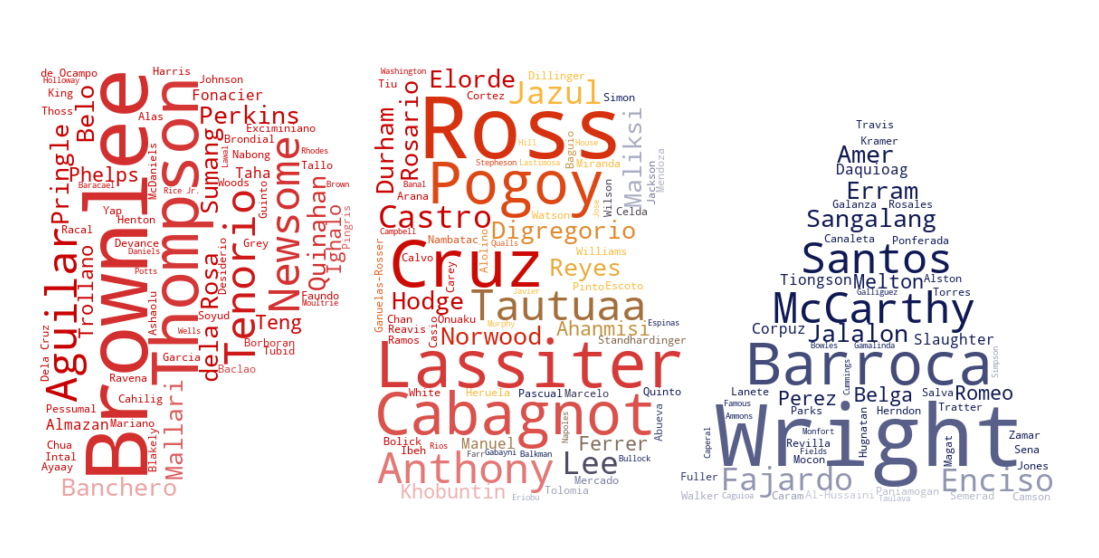

In [13]:
display_wc_player_freq()

# Hierarchical Clustering Team

In [827]:
def plot_variance(decomposition, title, ax, xlabel='SV'):
    """Plot latend"""
    var_exp = decomposition.explained_variance_ratio_
    ax.plot(range(1, len(var_exp)+1), var_exp, 'o-', label='individual')

    ax.set_xlim(0, len(var_exp)+1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('variance explained')
    ax = ax.twinx()
    ax.plot(range(1, len(var_exp)+1),
            var_exp.cumsum(), 'ro-', label='cumulative')
    ax.set_ylabel('cumulative variance explained')
    ax.set_xlim(1)
    ax.axhline(0.9, c='g', linestyle='dashed')
    ax.set_title(title)
    return ax


def plot_dendrogram(Z, ax):
    """Accepts output of linkage and plot dendogram"""
    res = dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_ylabel(r'$\Delta$')
    return ax


def plot_cluster(x, z, t, ax):
    """Accept linkage and plot clusters"""
    y_predict_ng = fcluster(z, t=t, criterion='distance')
    ax.scatter(x[:, 0], x[:, 1], c=y_predict_ng)
    ax.set_title(f'k={max(y_predict_ng)}, t={np.around(t, 3)}')
    return ax


def plot_svd(columns, weights, ax):
    """Plot SVD"""
    for col, vec in zip(columns, weights):
        ax.arrow(0, 0, 2*vec[0], 2*vec[1], width=0.01, ec='none', fc='r')
        ax.text(2*vec[0], 2*vec[1], col, ha='center', color='r', fontsize=18)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('SV1')
    ax.set_ylabel('SV2')
    return ax


def plot_svd_bar(columns, weights, ax):
    """Plot top SVD dominant features"""
    order = np.argsort(np.abs(weights))[-10:]
    ax.barh([columns[i] for i in order], weights[order])
    return ax


def purity(y_true, y_pred):
    """Compute the class purity

    Parameters
    ----------
    y_true : array
        List of ground-truth labels
    y_pred : array
        Cluster labels

    Returns
    -------
    purity : float
        Class purity
    """
    # YOUR CODE HERE
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    res = confmat.max(axis=0).sum() / np.sum(confmat)
    return res


def agglo_cluster_range(X, method, t_start, t_stop, actual):
    """
    Return a dictionary of the cluster labels, internal validation
    values and, if actual labels is given, external validation values,
    for every  𝑘.

    Parameters
    ----------
    X : matrix
        design matrix
    method : str
         linkage method
    t_start : int
        start of threshold
    t_stop : int
        stop of threshold
    actual : array
        actual labels

    Returns
    -------
    cluster_range : dictionary
        Cluster range
    """
    ys = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    last_k = 0
    for t in np.linspace(t_start, t_stop, 12):
        z = linkage(X, method=method, optimal_ordering=True)
        y = fcluster(z, t, criterion='distance')
        new_k = len(set(y))
        if last_k == new_k:
            continue

        last_k = new_k
        ps.append(purity(actual, y))
        amis.append(adjusted_mutual_info_score(actual, y))
        ars.append(adjusted_rand_score(actual, y))
    res = dict(
        ps=ps,
        amis=amis,
        ars=ars
    )
    return res


def plot_external(ps, amis, ars, ax):
    """Plot external validation values"""
    ks = np.arange(len(ps) + 1, 1, -1)
    ax.plot(ks, ps[::-1], '-o', label='PS')
    ax.plot(ks, amis[::-1], '-ro', label='AMI')
    ax.plot(ks, ars[::-1], '-go', label='AR')
    ax.set_xlabel('$k$')
    ax.set_ylabel('PS/AMI/AR')
    ax.legend()
    return ax

def plot_radar(df_radar, ax, color):
    """PLot radar plot"""
    df_radar.iloc[:, 1:] -= df_radar.iloc[:, 1:].min()
    df_radar.iloc[:, 1:] /= df_radar.iloc[:, 1:].max()
    df_radar.iloc[:, 1:] *= 100
    # number of variable
    categories = list(df_radar)[1:]
    N = len(categories)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # What will be the angle of each axis in the plot?
    # (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticks([20, 40, 60, 80])
    ax.set_yticklabels(["20", "40", "60", "80"])

    ax.tick_params(direction='out', length=6, width=2, colors='grey',
                   grid_color='grey', grid_alpha=0.5, size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 100)


    for i, df in df_radar.groupby('cluster'):
        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values = df.mean(0).drop('cluster').values.flatten().tolist()
        values += values[:1]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid',
                label=f'Group {i}')

        # Fill area
        ax.fill(angles, values, color[i-1], alpha=0.1, color=color[i-1])

    return ax

## Average Player Statistics By Conference

In [783]:
df_avg_player = fetcher.get_avg_player()
df_avg_player = df_avg_player.loc[df_avg_player.year.astype(int) < 2020]

### All average player statistics

In [784]:
feature_raw = df_avg_player.drop(['year', 'conference', 'player_name',
                                  'team_name', 'pos', 'j_number'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player.pos)
target = lbl_enc.transform(df_avg_player.pos)

#### Explore Dimensionality Reduction

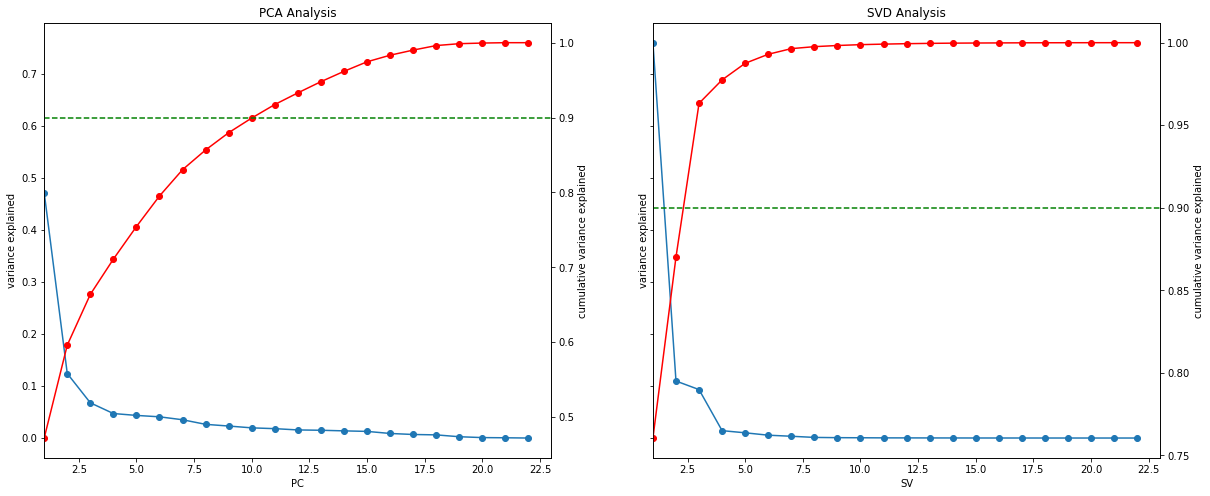

In [785]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 95% cumulative explained variance with just four components where using PCA needed nine components.

In [786]:
svd_avg = TruncatedSVD(2).fit(feature)
feature_new = svd_avg.transform(feature)

In [787]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

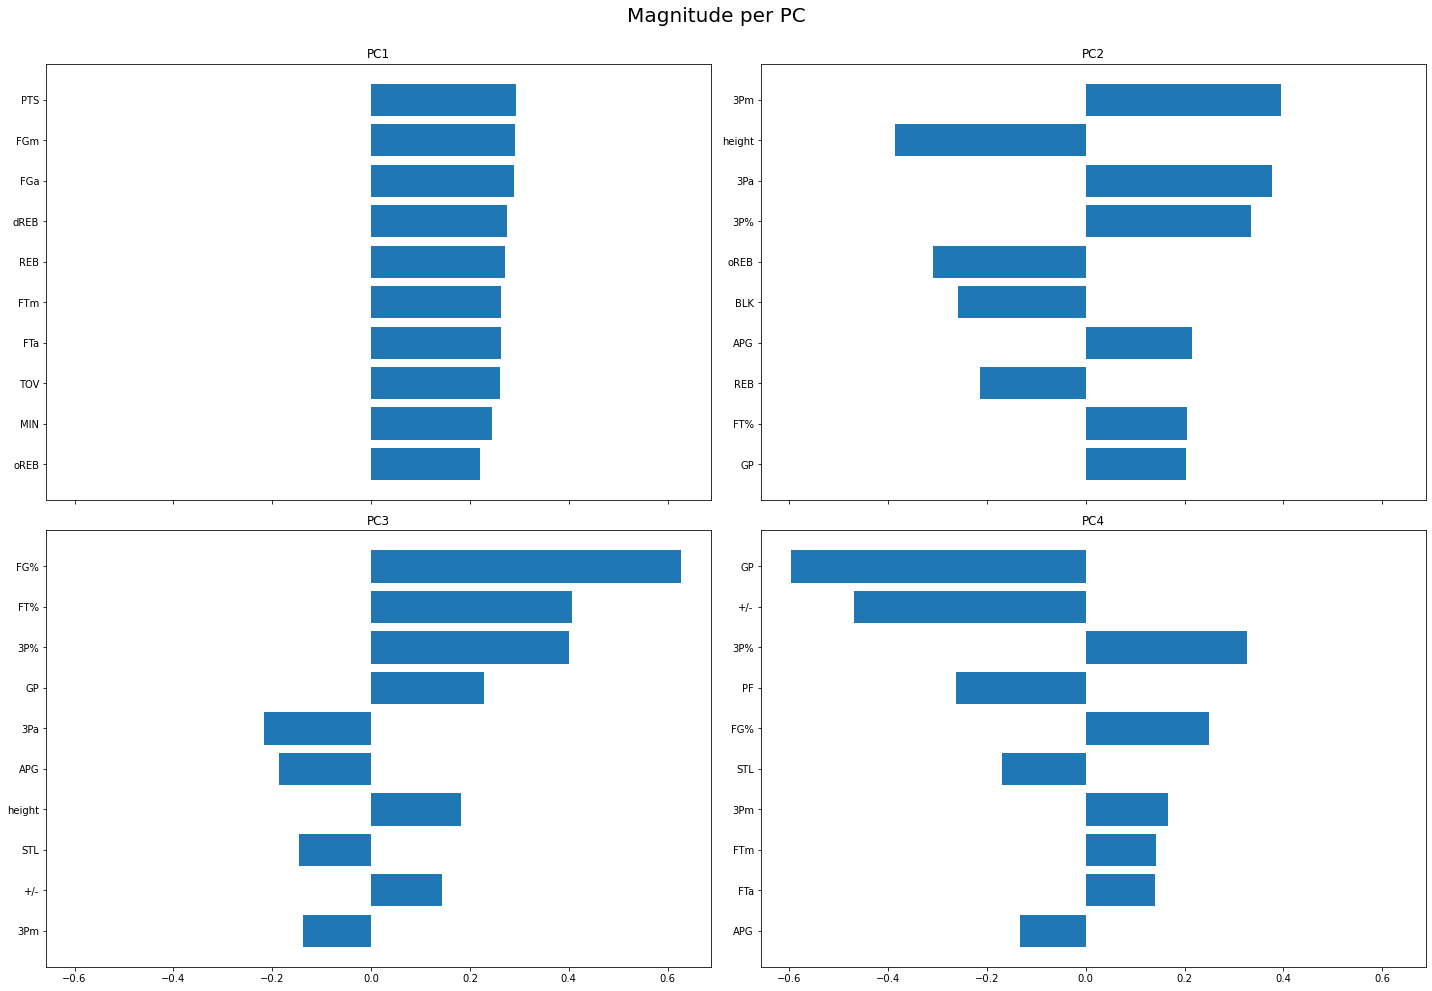

In [788]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

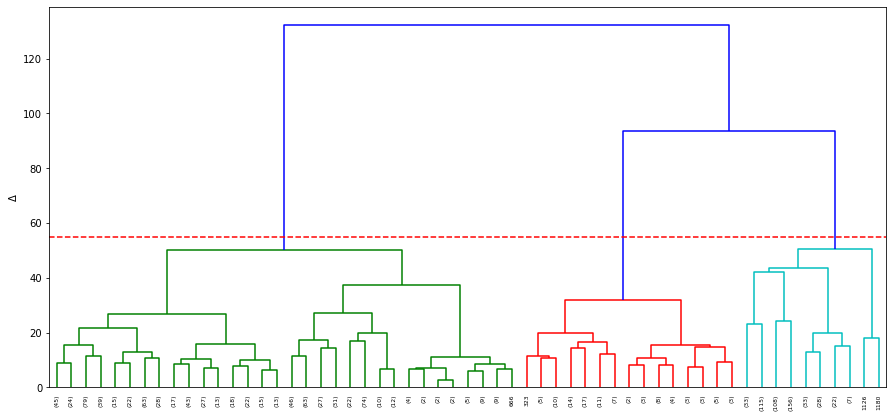

In [789]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(55, c='r', linestyle='dashed');

#### Single Linkage Method

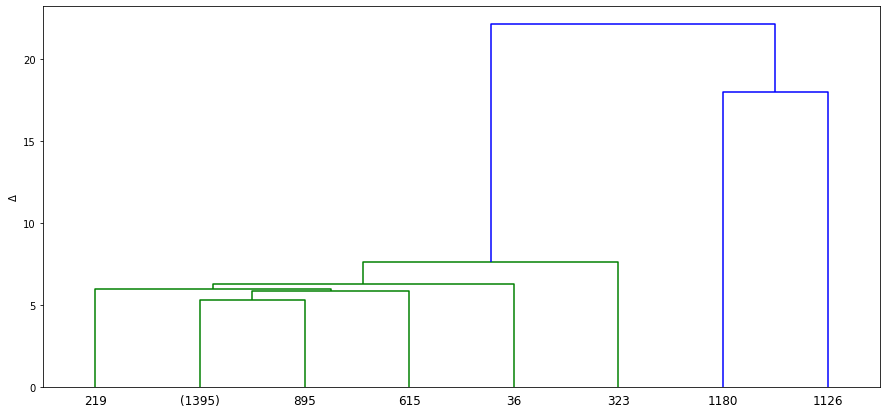

In [790]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

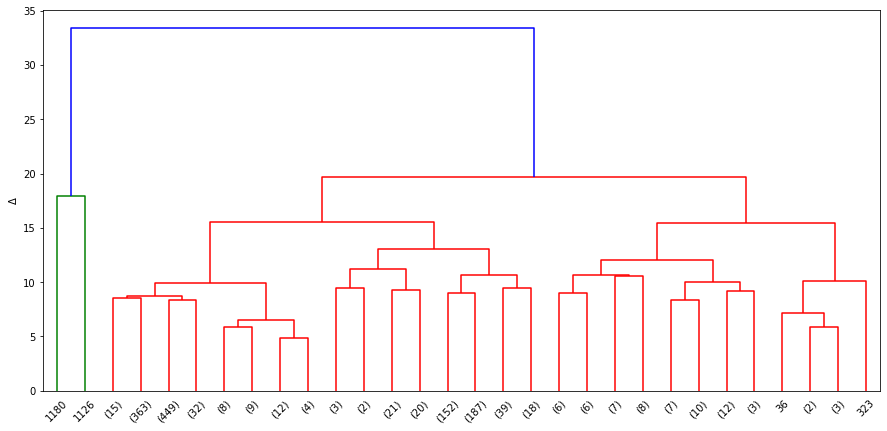

In [791]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(45, c='r', linestyle='dashed');

#### Average Linkage Method

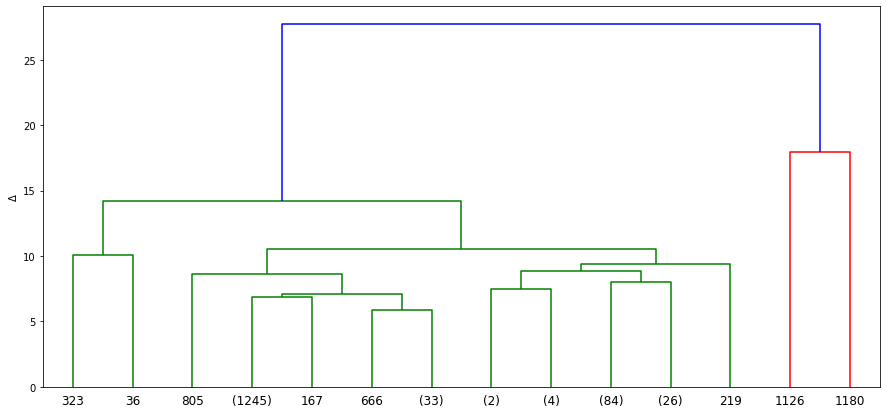

In [792]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

##### Choosing the right threshold

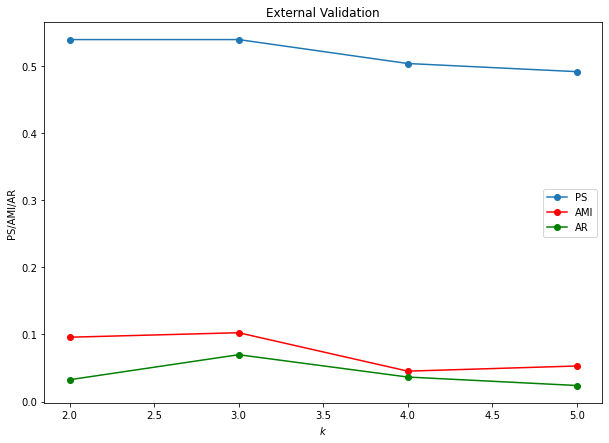

In [304]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=40, t_stop=55, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

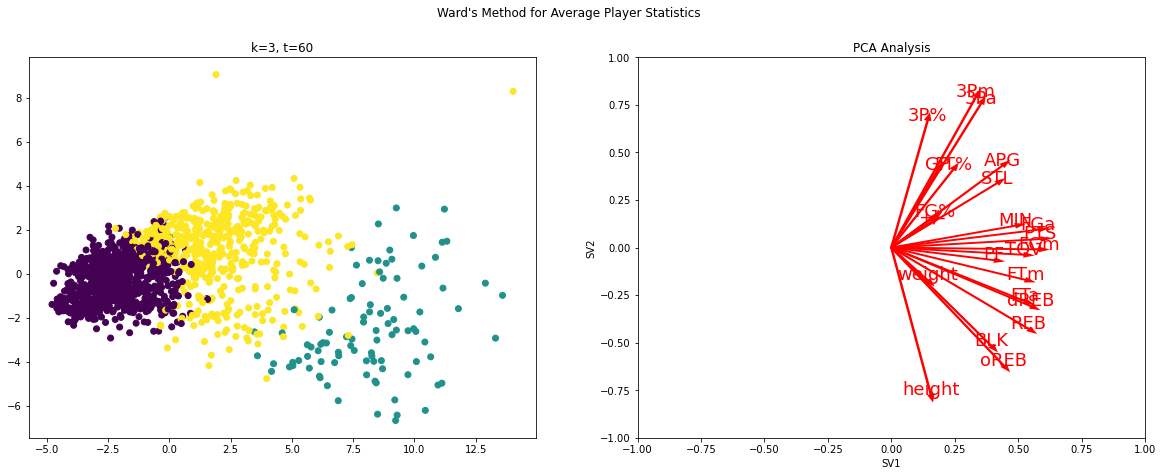

In [797]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 60, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [315]:
y_cluster = fcluster(Z_ward, t=60, criterion='distance')
df_avg_player_cluster = df_avg_player.copy()
df_avg_player_cluster['cluster'] = y_cluster

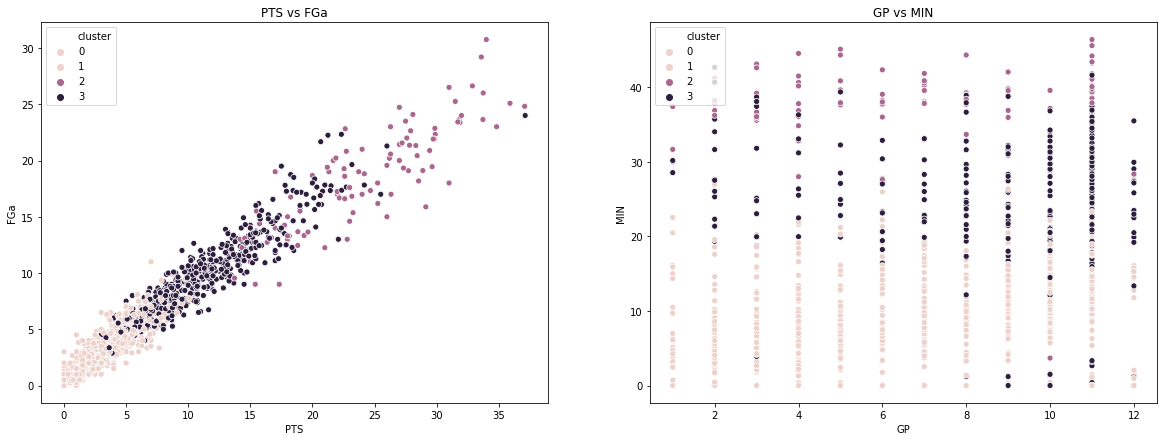

In [316]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster',
                data=df_avg_player_cluster, ax=ax1)

ax2.set_title('GP vs MIN')
sns.scatterplot(x='GP', y='MIN', hue='cluster',
                data=df_avg_player_cluster, ax=ax2)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

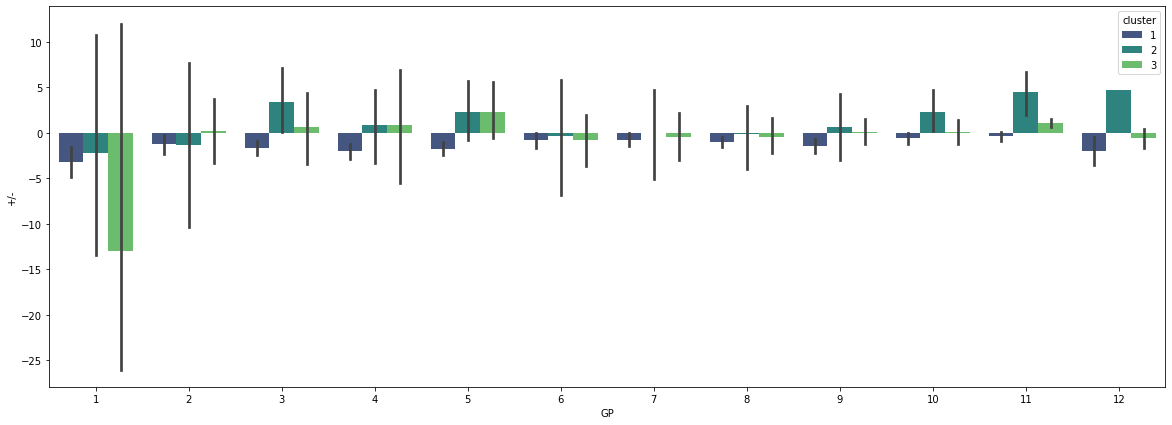

In [317]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_cluster)
plt.show()

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

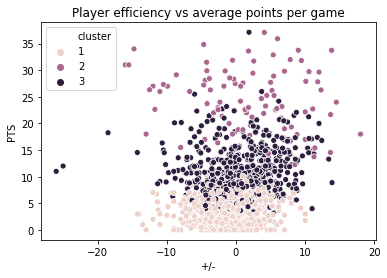

In [319]:
ax = sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                     data=df_avg_player_cluster)
ax.set_title('Player efficiency vs average points per game');

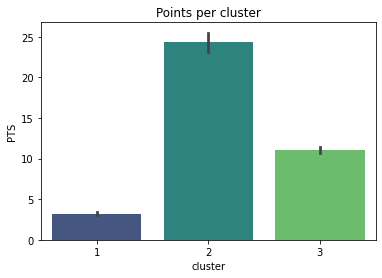

In [320]:
ax = sns.barplot(x='cluster', y='PTS', data=df_avg_player_cluster,
                 palette='viridis', estimator=np.mean)
ax.set_title('Points per cluster');

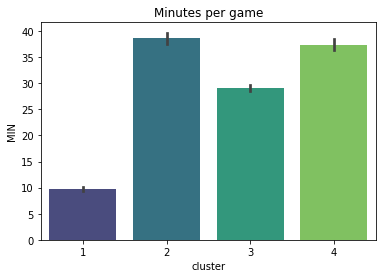

In [200]:
ax = sns.barplot(x='cluster', y='MIN', data=df_avg_player_cluster,
                 palette='viridis', estimator=np.mean)
ax.set_title('Minutes per game');

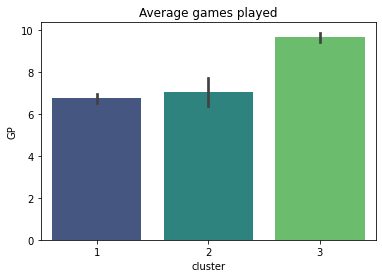

In [321]:
ax= sns.barplot(x='cluster', y='GP', data=df_avg_player_cluster,
            palette='viridis', estimator=np.mean)
ax.set_title('Average games played');

#### Radar plot

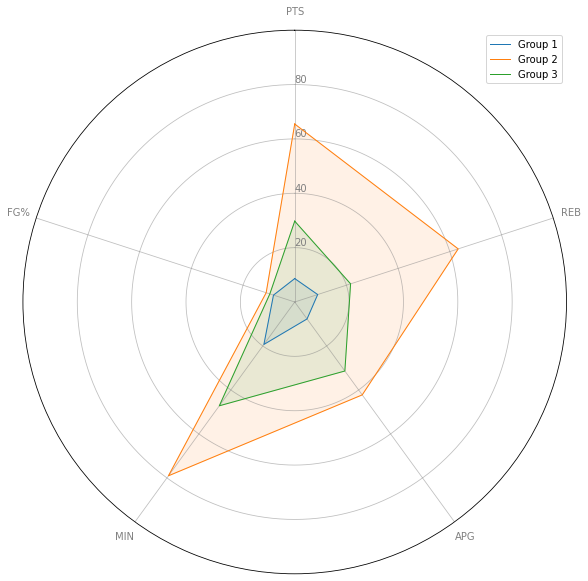

In [828]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_cluster[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

### Average Player Statistics Governor's Cup

In [533]:
m1 = df_avg_player.conference == 'GOV'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_gov = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_gov.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_gov.pos)
target = lbl_enc.transform(df_avg_player_gov.pos)

#### Explore Dimensionality Reduction

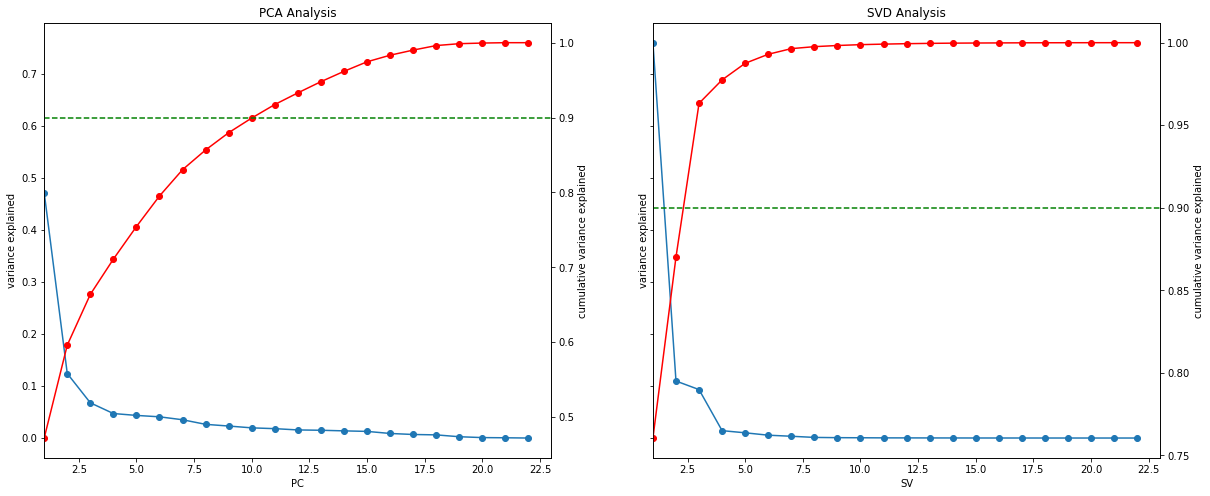

In [515]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 93% cumulative explained variance with just three components where using PCA needed seven components.

In [549]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

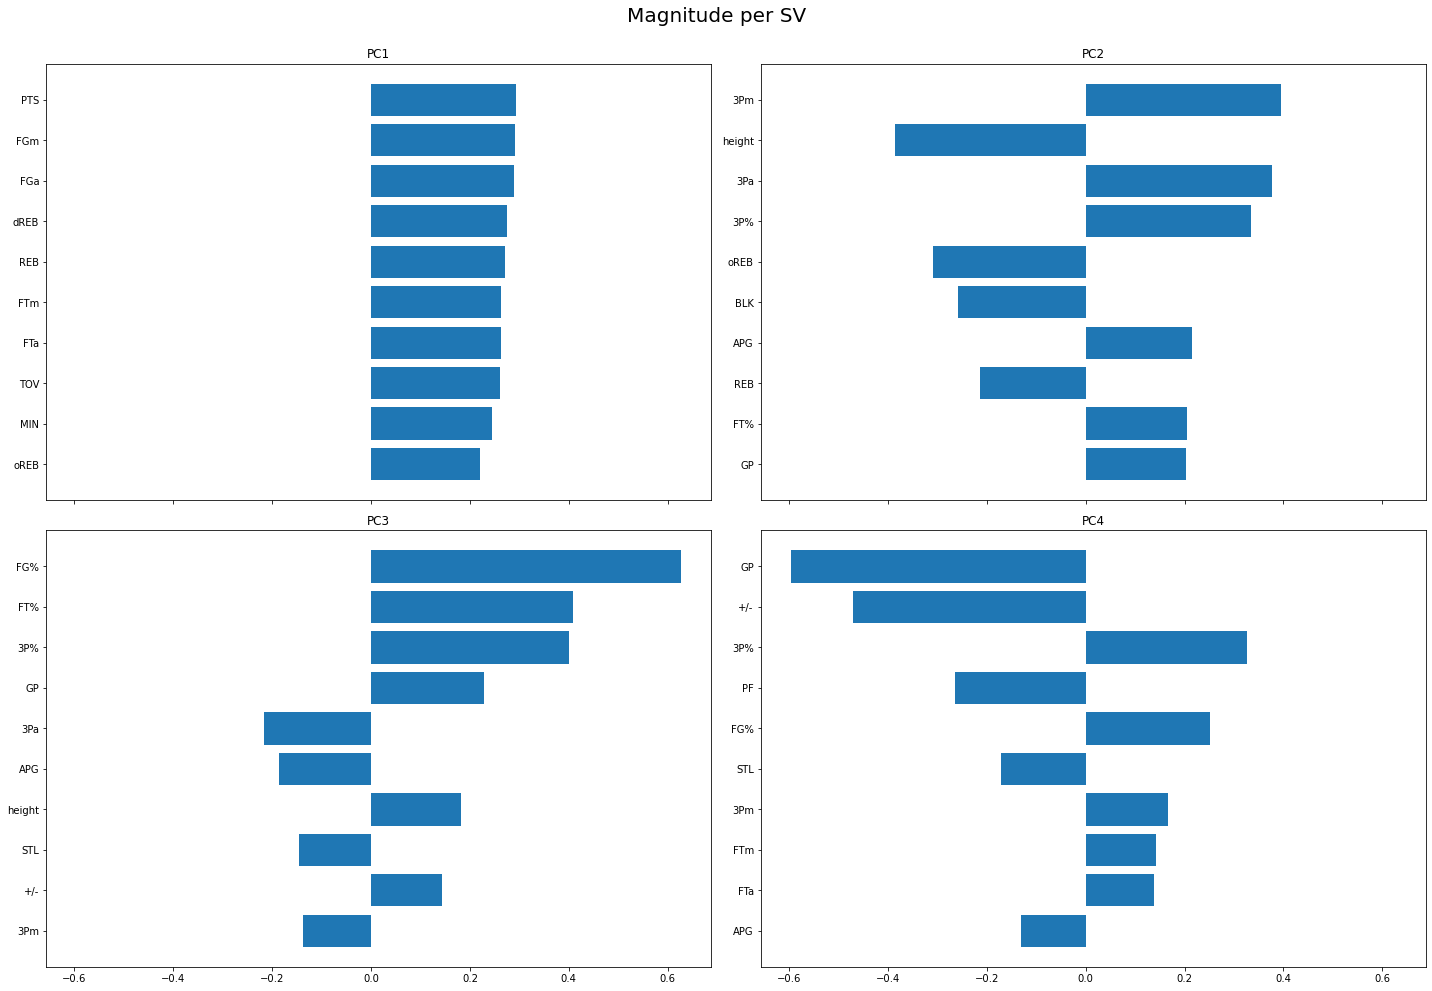

In [517]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per SV', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

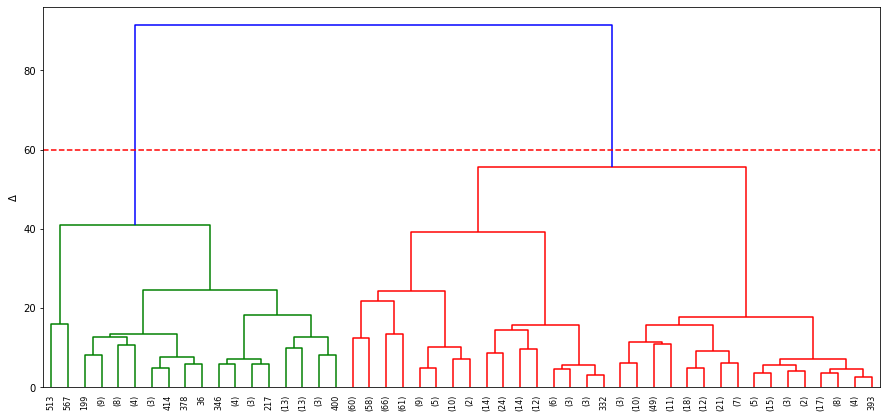

In [536]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(60, c='r', linestyle='dashed');

#### Single Linkage Method

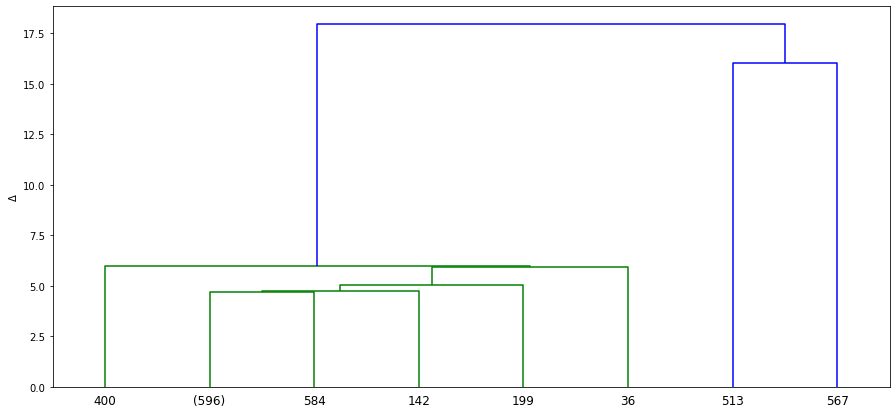

In [537]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

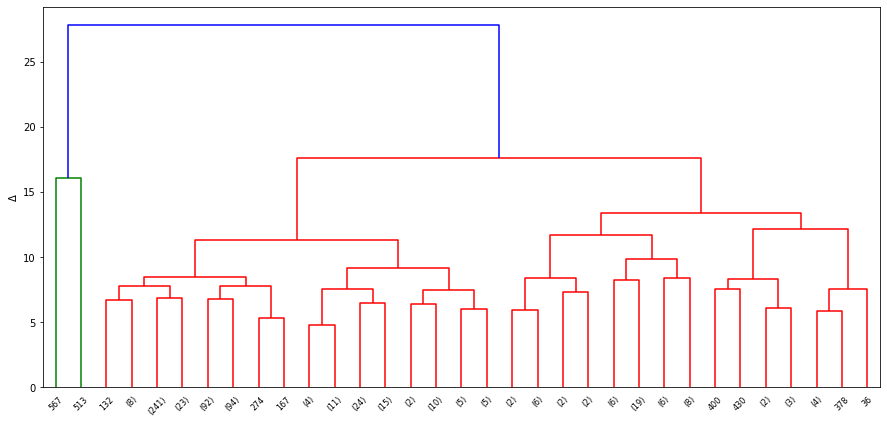

In [538]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(50, c='r', linestyle='dashed');

#### Average Linkage Method

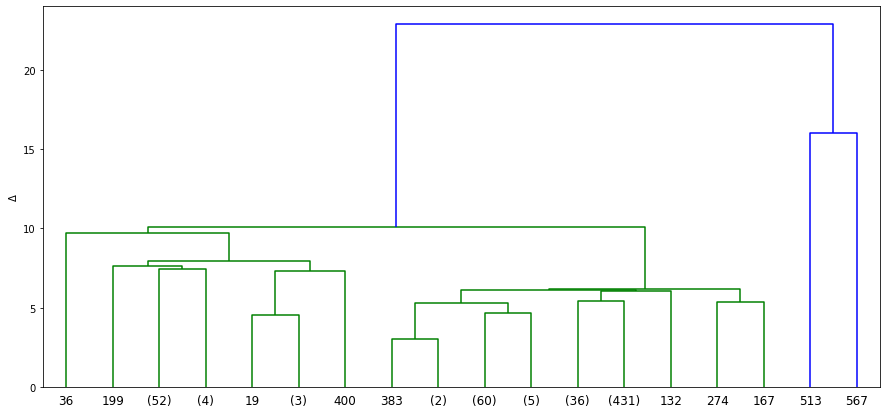

In [539]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax);

#### Result

##### Choosing the right threshold

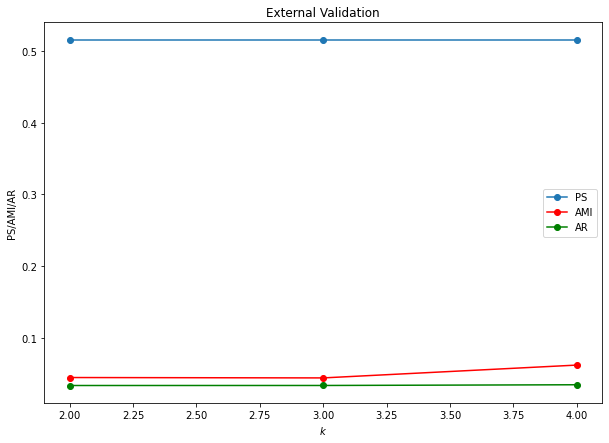

In [540]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=40, t_stop=60, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

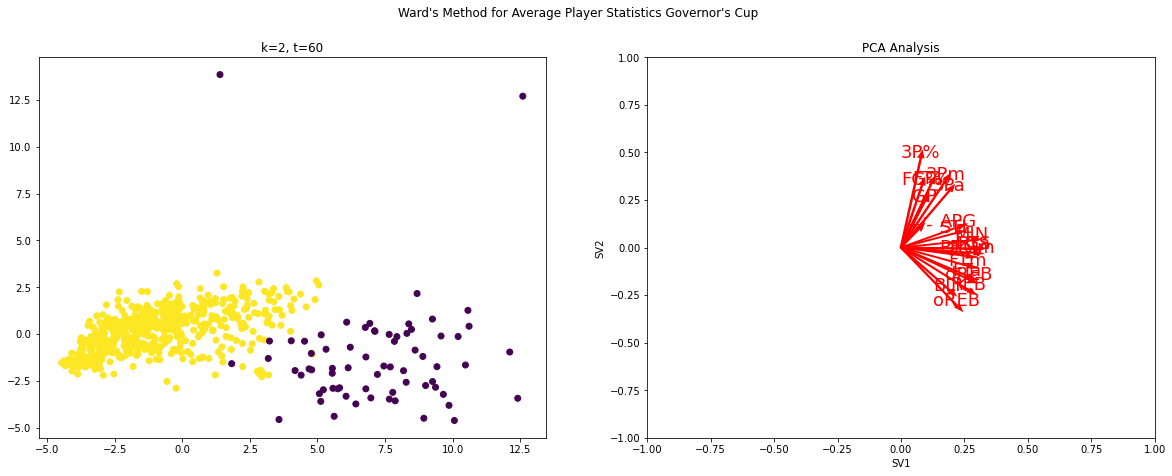

In [551]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 60, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics Governor's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [542]:
y_cluster = fcluster(Z_ward, t=60, criterion='distance')
df_avg_player_gov['cluster'] = y_cluster

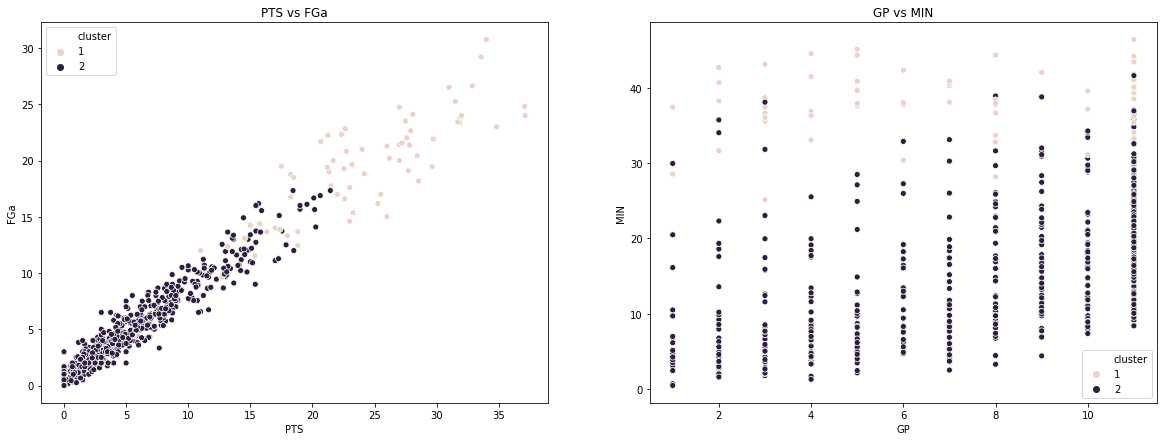

In [543]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_gov, ax=ax1)
ax1.set_title('PTS vs FGa')

ax2.set_title('GP vs MIN')
sns.scatterplot(x='GP', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_gov, ax=ax2)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

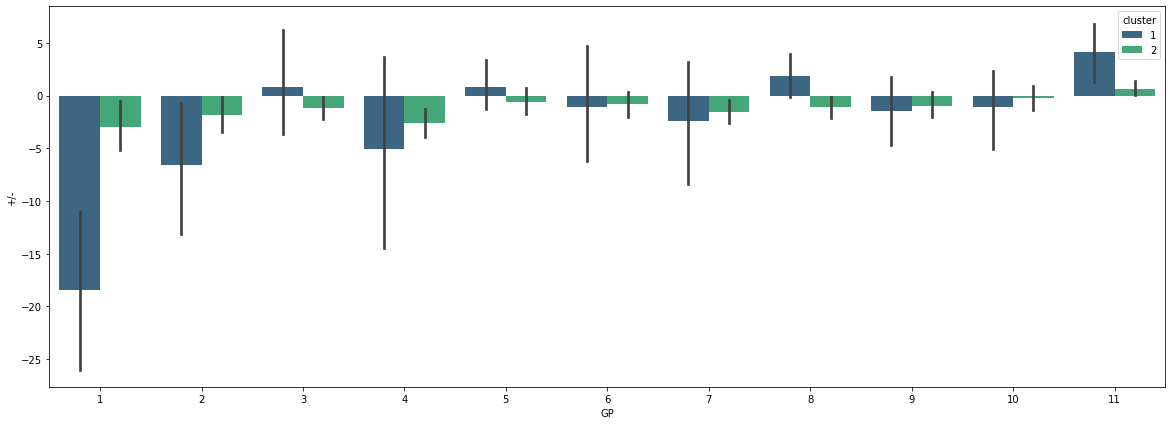

In [544]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_gov)
plt.show()

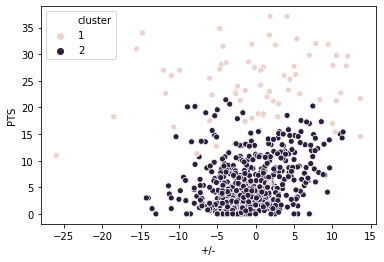

In [545]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_gov)

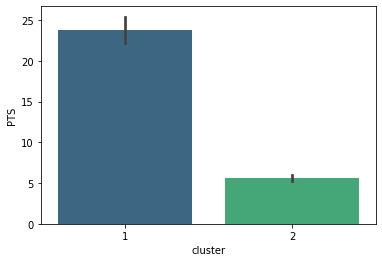

In [552]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_gov,
            palette='viridis', estimator=np.mean)

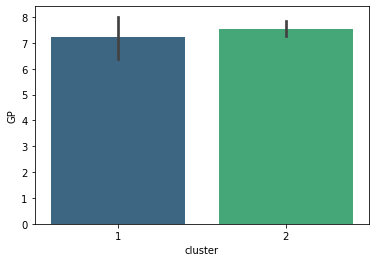

In [553]:
# sns.barplot(x='cluster', y='MIN', data=df_avg_player_gov,
#             estimator=np.mean)
sns.barplot(x='cluster', y='GP', data=df_avg_player_gov,
            palette='viridis', estimator=np.mean)

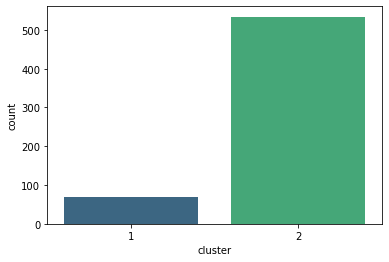

In [554]:
sns.countplot(x='cluster', data=df_avg_player_gov,
             palette='viridis')

#### Radar plot

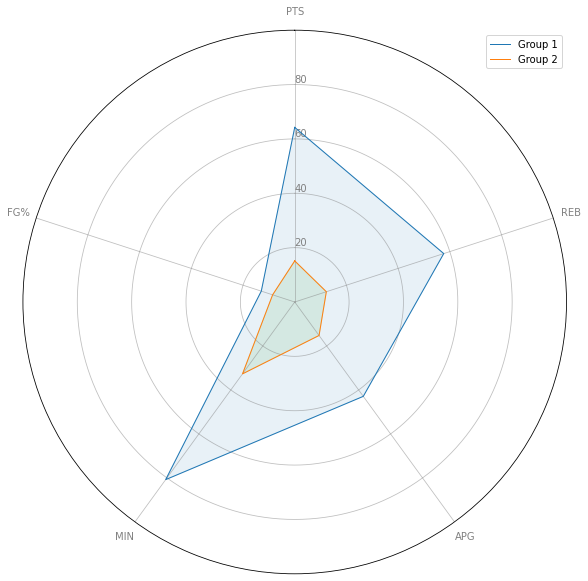

In [829]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_gov[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average Player Statistics Commisioner's Cup

In [685]:
m1 = df_avg_player.conference == 'COM'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_com = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_com.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_com.pos)
target = lbl_enc.transform(df_avg_player_com.pos)

#### Explore Dimensionality Reduction

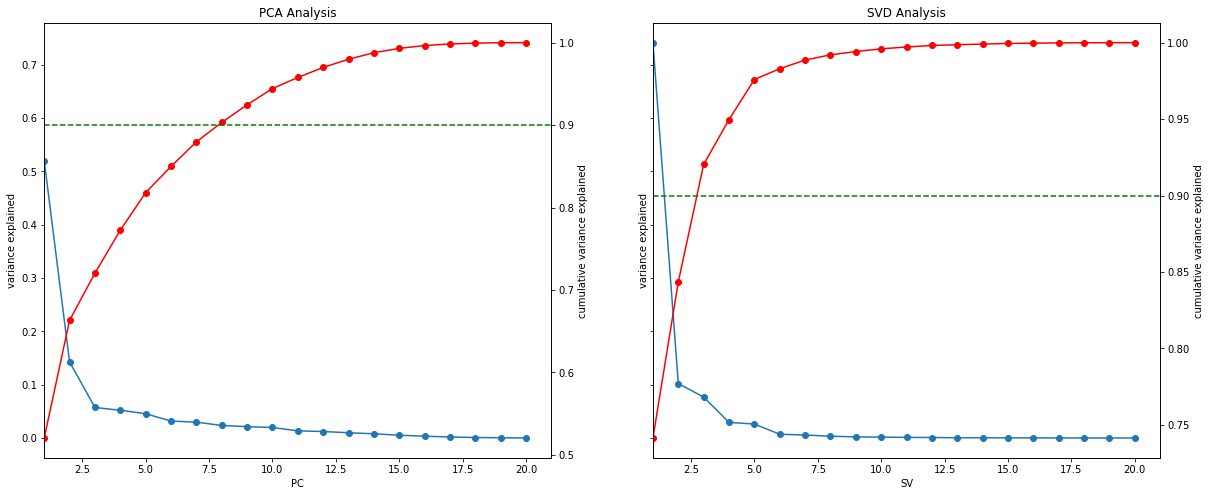

In [686]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 93% cumulative explained variance with just three components where using PCA needed eight components.

In [687]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

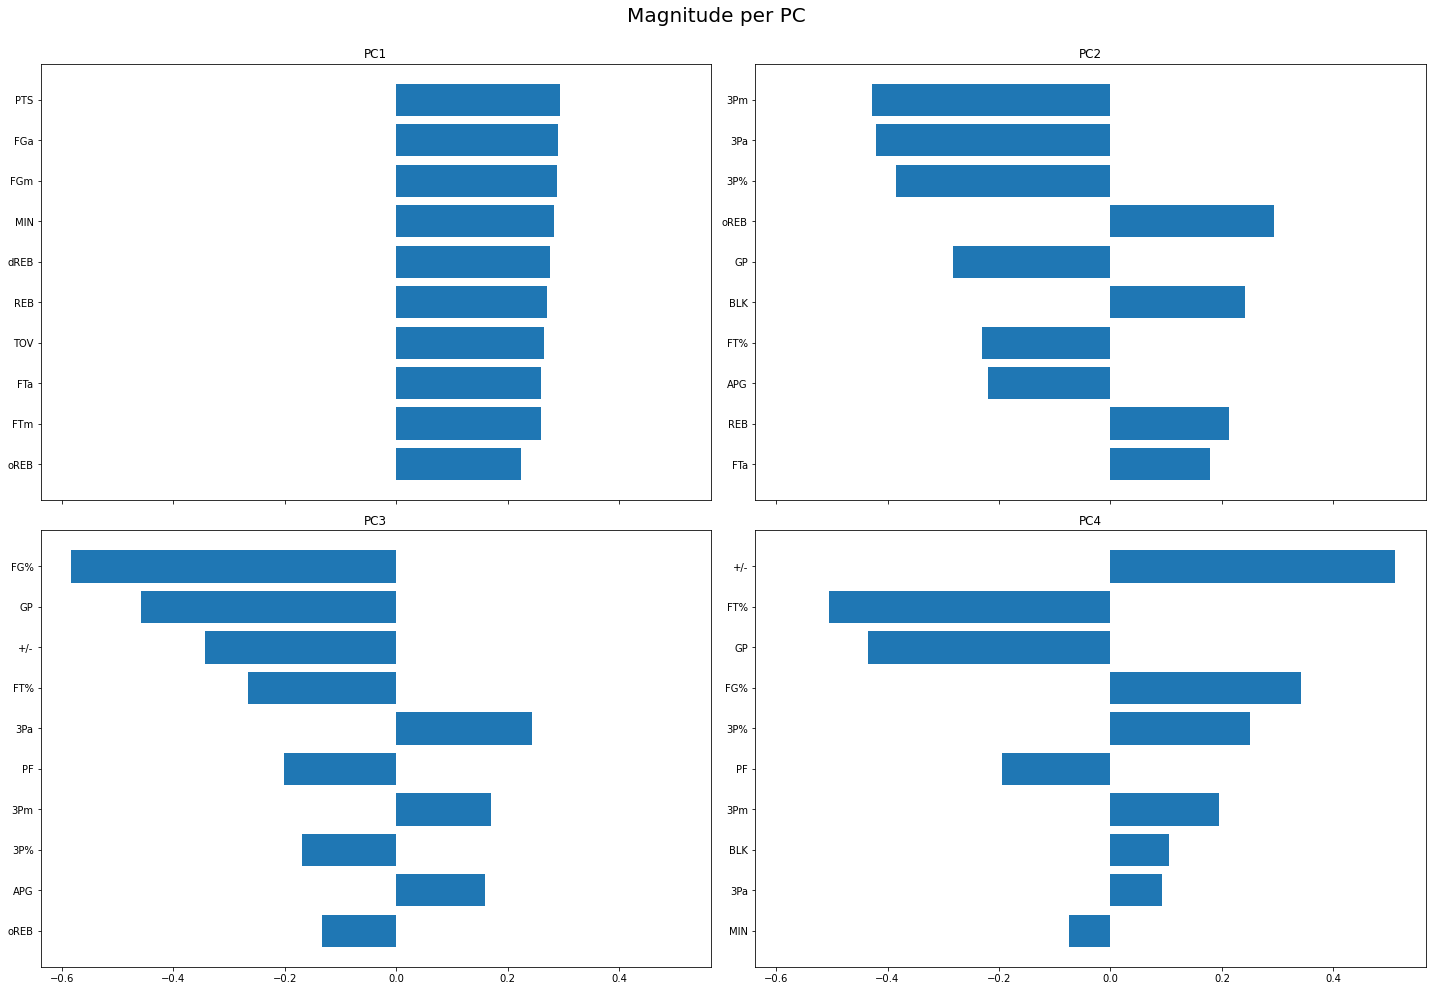

In [688]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

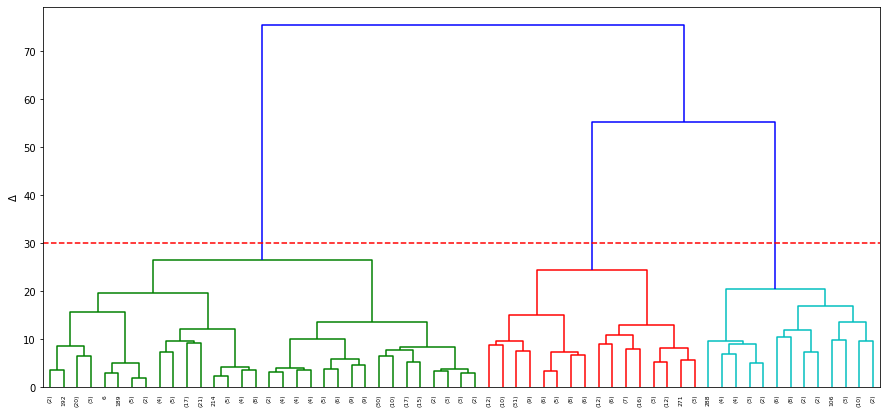

In [689]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(30, c='r', linestyle='dashed');

#### Single Linkage Method

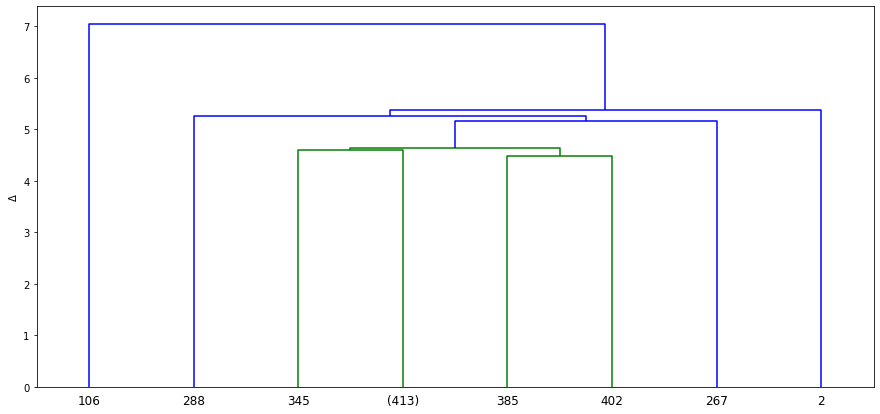

In [690]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

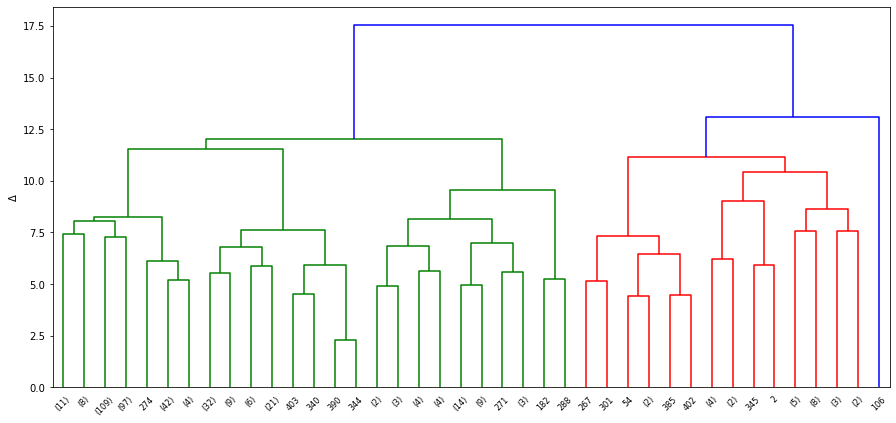

In [691]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(47, c='r', linestyle='dashed');

#### Average Linkage Method

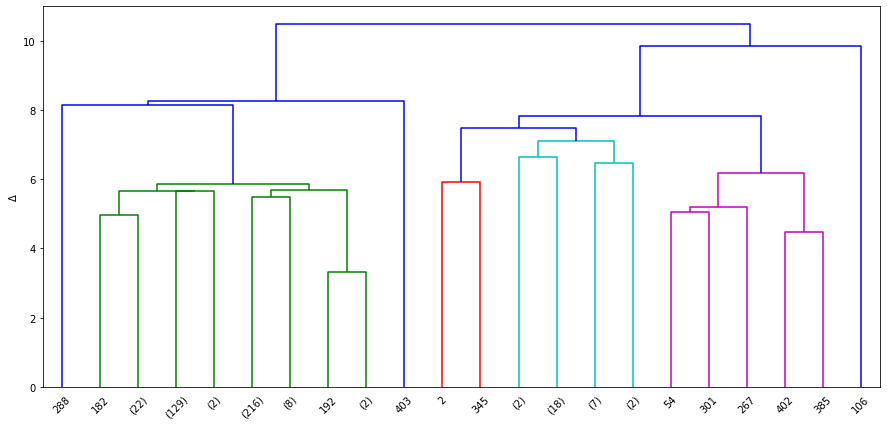

In [692]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

##### Choosing the right threshold

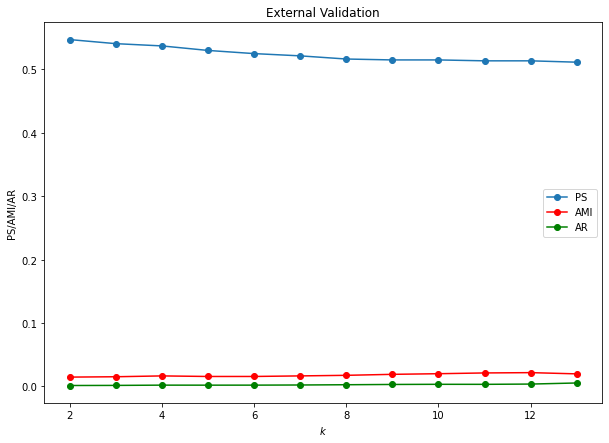

In [674]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=15, t_stop=30, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

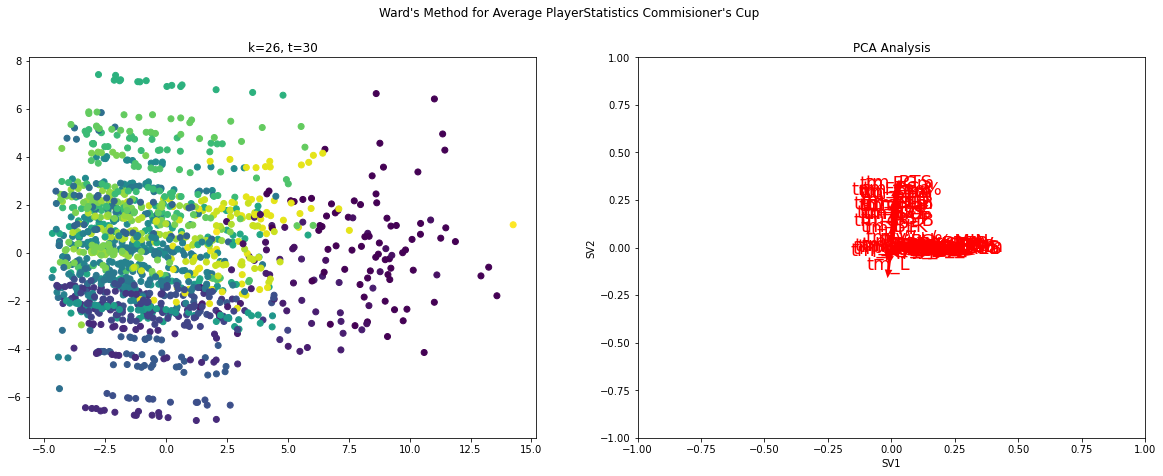

In [675]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 30, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player"
             "Statistics Commisioner's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [693]:
y_cluster = fcluster(Z_ward, t=30, criterion='distance')
df_avg_player_com['cluster'] = y_cluster

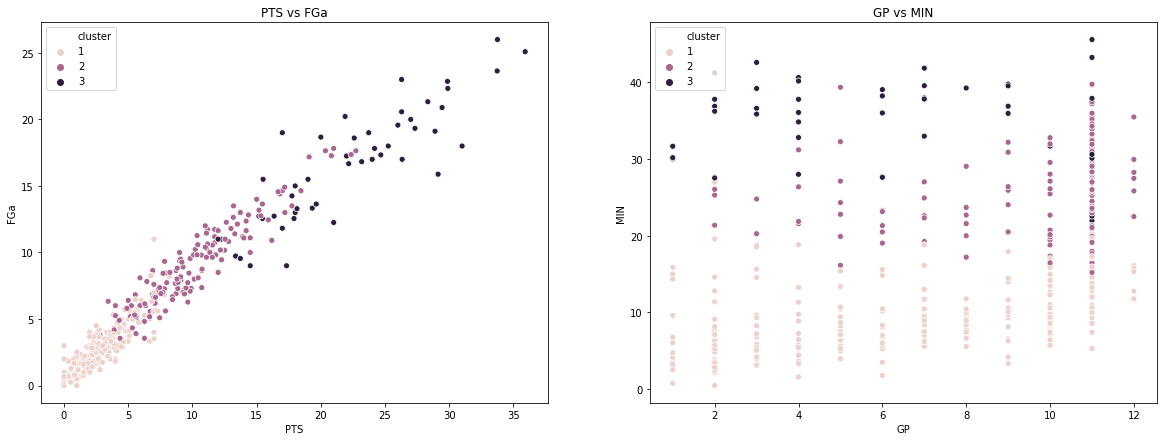

In [694]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_com, ax=ax1)

ax2.set_title('GP vs MIN')
sns.scatterplot(x='GP', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_com, ax=ax2);

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

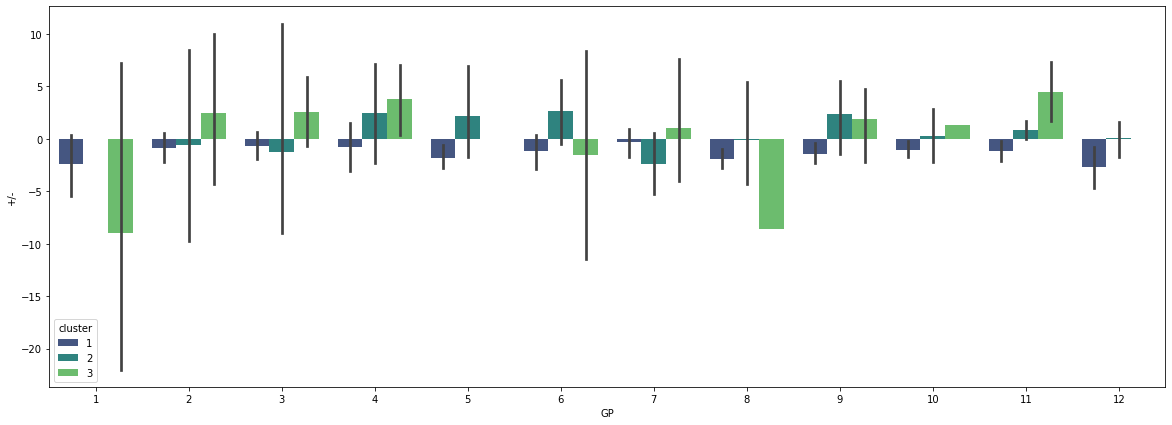

In [695]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_com)
plt.show()

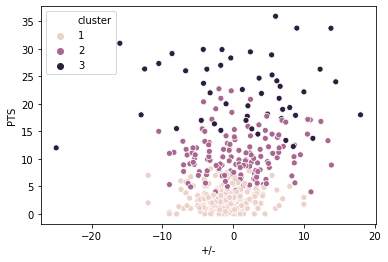

In [696]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_com)

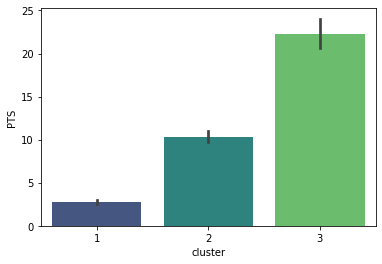

In [697]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

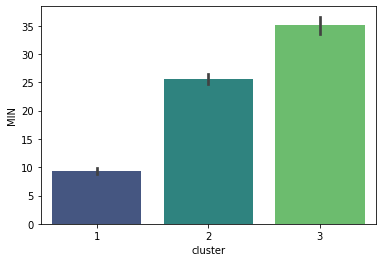

In [698]:
sns.barplot(x='cluster', y='MIN', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

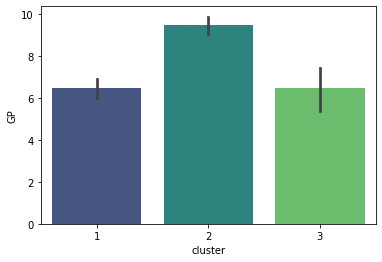

In [699]:
sns.barplot(x='cluster', y='GP', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

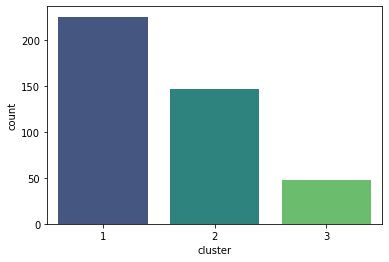

In [700]:
sns.countplot(x='cluster', data=df_avg_player_com,
             palette='viridis')

#### Radar plot

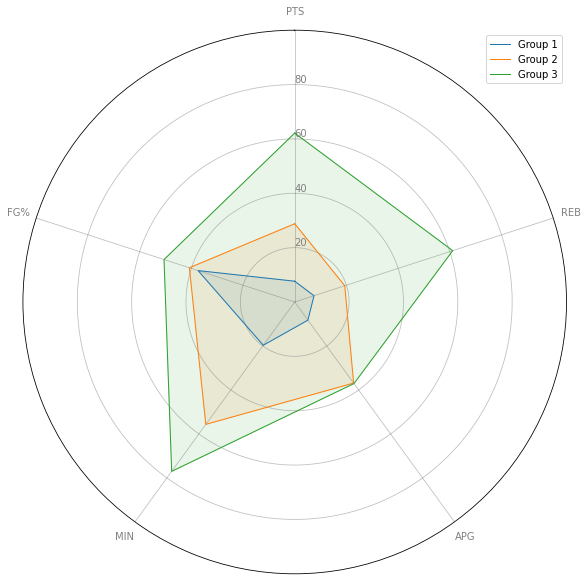

In [830]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_com[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

### Average Player Statistics Philippine Cup

In [613]:
m1 = df_avg_player.conference == 'PH'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_ph = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_ph.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_ph.pos)
target = lbl_enc.transform(df_avg_player_ph.pos)

#### Explore Dimensionality Reduction

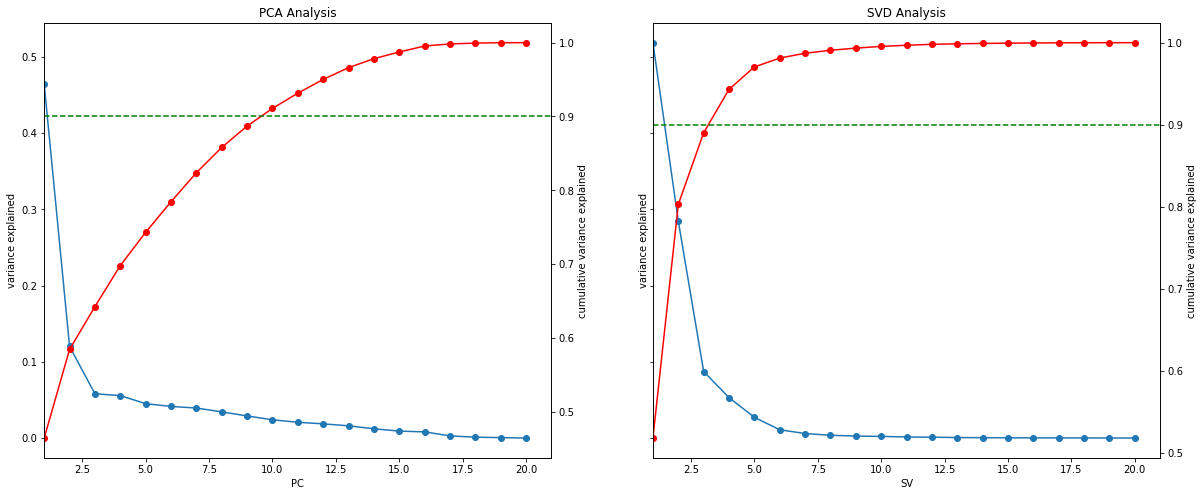

In [614]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 93% cumulative explained variance with just three components where using PCA needed eight components.

In [615]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

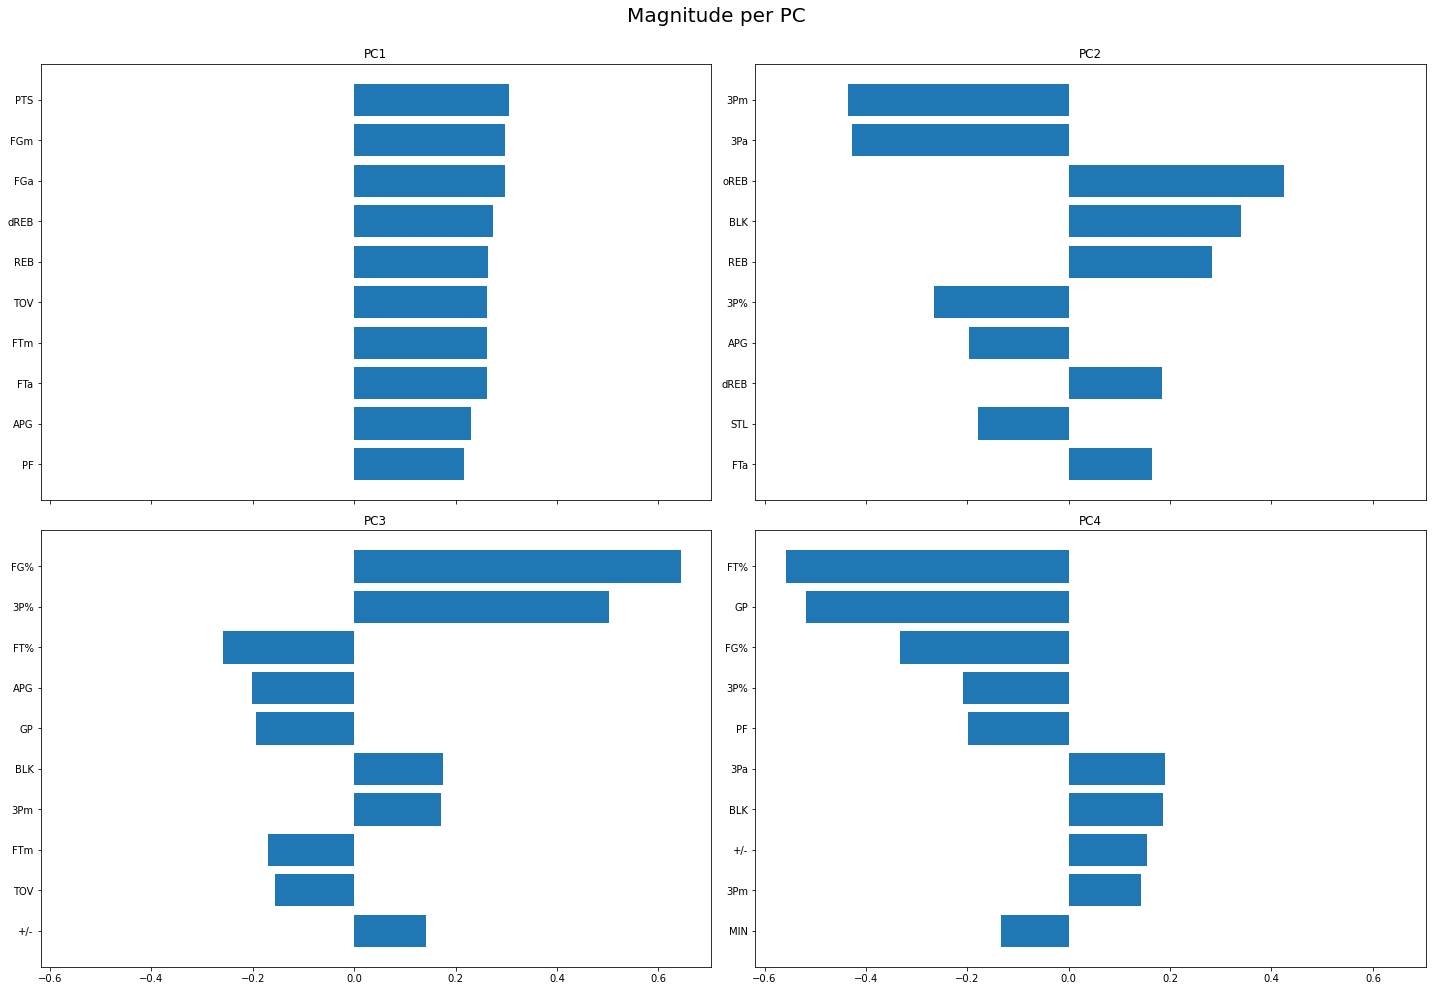

In [616]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

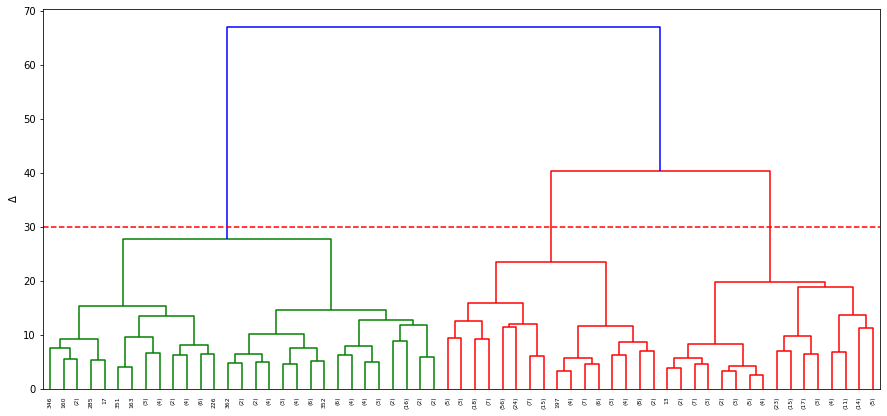

In [617]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(30, c='r', linestyle='dashed');

#### Single Linkage Method

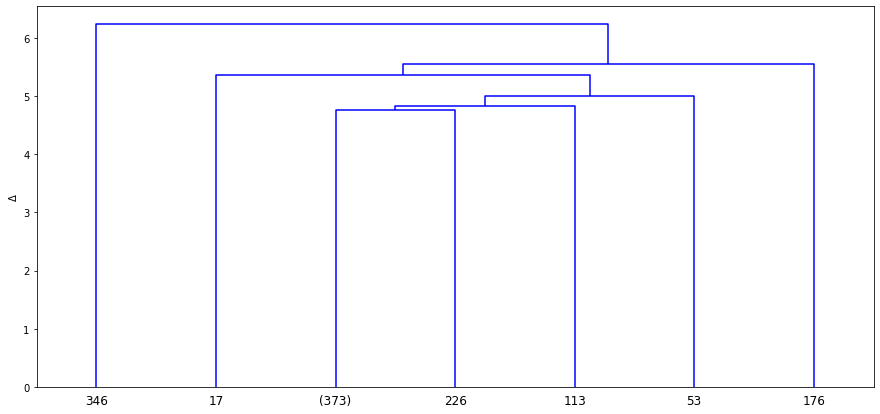

In [618]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

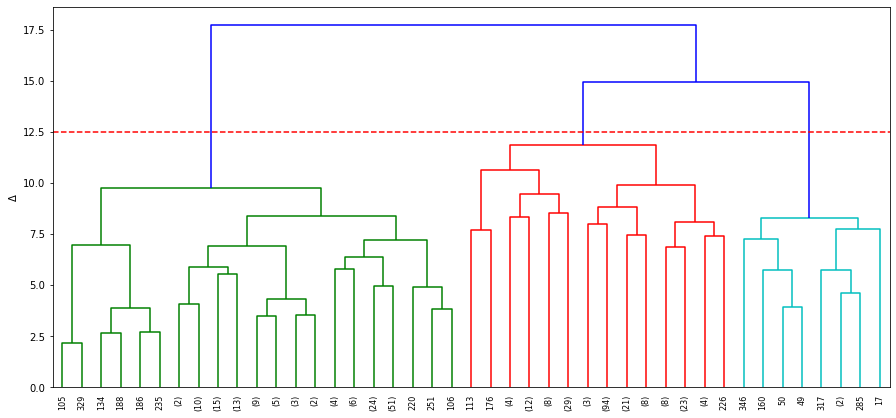

In [619]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(12.5, c='r', linestyle='dashed');

#### Average Linkage Method

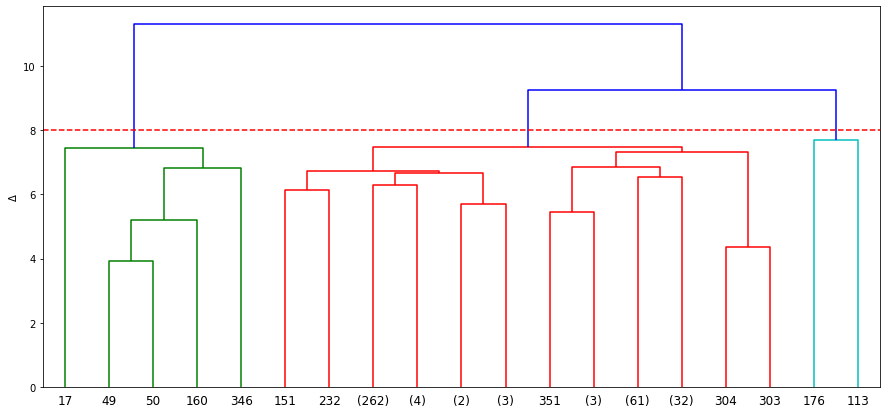

In [620]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(8, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

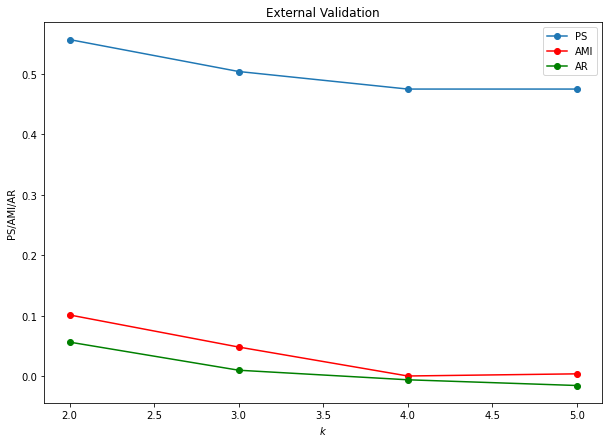

In [621]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=20, t_stop=55, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

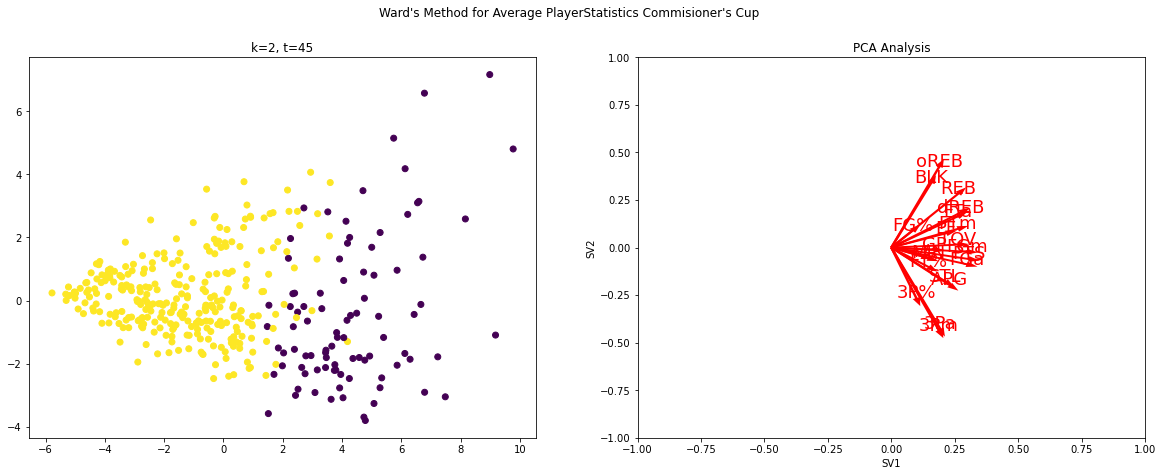

In [622]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 45, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player"
             "Statistics Commisioner's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [623]:
y_cluster = fcluster(Z_ward, t=45, criterion='distance')
df_avg_player_ph['cluster'] = y_cluster

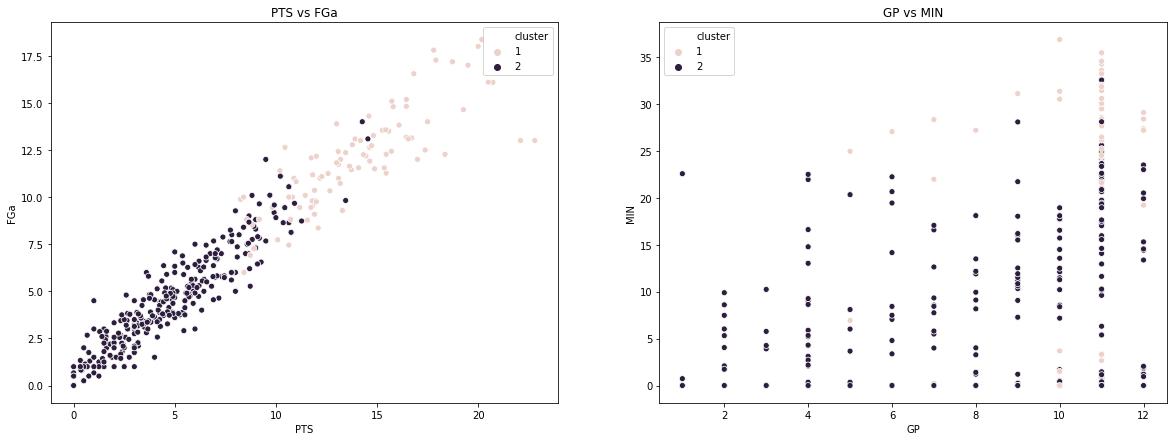

In [624]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_ph, ax=ax1)

ax2.set_title('GP vs MIN')
sns.scatterplot(x='GP', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_ph, ax=ax2);

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

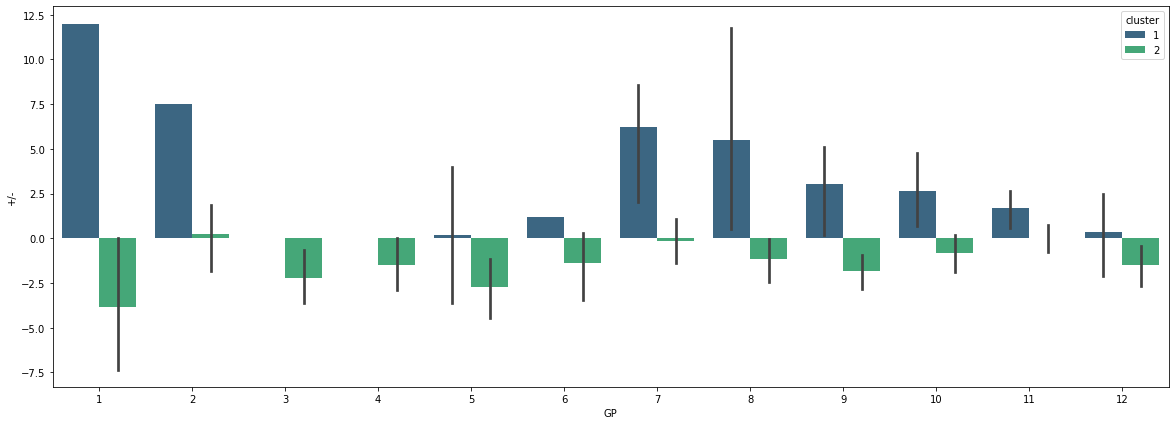

In [625]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_ph)
plt.show()

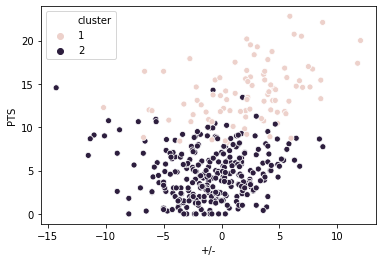

In [626]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_ph)

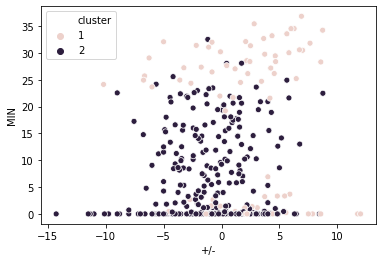

In [627]:
sns.scatterplot(x='+/-', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_ph)

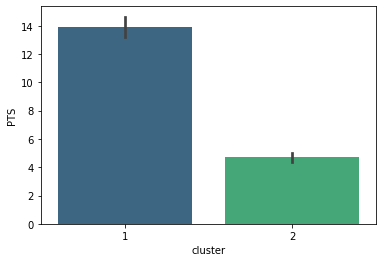

In [628]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

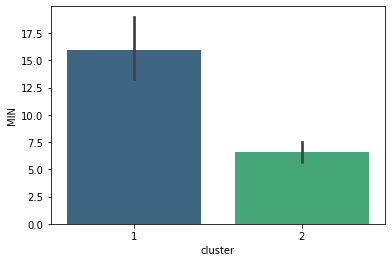

In [632]:
sns.barplot(x='cluster', y='MIN', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

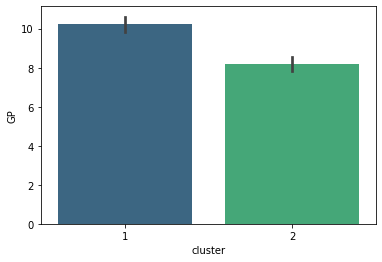

In [629]:
sns.barplot(x='cluster', y='GP', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

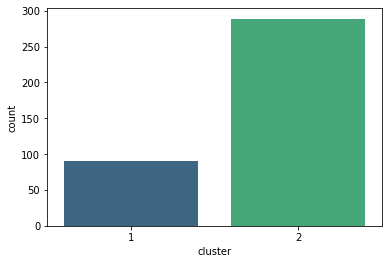

In [630]:
sns.countplot(x='cluster', data=df_avg_player_ph,
             palette='viridis')

#### Radar plot

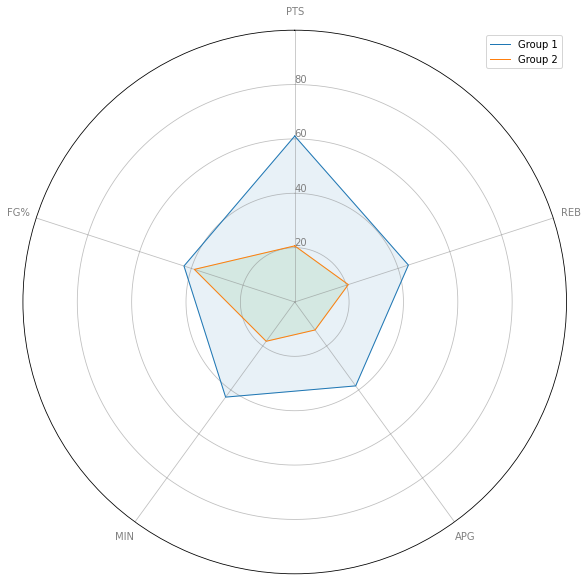

In [831]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_ph[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

## Average Player + Team Statistics By Conference

In [965]:
df_avg_player_team = fetcher.get_avg_player_team()
df_avg_player_team = (df_avg_player_team
                      .loc[df_avg_player_team.year.astype(int) < 2020])

### All average player statistics

In [966]:
feature_raw = df_avg_player_team.drop(['year', 'conference', 'player_name',
                                       'team_name', 'pos',
                                       'j_number'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team.pos)
target = lbl_enc.transform(df_avg_player_team.pos)

#### Explore Dimensionality Reduction

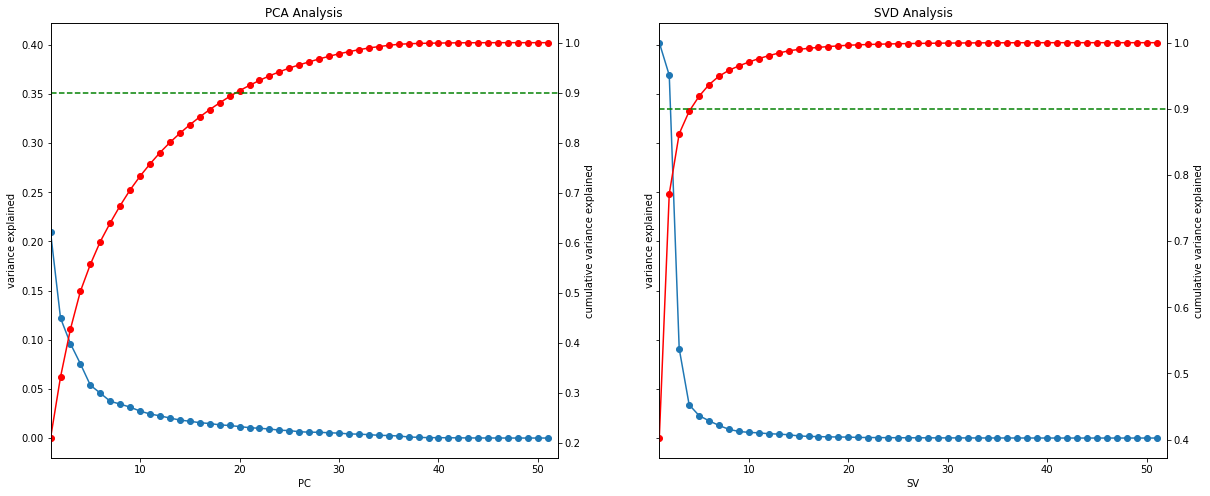

In [967]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just nine components where using PCA needed 18 components.

In [968]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

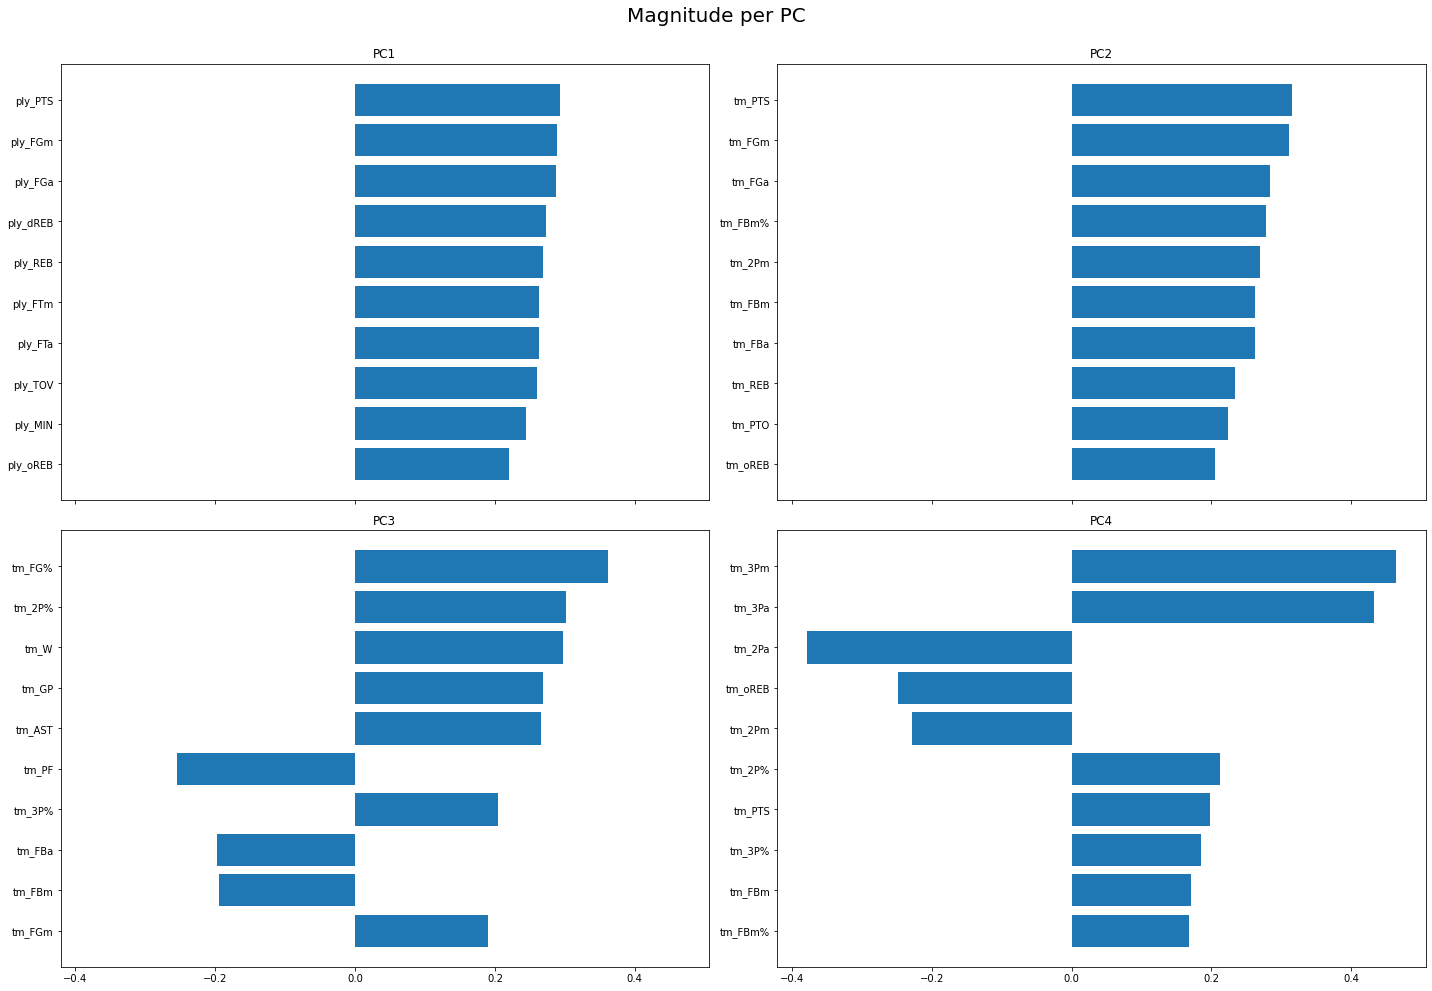

In [969]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

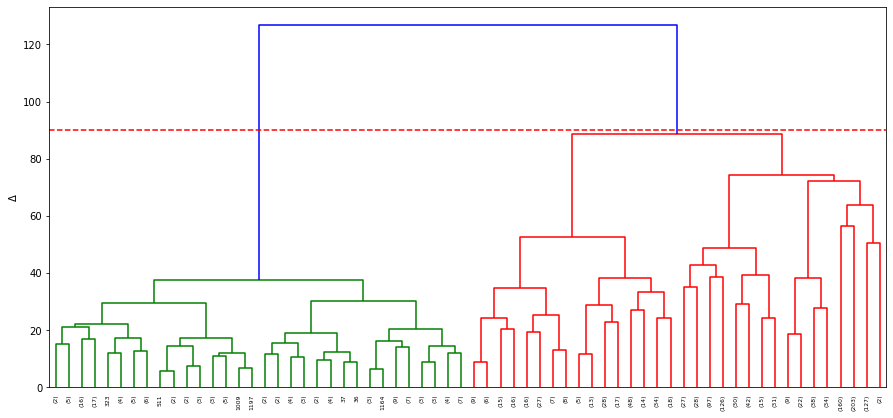

In [970]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(90, c='r', linestyle='dashed');

#### Single Linkage Method

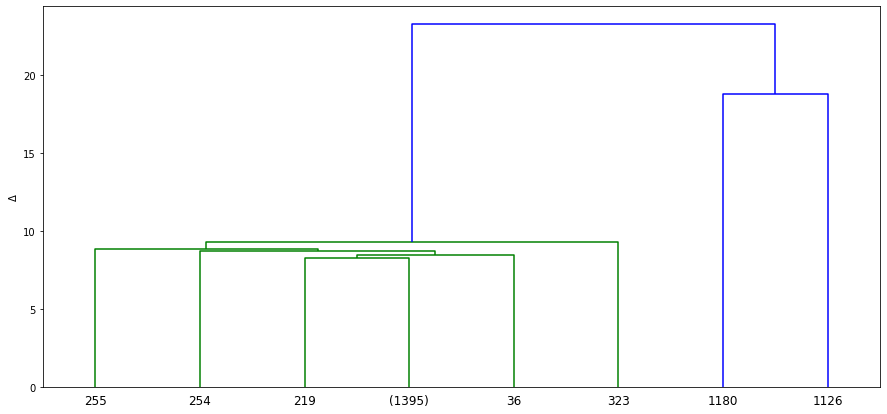

In [971]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

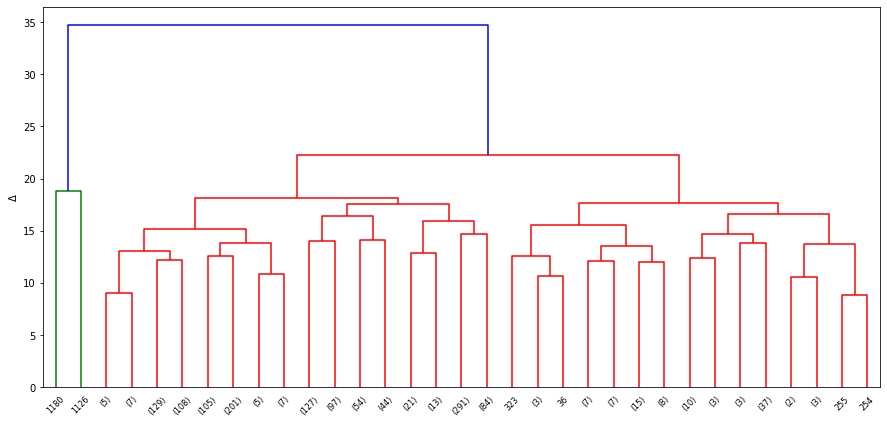

In [972]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(70, c='r', linestyle='dashed');

#### Average Linkage Method

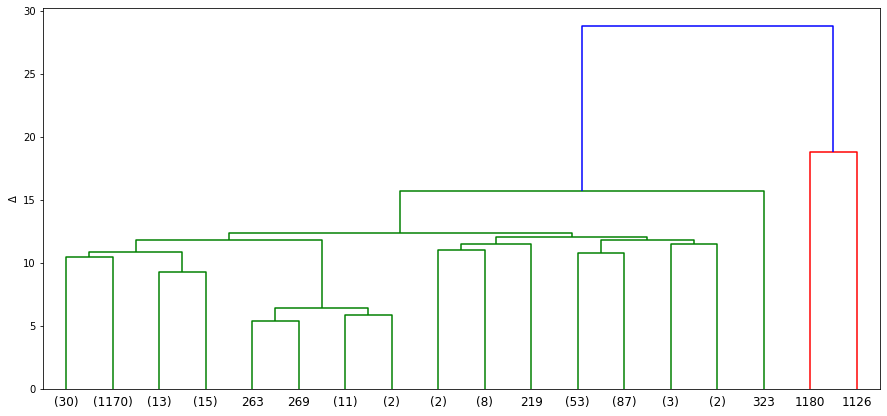

In [973]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(40, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

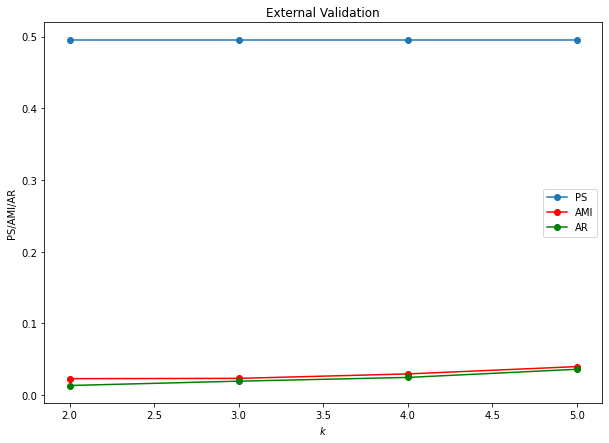

In [646]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=70, t_stop=90, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

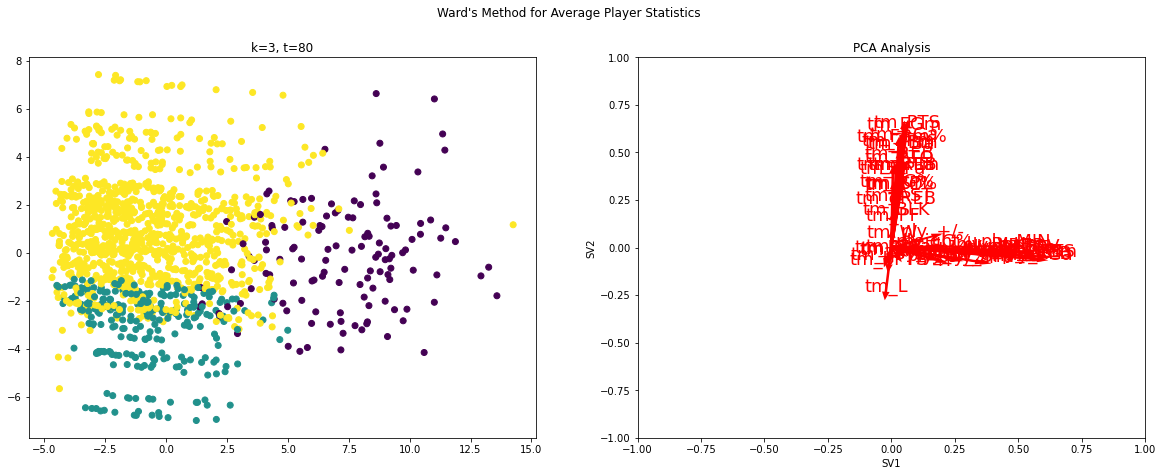

In [974]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 80, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [975]:
y_cluster = fcluster(Z_ward, t=80, criterion='distance')
df_avg_player_team_cluster = df_avg_player_team.copy()
df_avg_player_team_cluster['cluster'] = y_cluster

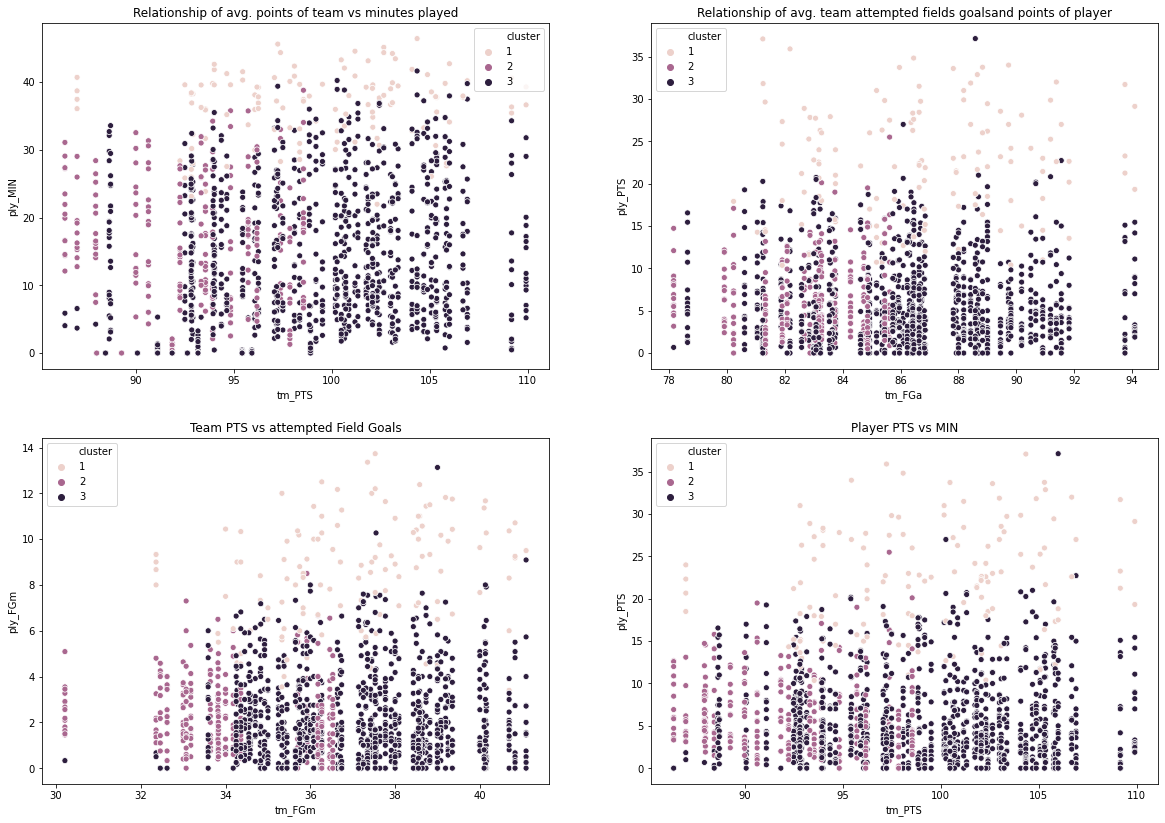

In [976]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

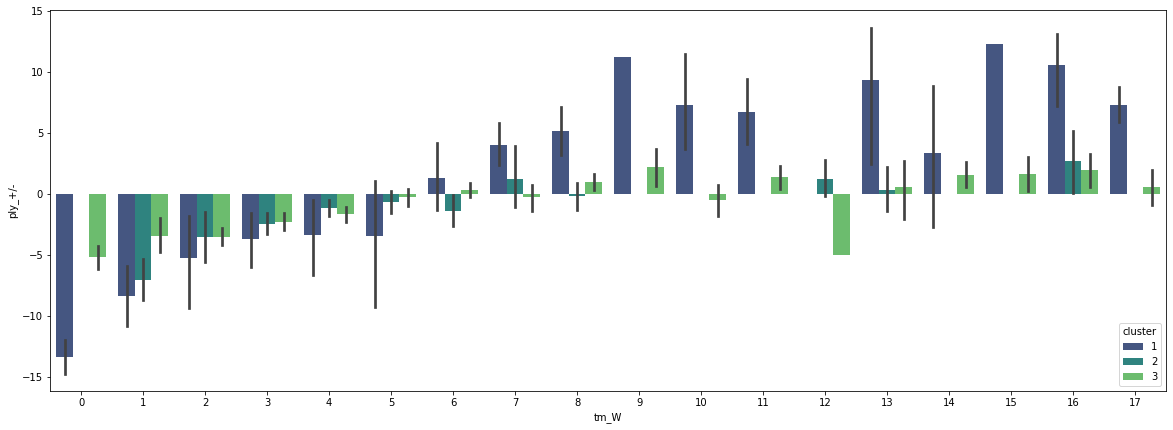

In [977]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_cluster)
plt.show()

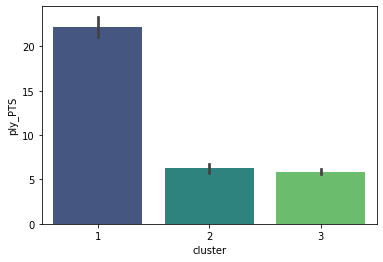

In [978]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

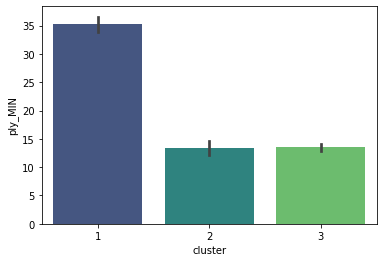

In [979]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

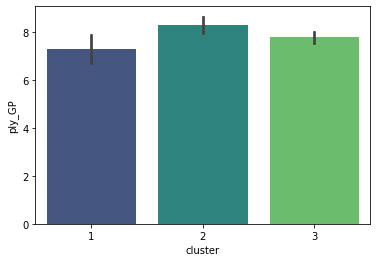

In [980]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

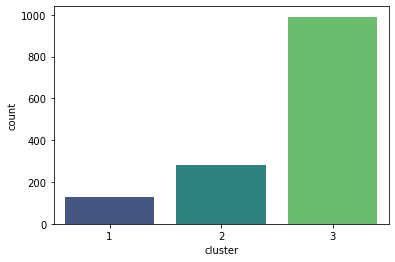

In [981]:
sns.countplot(x='cluster', data=df_avg_player_team_cluster,
             palette='viridis');

#### Radar plot

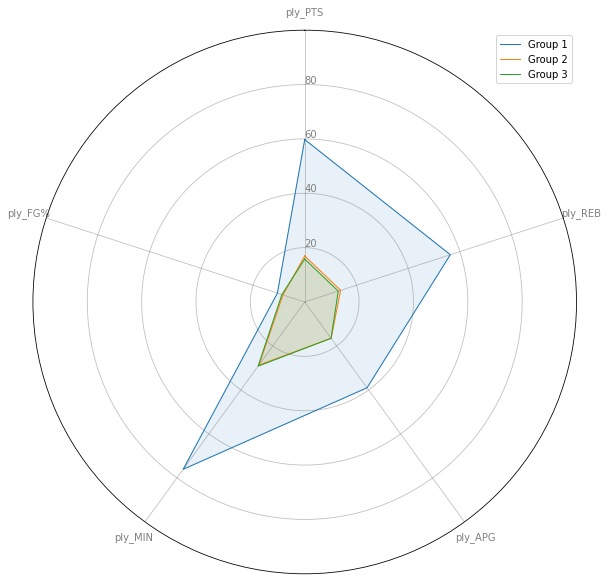

In [982]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_cluster[['cluster', 'ply_PTS',
                               'ply_REB', 'ply_APG', 'ply_MIN',
                               'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

### Average Player Statistics Governor's Cup

In [999]:
m1 = df_avg_player_team.conference == 'GOV'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_gov = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_gov.drop(['year', 'conference',
                                           'player_name',
                                           'team_name', 'pos', 'j_number',
                                           'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_gov.pos)
target = lbl_enc.transform(df_avg_player_team_gov.pos)

#### Explore Dimensionality Reduction

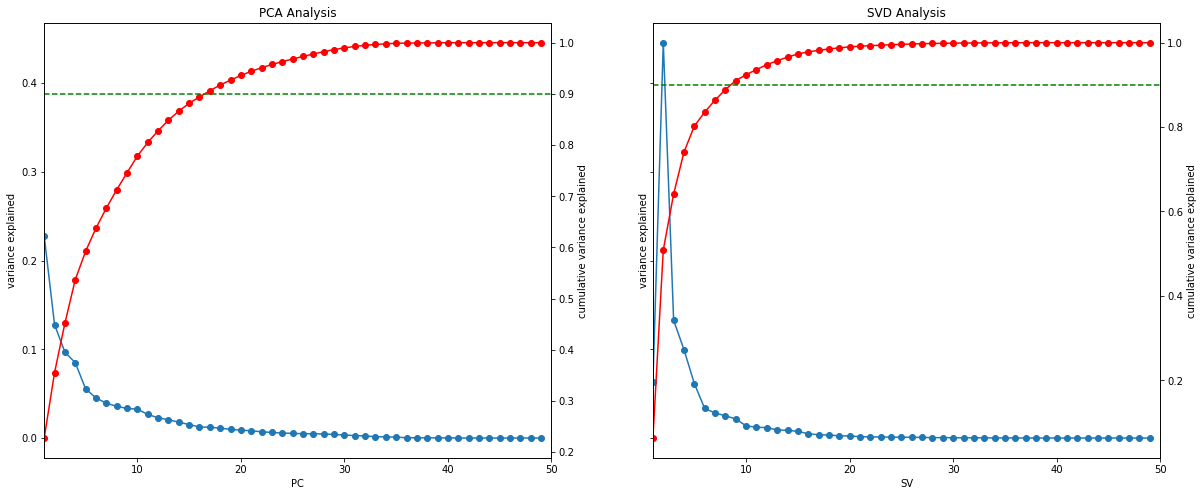

In [1000]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 93% cumulative explained variance with just 8 components where using PCA needed 17 components.

In [1001]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

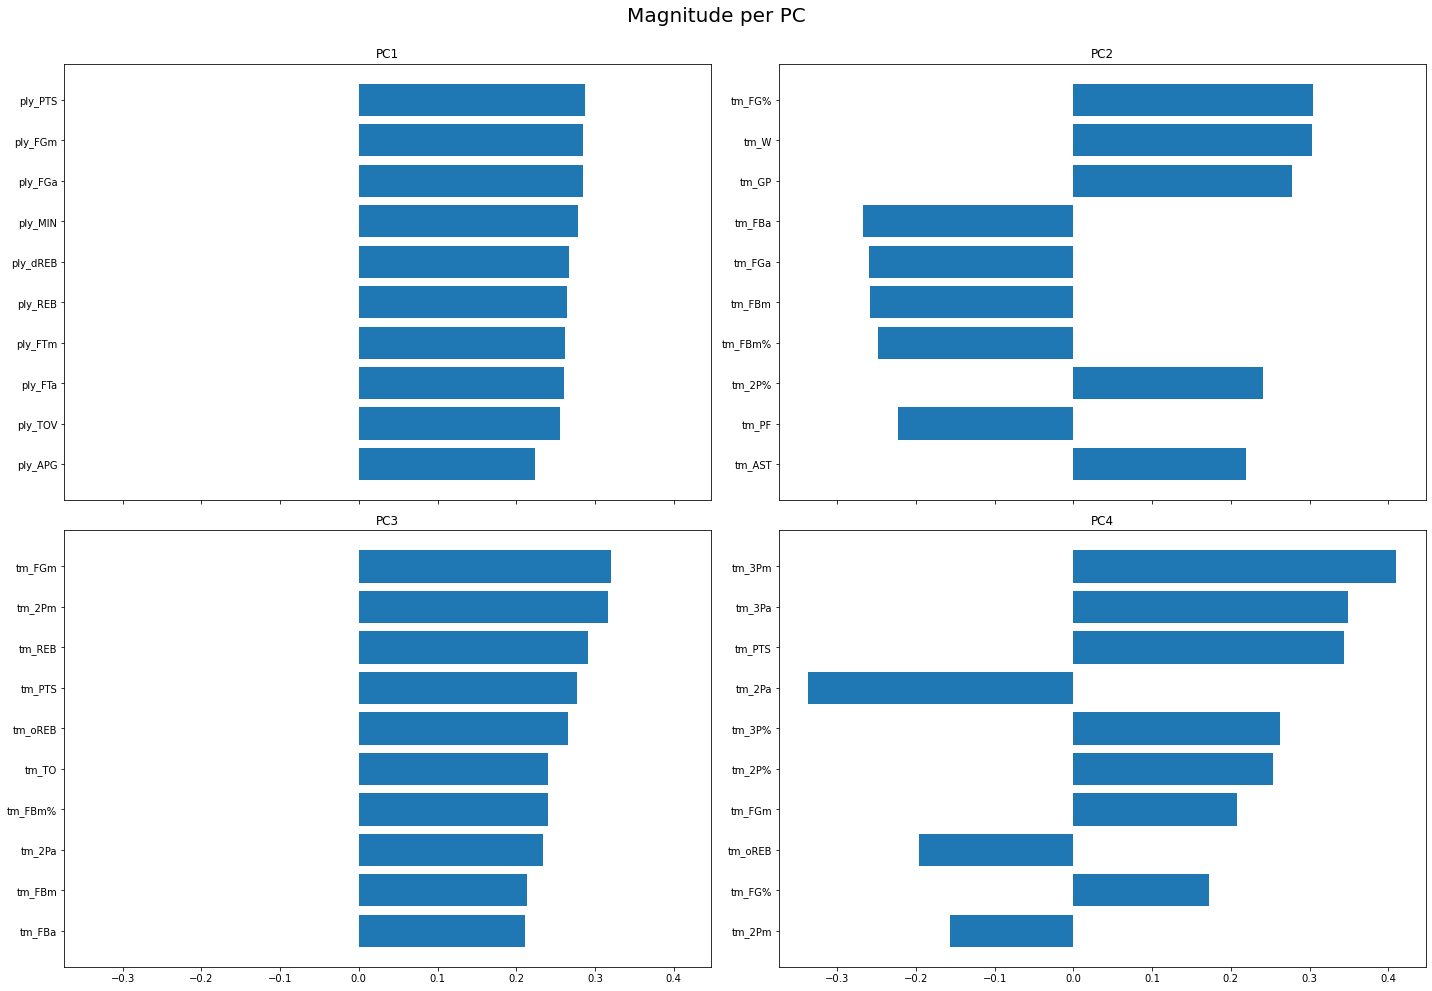

In [1002]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

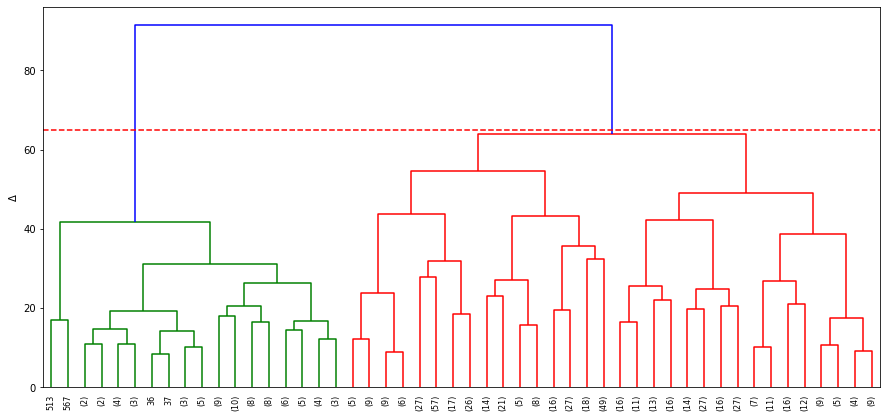

In [1003]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(65, c='r', linestyle='dashed');

#### Single Linkage Method

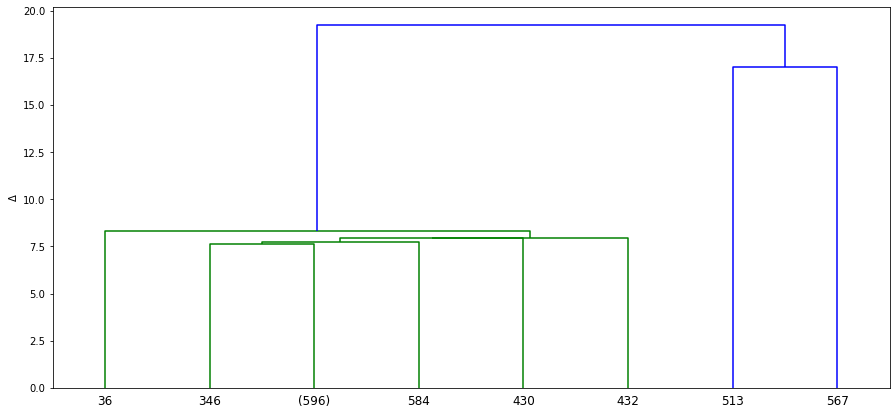

In [1004]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

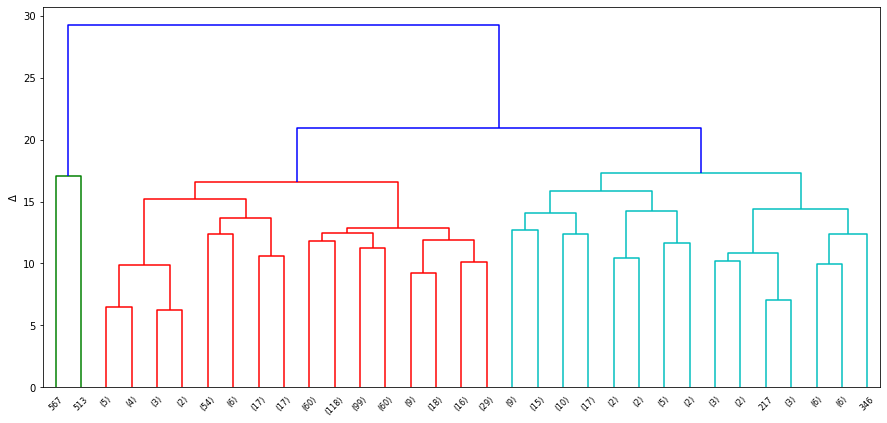

In [1005]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(60, c='r', linestyle='dashed');

#### Average Linkage Method

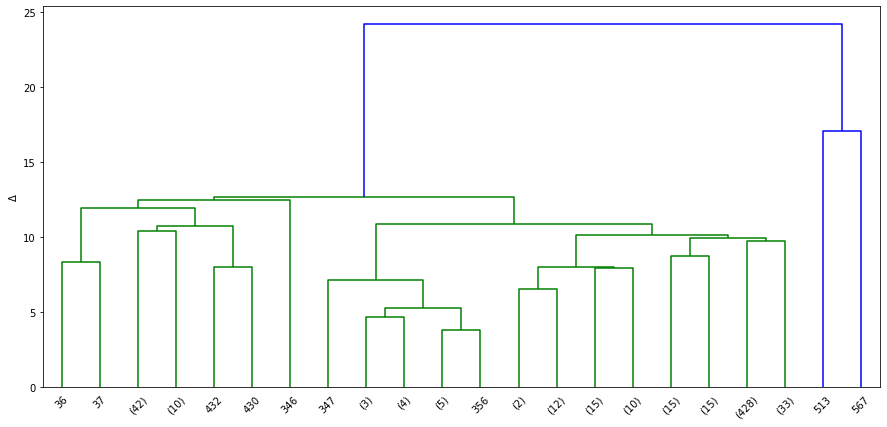

In [1006]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(33, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

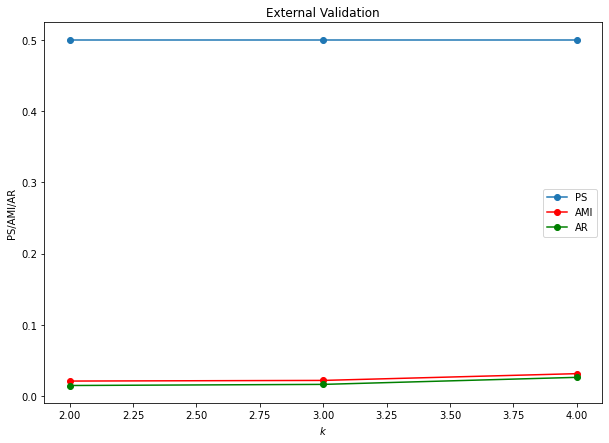

In [716]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=50, t_stop=65, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

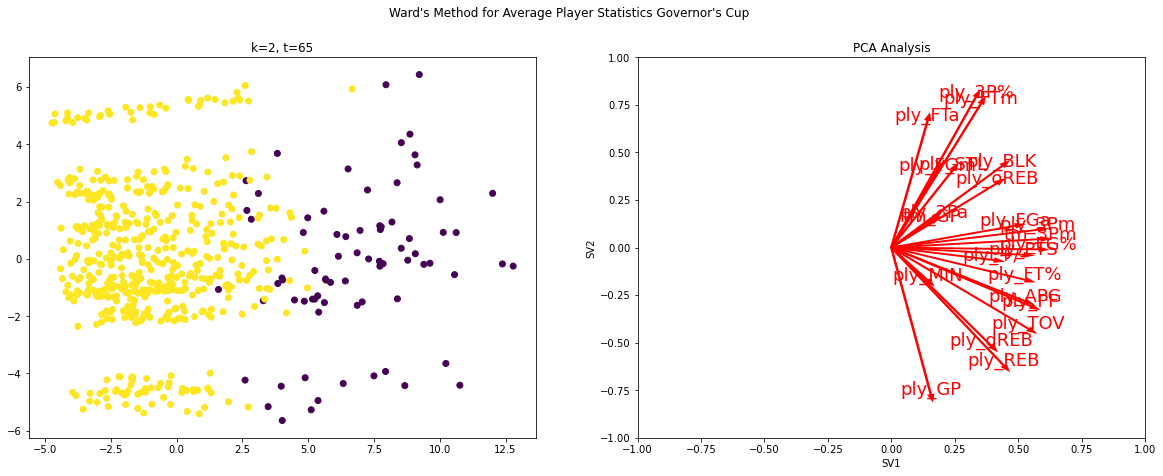

In [991]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 65, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics Governor's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1008]:
y_cluster = fcluster(Z_ward, t=65, criterion='distance')
df_avg_player_team_gov['cluster'] = y_cluster

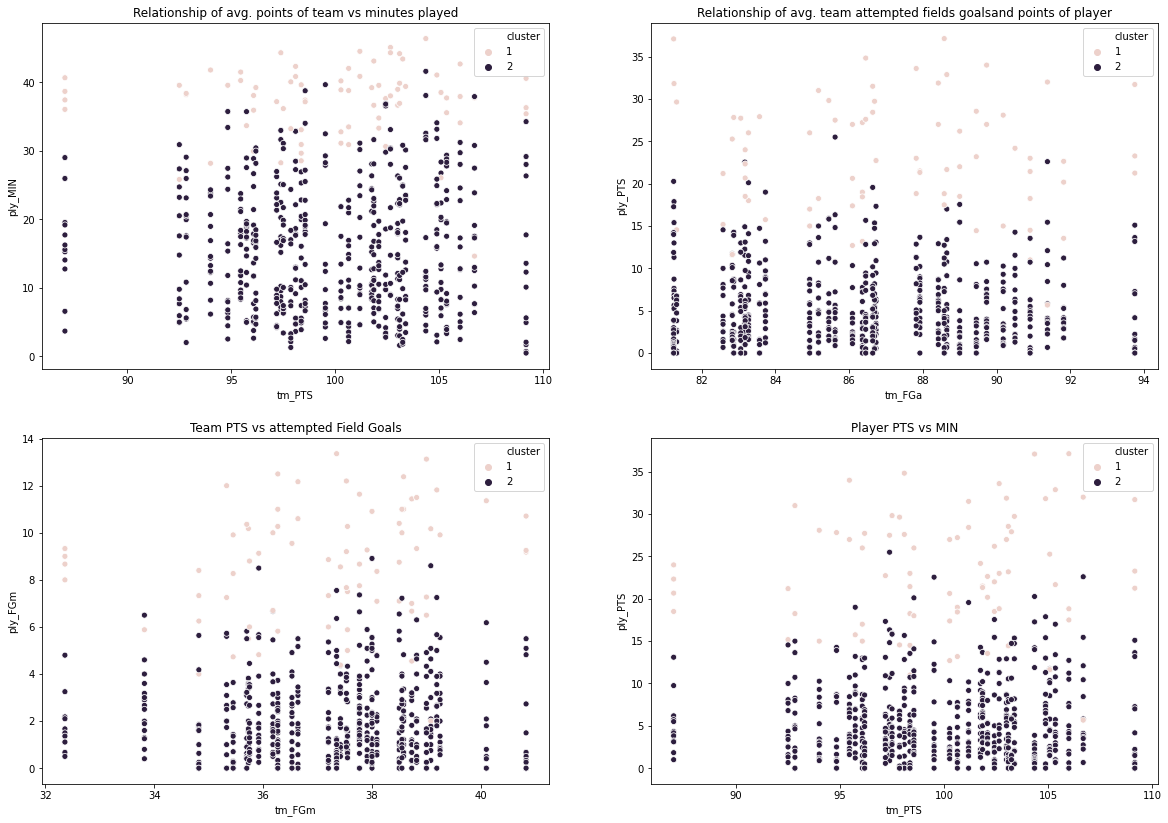

In [1010]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

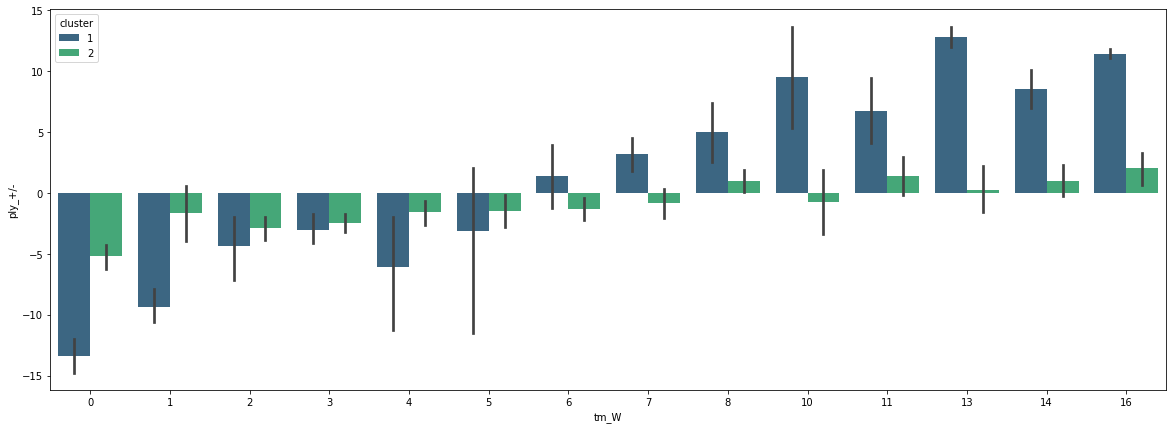

In [1011]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_gov)
plt.show()

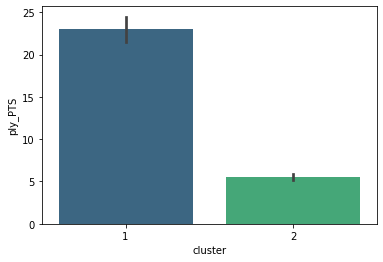

In [1012]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_gov,
            palette='viridis', estimator=np.mean)

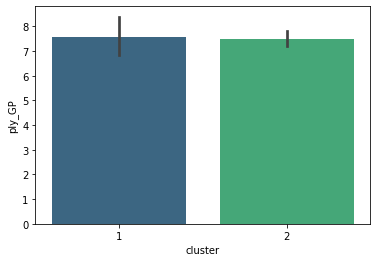

In [1013]:
# sns.barplot(x='cluster', y='MIN', data=df_avg_player_cluster,
#             estimator=np.mean)
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_gov,
            palette='viridis', estimator=np.mean)

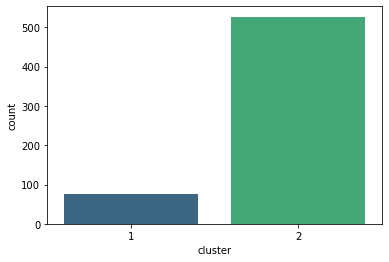

In [1014]:
sns.countplot(x='cluster', data=df_avg_player_team_gov,
             palette='viridis');

#### Radar plot

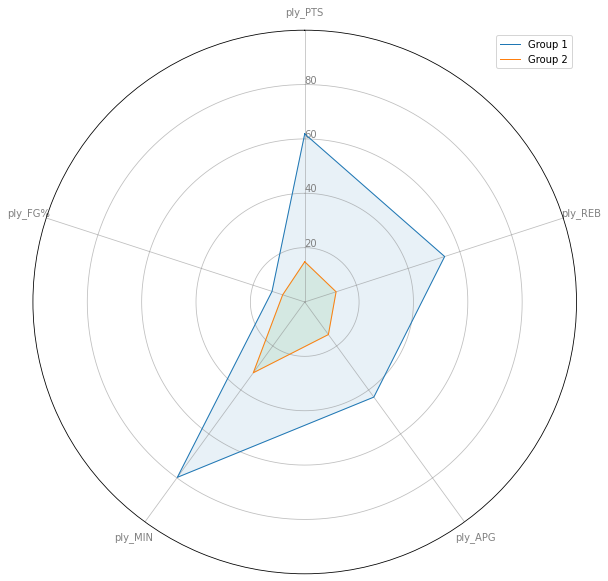

In [1015]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_gov[['cluster', 'ply_PTS',
                                   'ply_REB', 'ply_APG', 'ply_MIN',
                                   'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average Player Statistics Commisioner's Cup

In [1016]:
m1 = df_avg_player_team.conference == 'COM'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_com = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_com.drop(['year', 'conference',
                                           'player_name', 'team_name',
                                           'pos', 'j_number',
                                           'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_com.pos)
target = lbl_enc.transform(df_avg_player_team_com.pos)

#### Explore Dimensionality Reduction

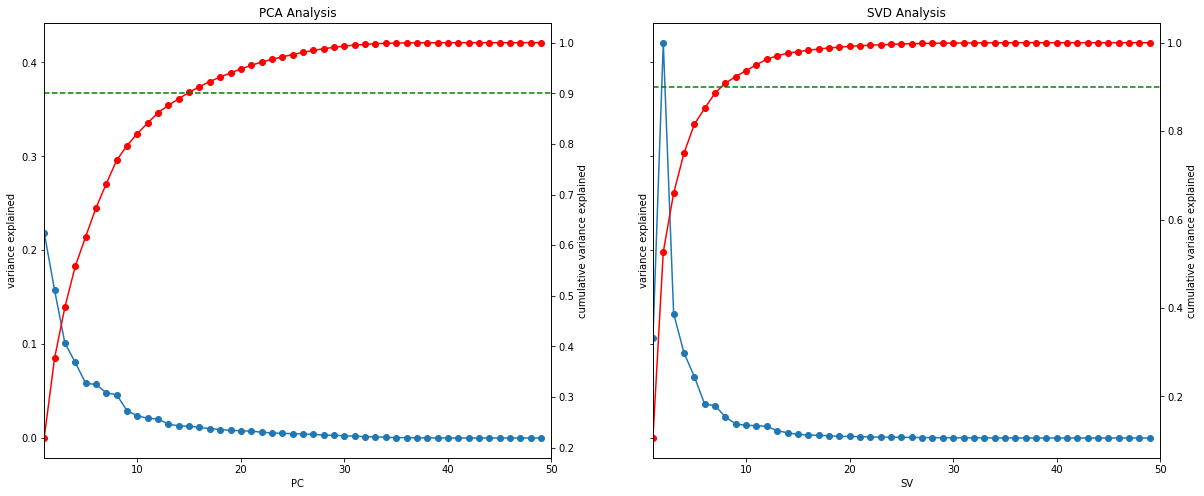

In [1017]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just 7 components where using PCA needed 15 components.

In [1018]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

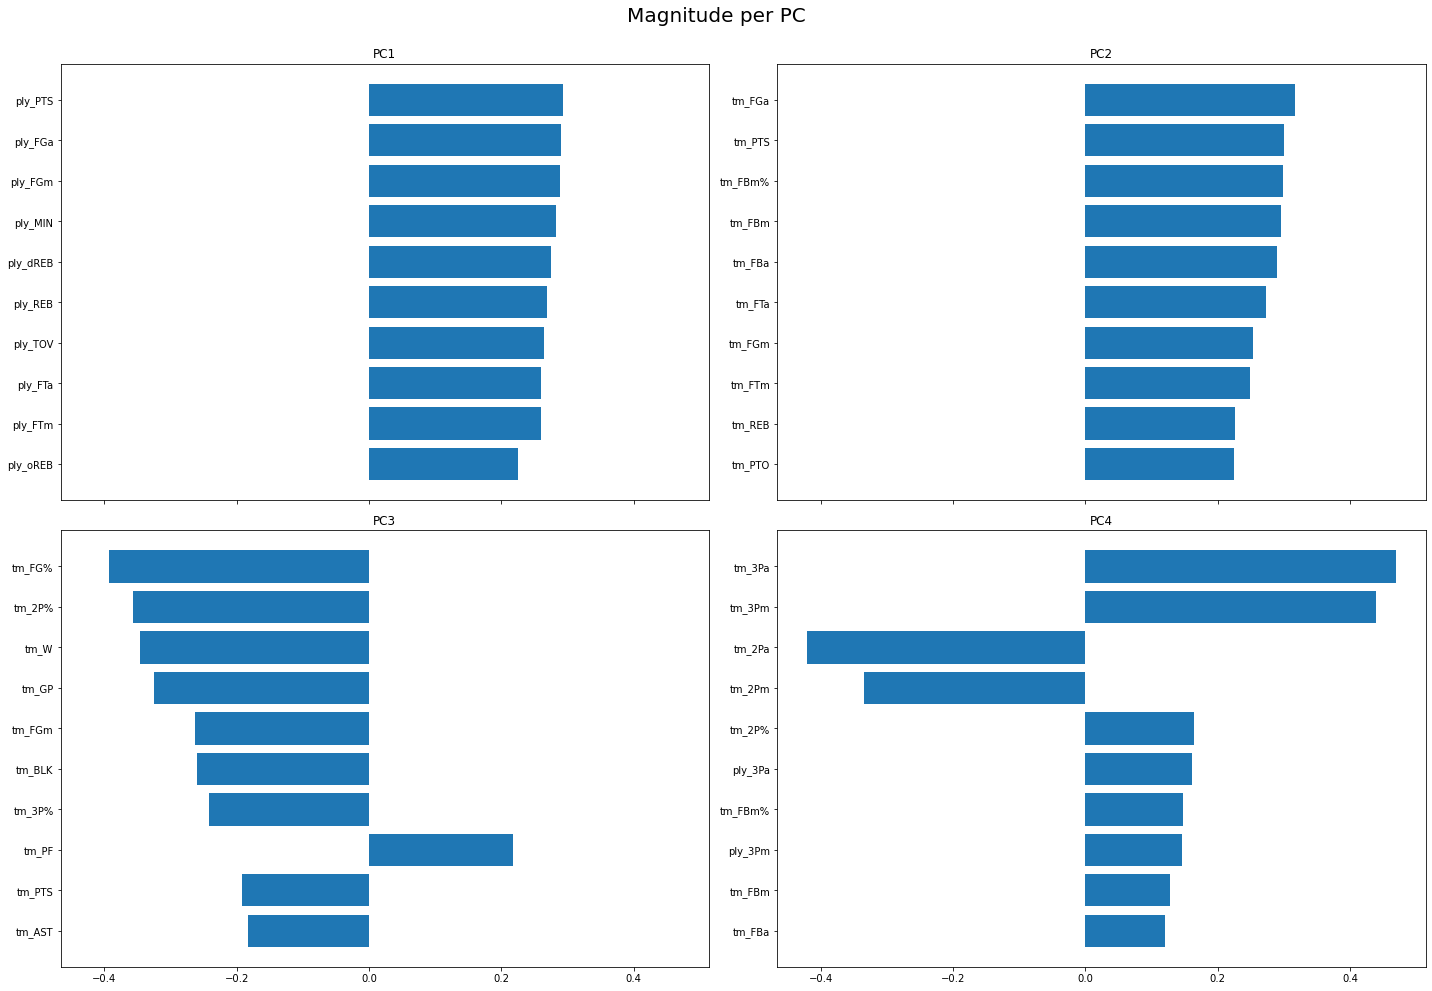

In [1019]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

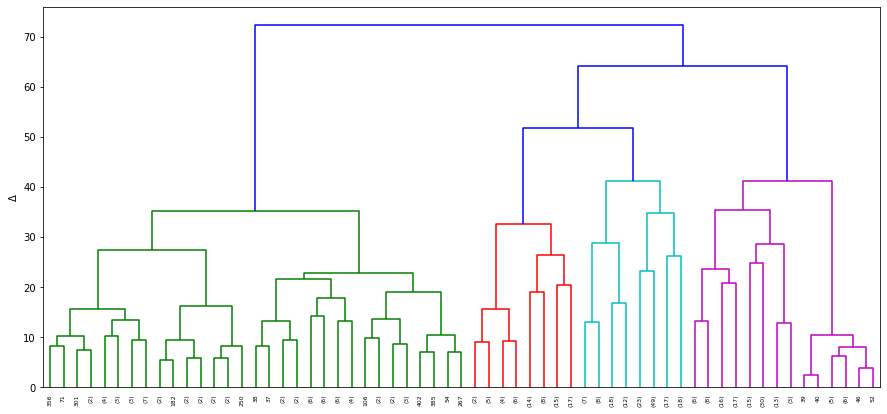

In [1020]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(200, c='r', linestyle='dashed');

#### Single Linkage Method

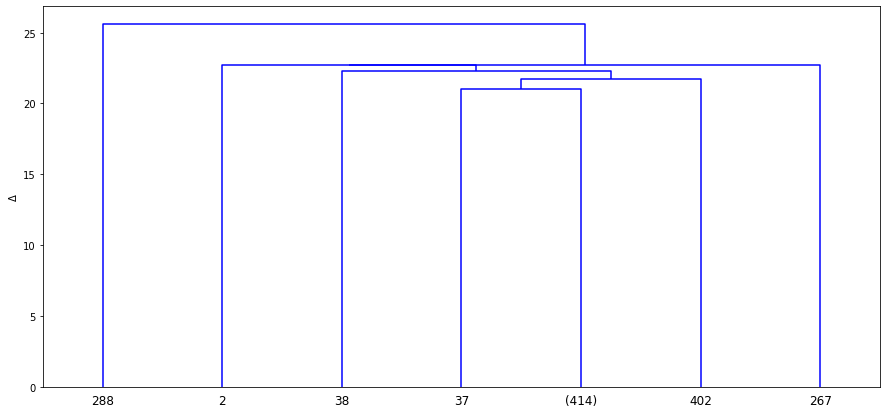

In [1021]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature_raw, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

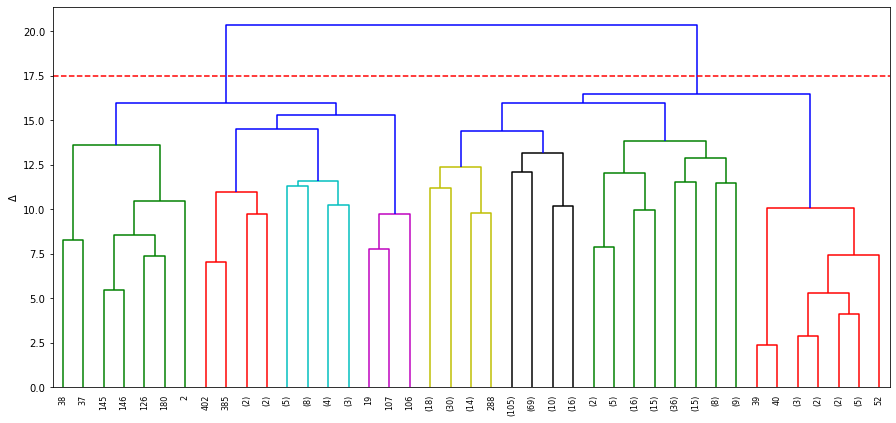

In [1022]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(17.5, c='r', linestyle='dashed');

#### Average Linkage Method

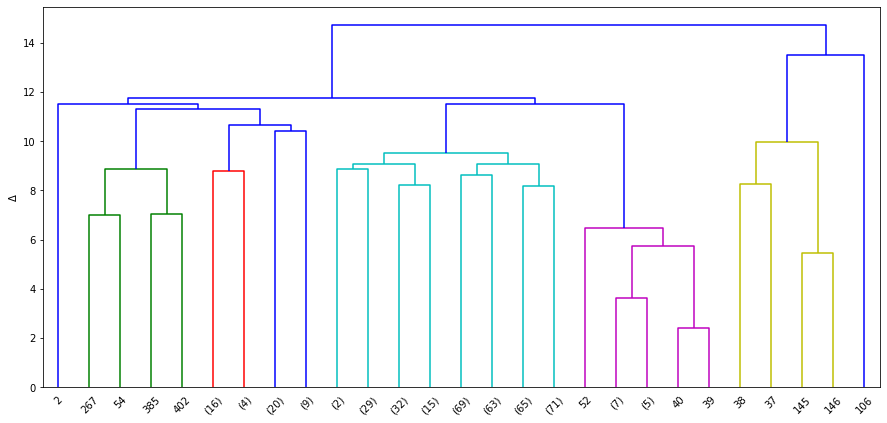

In [1023]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(28, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

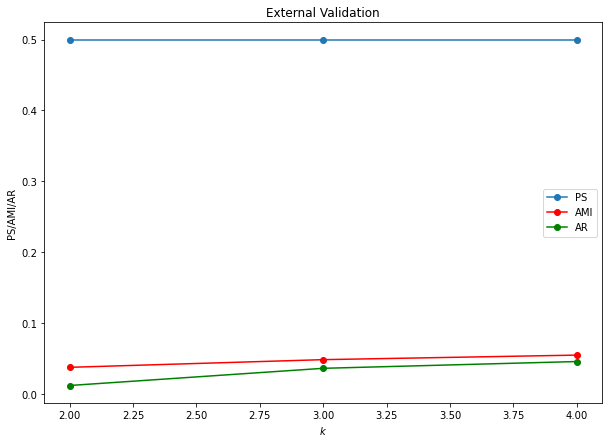

In [742]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'complete',
                          t_start=15, t_stop=17.5, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

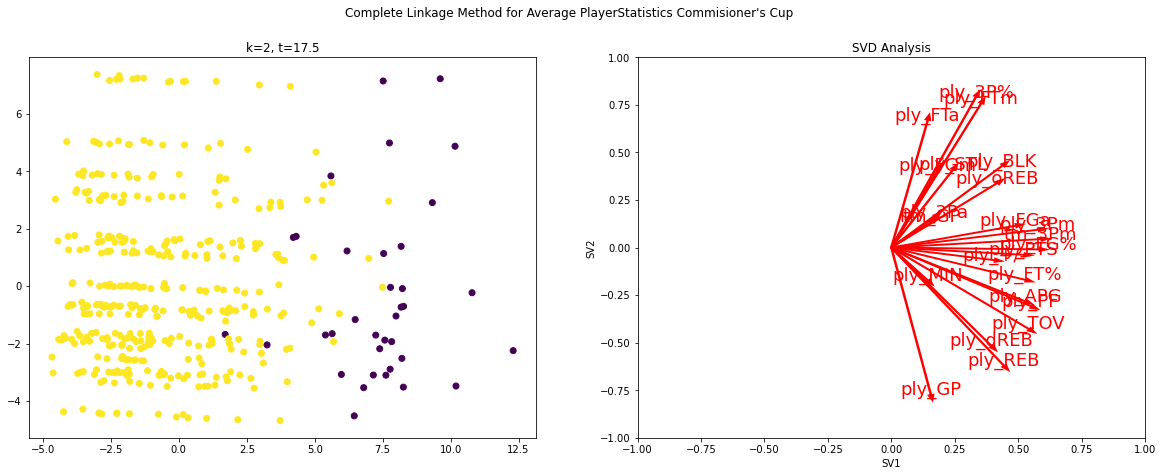

In [1024]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 17.5, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('SVD Analysis')

plt.suptitle("Complete Linkage Method for Average Player"
             "Statistics Commisioner's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1025]:
y_cluster = fcluster(Z_complete, t=17.5, criterion='distance')
df_avg_player_team_com['cluster'] = y_cluster

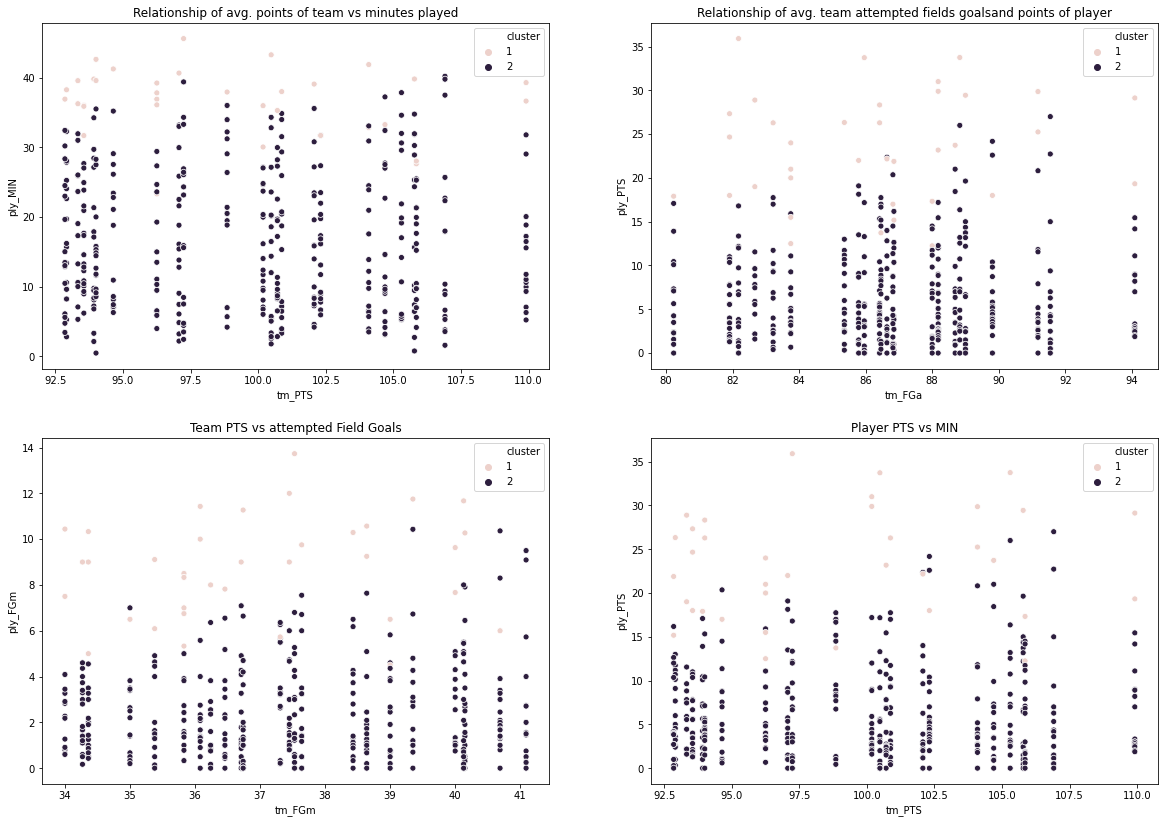

In [1026]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

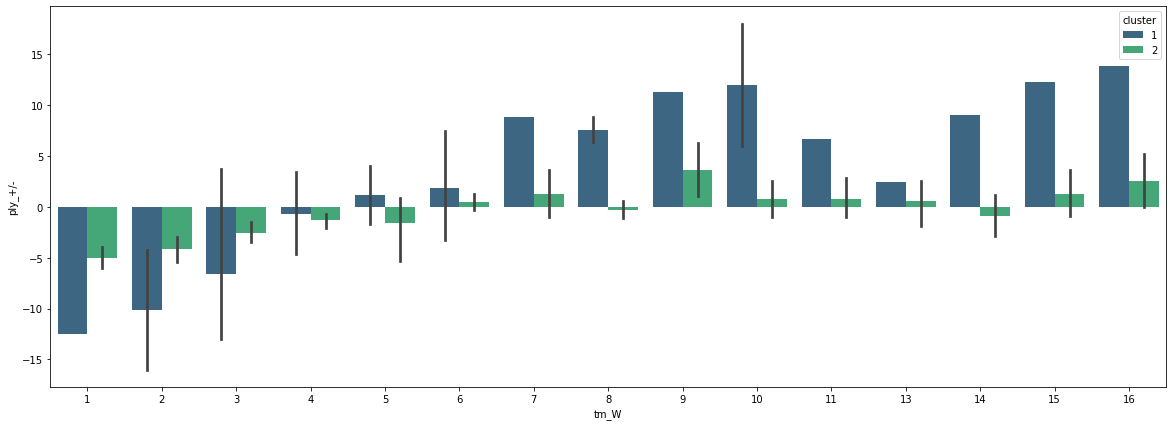

In [1027]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_com)
plt.show()

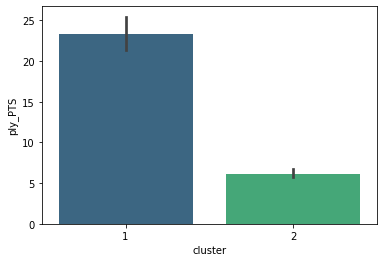

In [1028]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

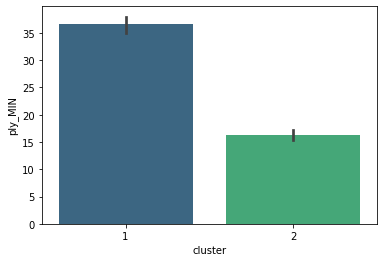

In [1029]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

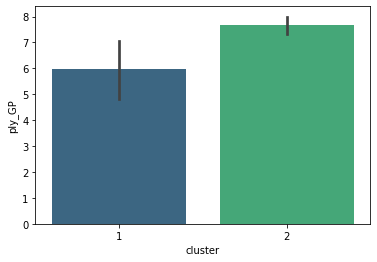

In [1030]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

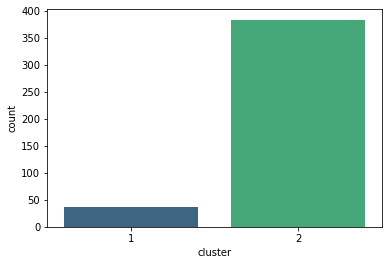

In [1031]:
sns.countplot(x='cluster', data=df_avg_player_team_com,
             palette='viridis');

#### Radar plot

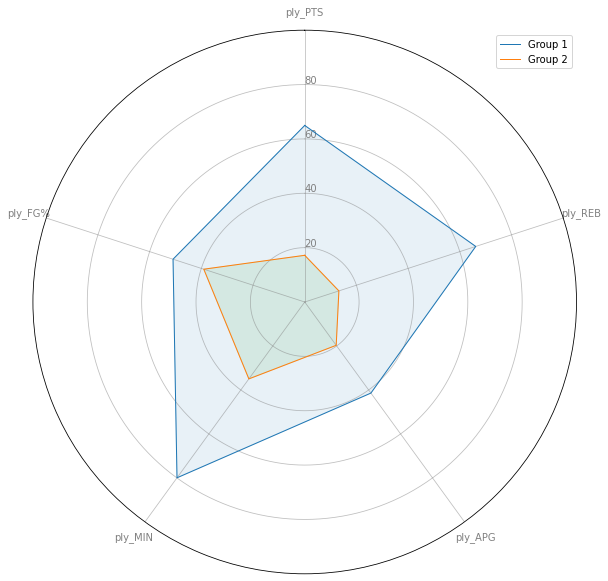

In [1032]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_com[['cluster', 'ply_PTS',
                                   'ply_REB', 'ply_APG', 'ply_MIN',
                                   'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average Player Statistics Philippine Cup

In [1033]:
m1 = df_avg_player_team.conference == 'PH'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_ph = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_ph.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_ph.pos)
target = lbl_enc.transform(df_avg_player_team_ph.pos)

#### Explore Dimensionality Reduction

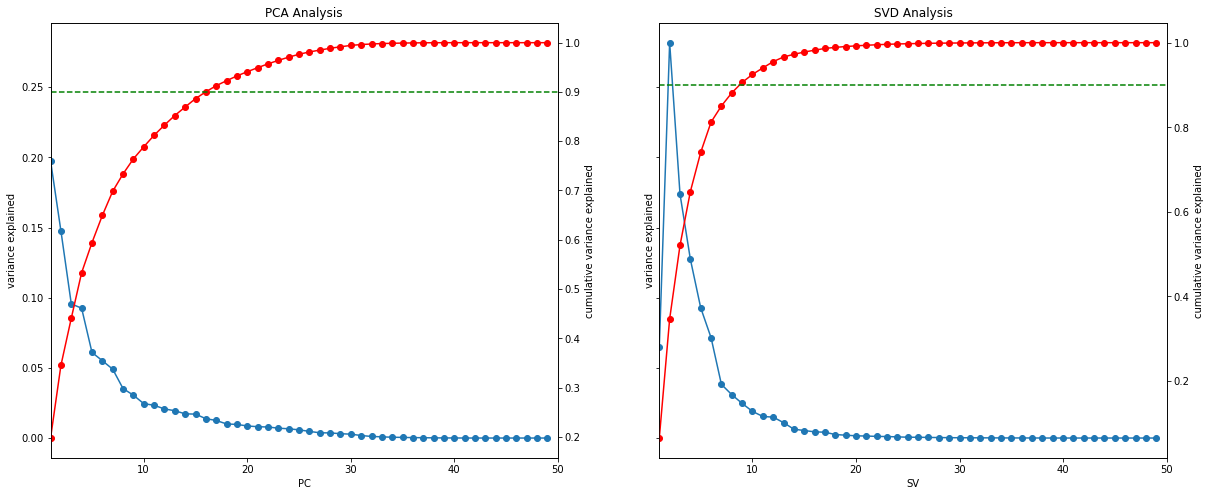

In [1034]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just 9 components where using PCA needed 16 components.

In [1035]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

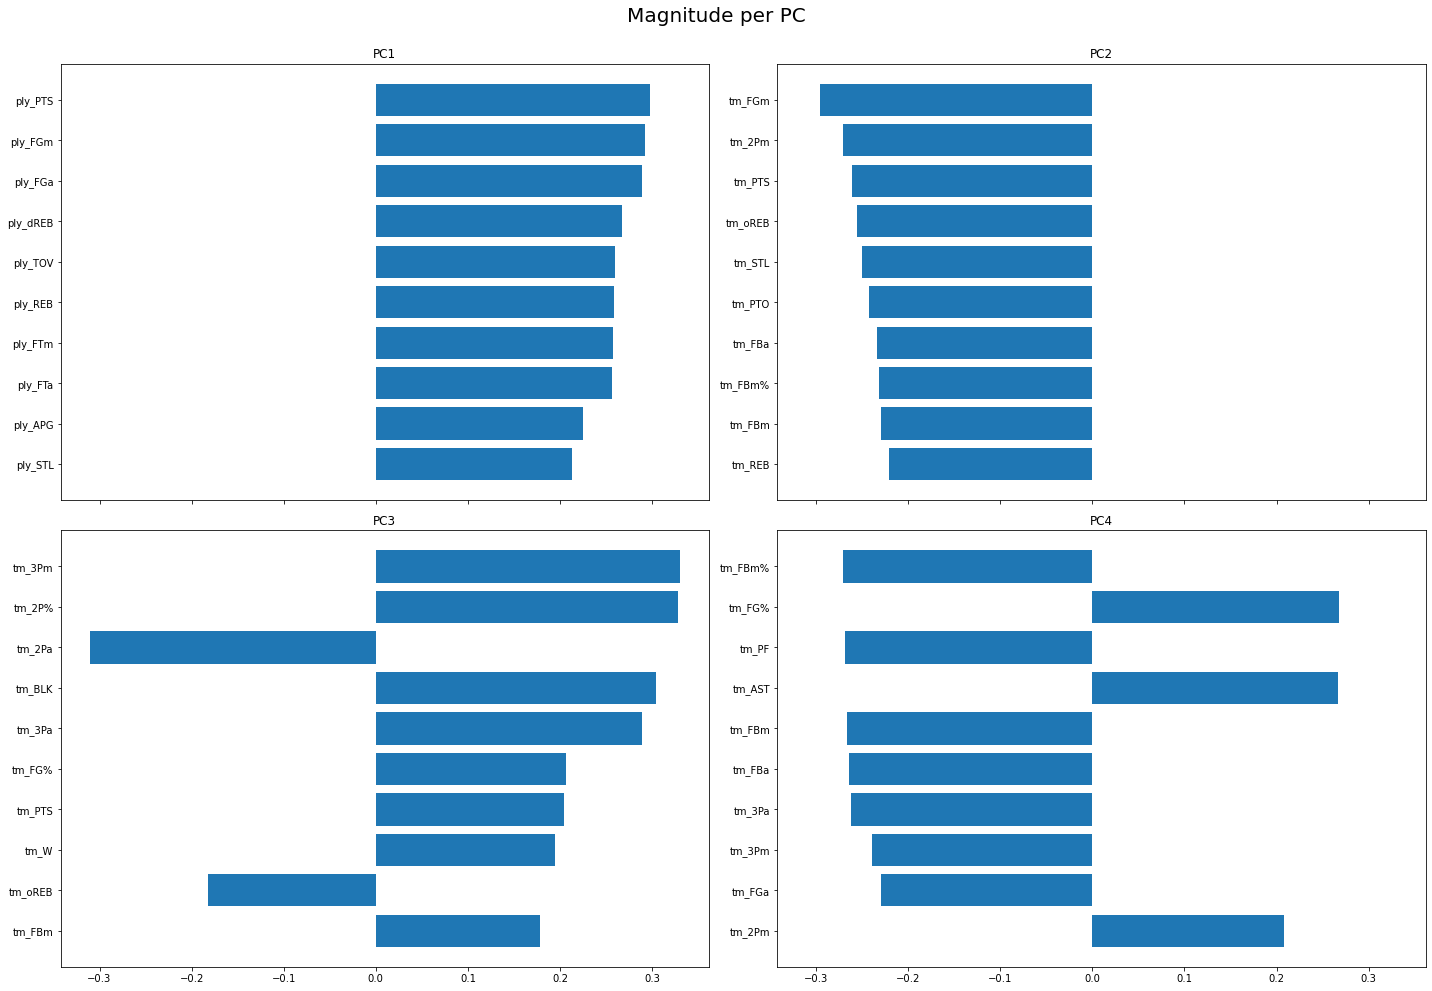

In [1036]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

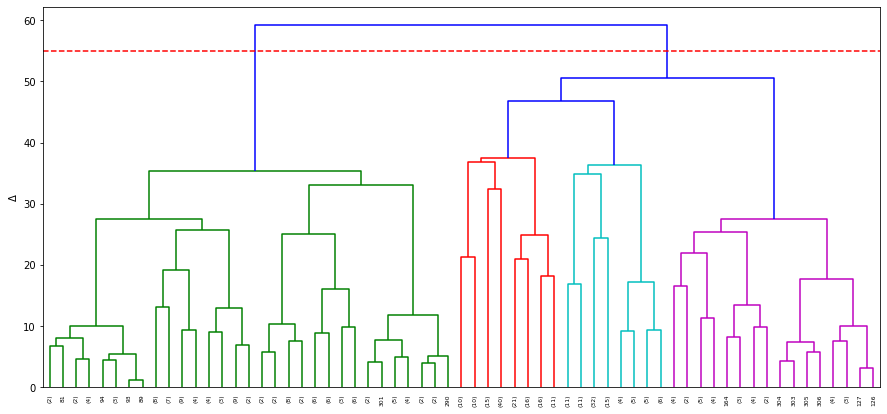

In [1037]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(55, c='r', linestyle='dashed');

#### Single Linkage Method

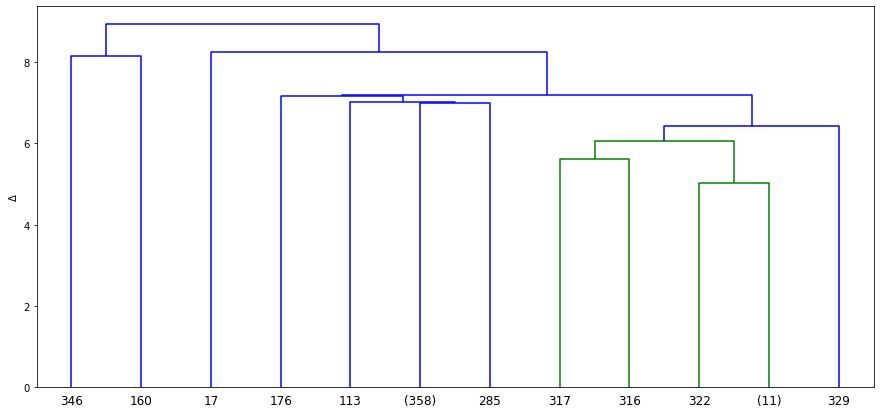

In [1038]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

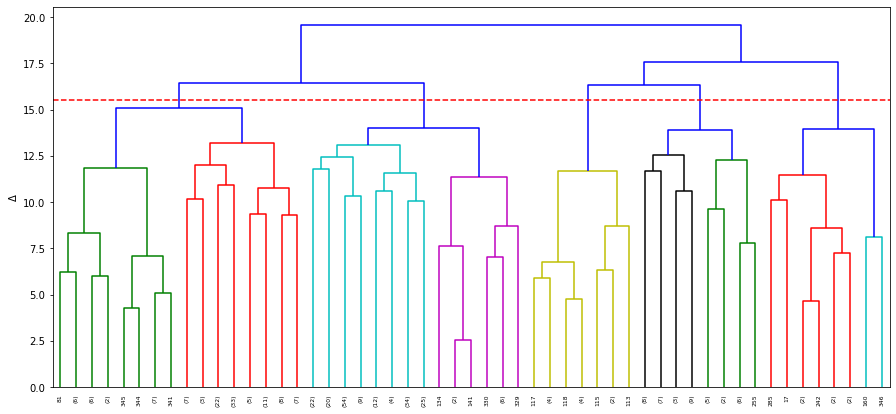

In [1042]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(15.5, c='r', linestyle='dashed');

#### Average Linkage Method

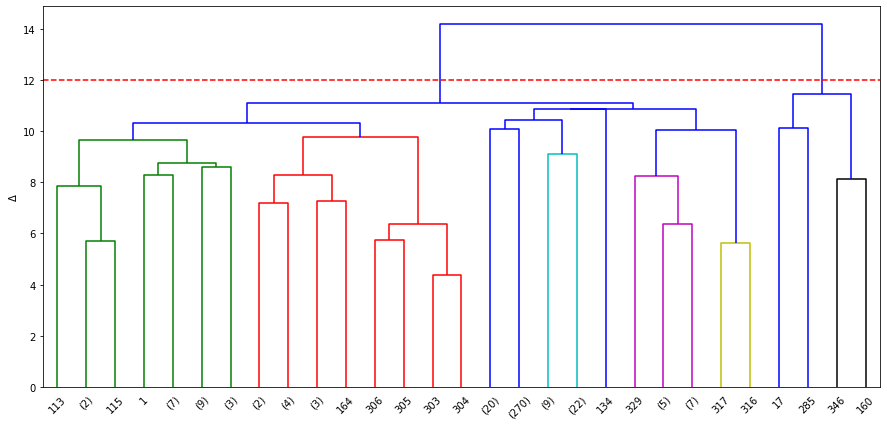

In [1040]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(12, c='r', linestyle='dashed');

#### Result

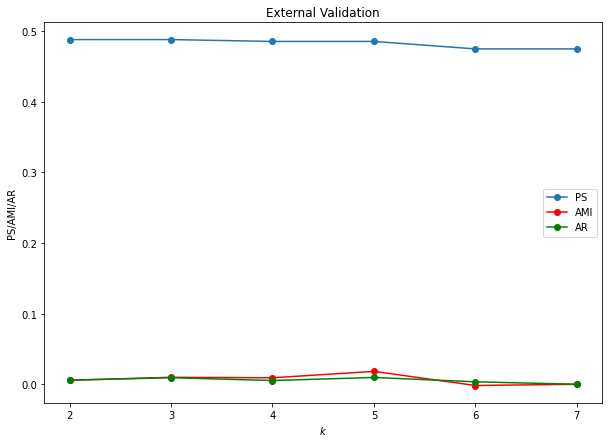

In [763]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'complete',
                          t_start=13, t_stop=20, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

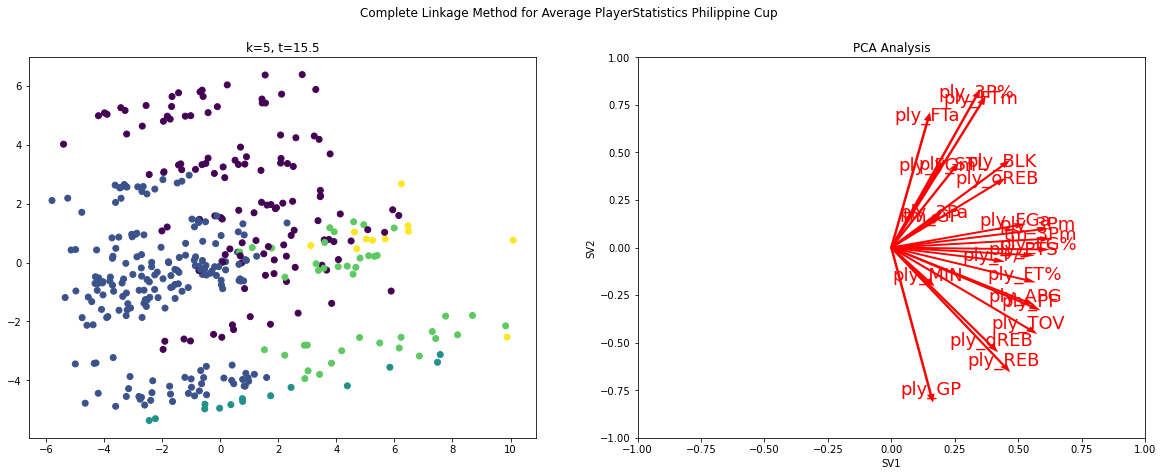

In [1043]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 15.5, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Complete Linkage Method for Average Player"
             "Statistics Philippine Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1053]:
y_cluster = fcluster(Z_complete, t=15.5, criterion='distance')
df_avg_player_team_ph['cluster'] = y_cluster

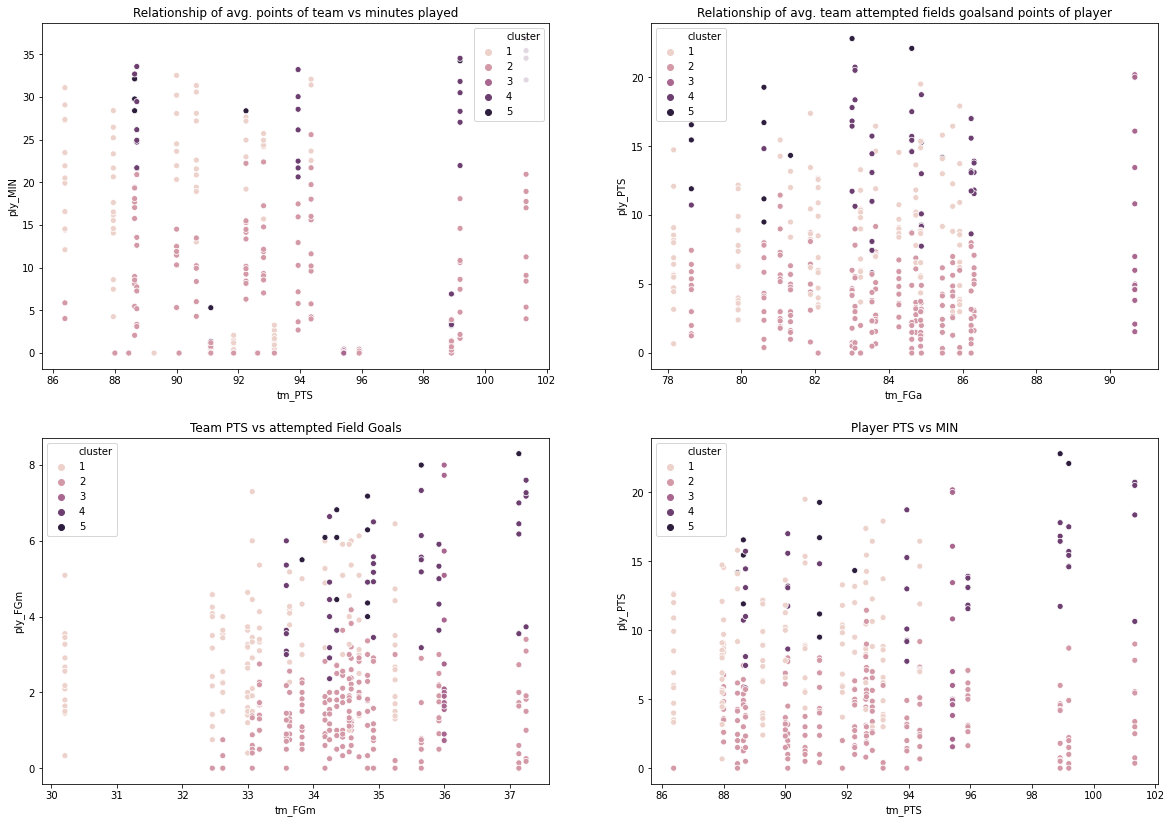

In [1054]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

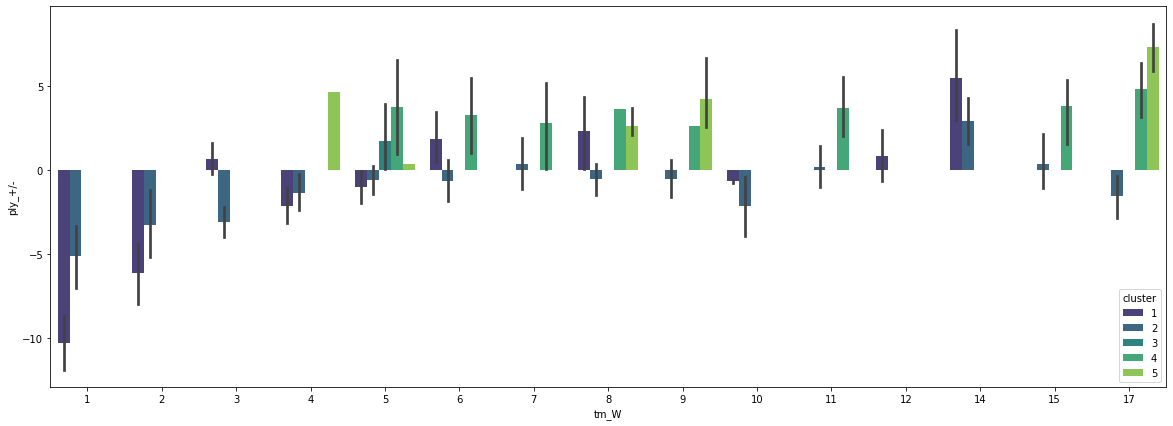

In [1055]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_ph)
plt.show()

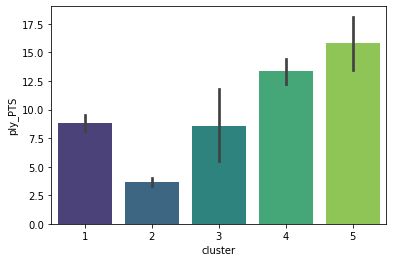

In [1056]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

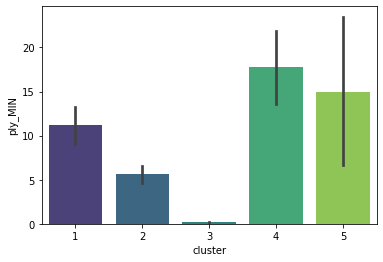

In [1057]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

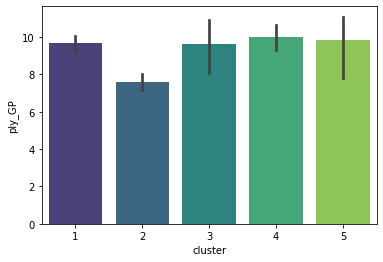

In [1058]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

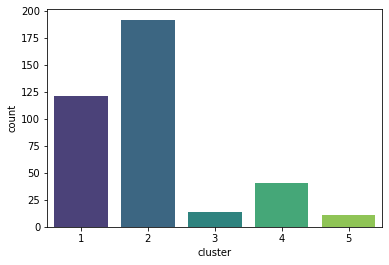

In [1059]:
sns.countplot(x='cluster', data=df_avg_player_team_ph,
             palette='viridis');

#### Radar plot

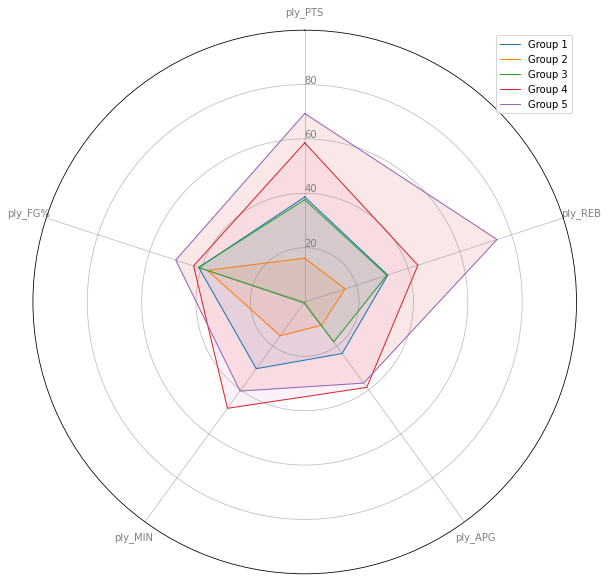

In [1060]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_ph[['cluster', 'ply_PTS',
                                  'ply_REB', 'ply_APG', 'ply_MIN',
                                  'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green',
                         'tab:pink', 'tab:red'])
plt.legend();

## Average Team Statistics

### All average team statistics

In [1061]:
df_avg_team = fetcher.get_avg_team()
df_avg_team = df_avg_team.loc[df_avg_team.year.astype(int) < 2020]
feature_raw = df_avg_team.drop(['year', 'conference', 'team_name'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

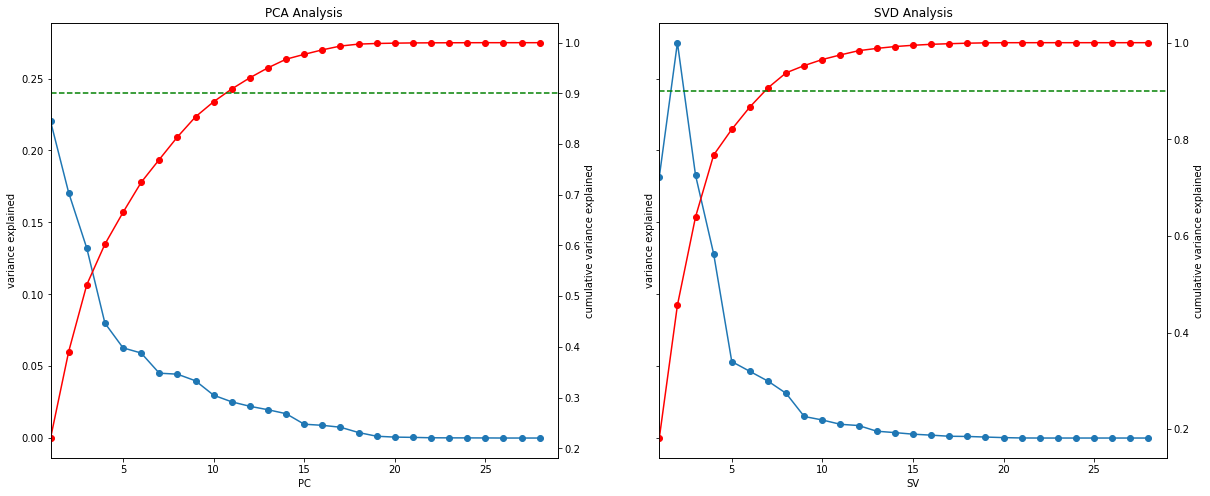

In [1062]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved a 90% cumulative explained variance with just seven components where using PCA needed eleven components.

In [1063]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

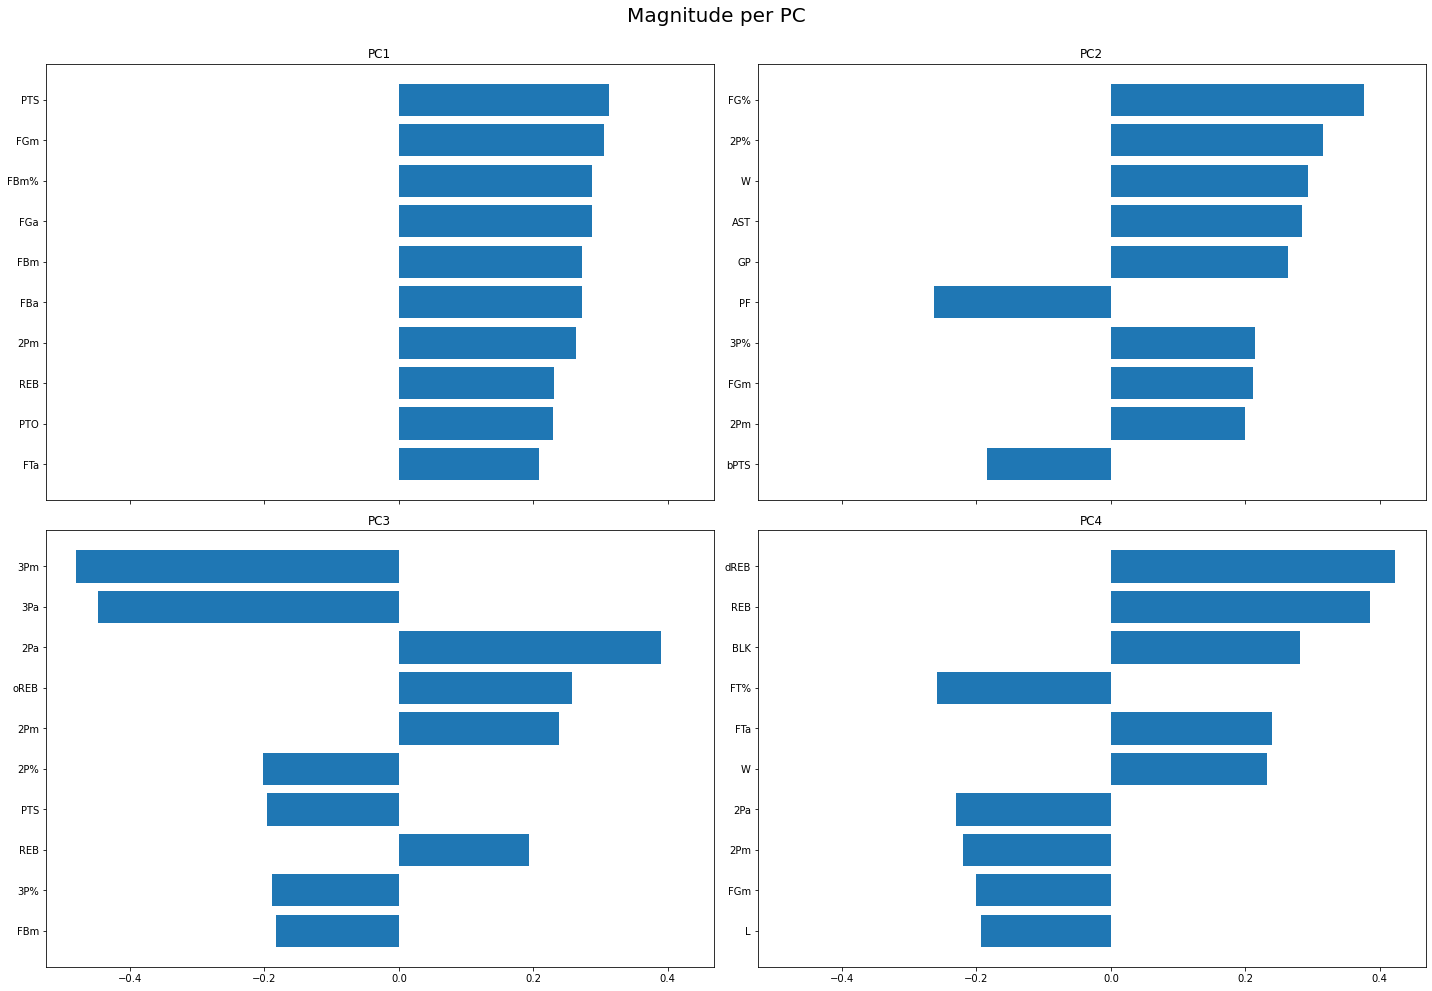

In [1064]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

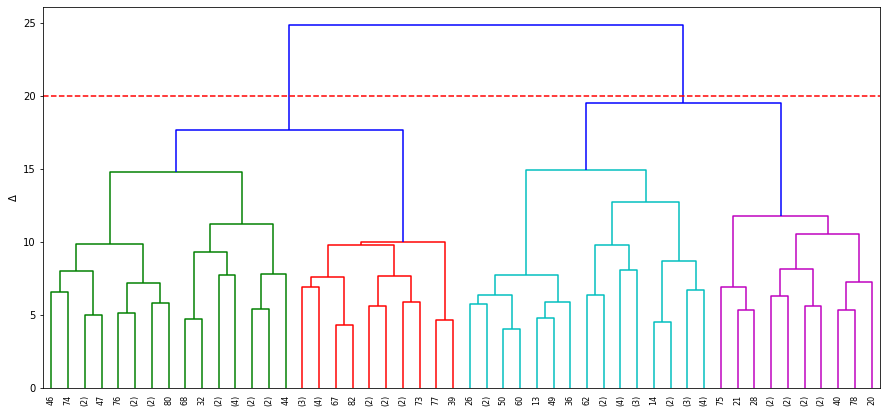

In [1065]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(20, c='r', linestyle='dashed');

#### Single Linkage Method

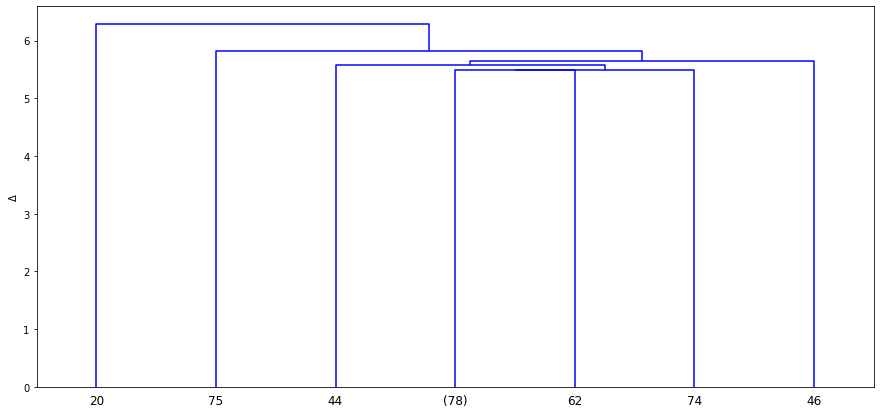

In [1066]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

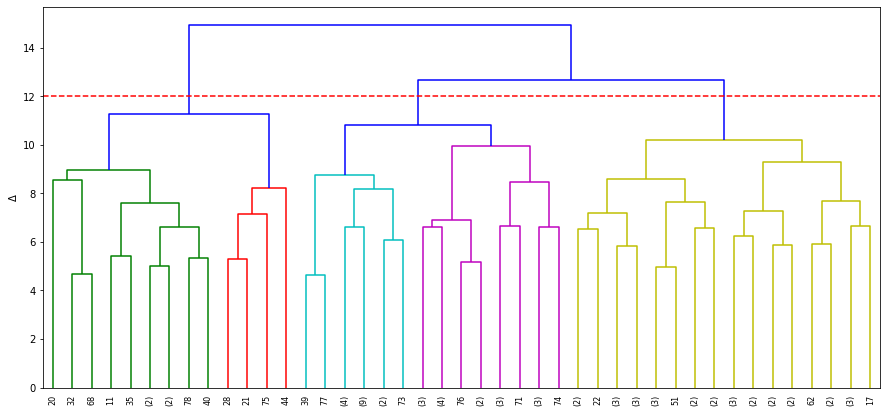

In [1067]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(12, c='r', linestyle='dashed');

#### Average Linkage Method

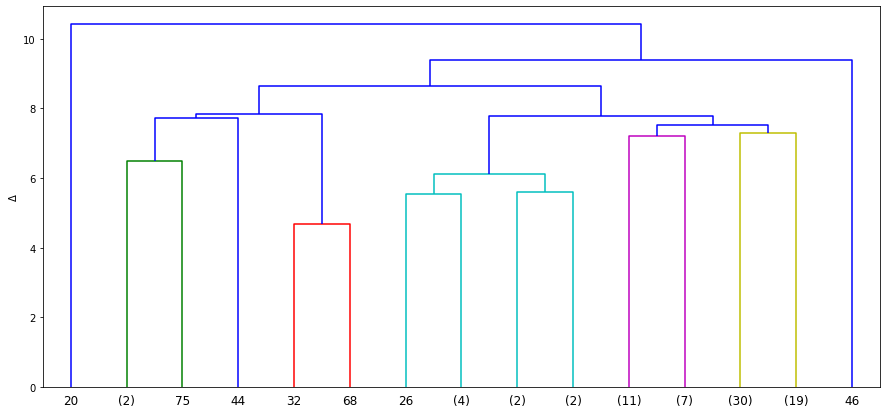

In [1068]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

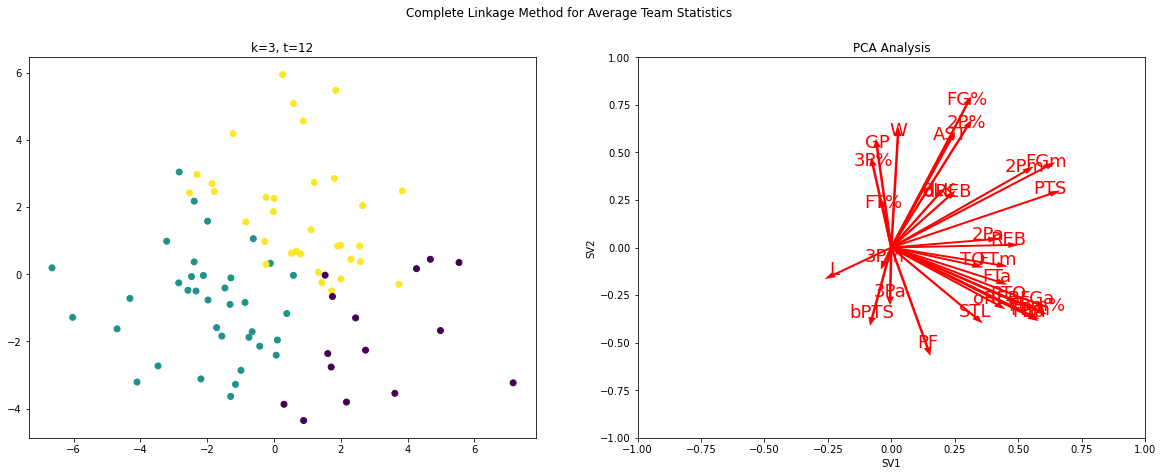

In [1069]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 12, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Complete Linkage Method for Average Team Statistics");

We have examined the performance of each Agglomerative clustering method using dendrograms. From the results we have gathered, we infer that using Ward's method is the best for this scenario. Unlike the other methods, Ward's method formed clusters that are far from each other, and the number of each data point within the cluster is balanced. Three groups yield the longest distance from other clusters with a threshold of 70.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is bPTS while PTS is the most dominant feature in SV1. As the two most dominant feature in the dataset are orthogonal to one another, we infer that there is no correlation between PTS and bPTS. Based on the magnitude of the bPTS, we can cluster the dataset with teams with low bPTS.

In [1070]:
y_cluster = fcluster(Z_complete, t=12, criterion='distance')
df_avg_team_cluster = df_avg_team.copy()
df_avg_team_cluster['cluster'] = y_cluster

#### Radar plot

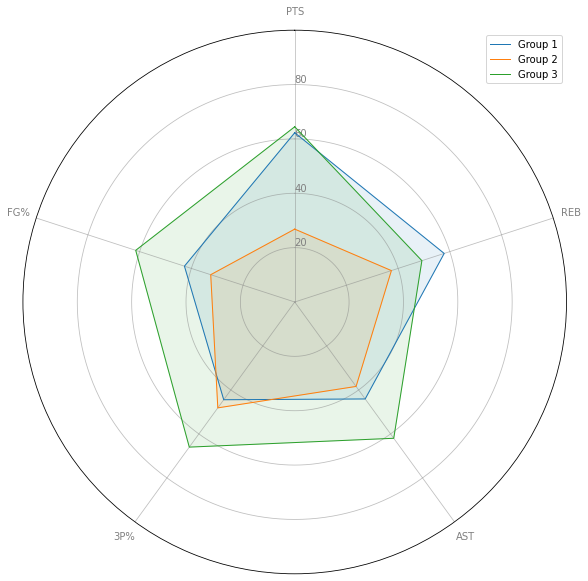

In [1071]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_cluster[['cluster', 'PTS',
                                'REB', 'AST', '3P%',
                                'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend()

### Average team statistics Governor's Cup

In [1123]:
m1 = df_avg_team.conference == 'GOV'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_gov = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_gov.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

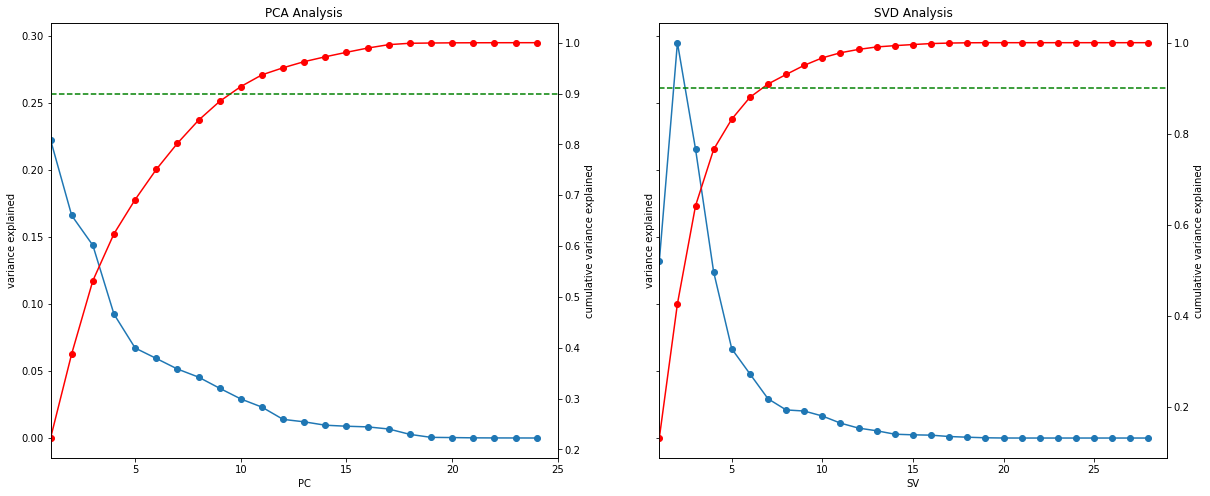

In [1124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved a 90% cumulative explained variance with just seven components where using PCA needed eleven components.

In [1125]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

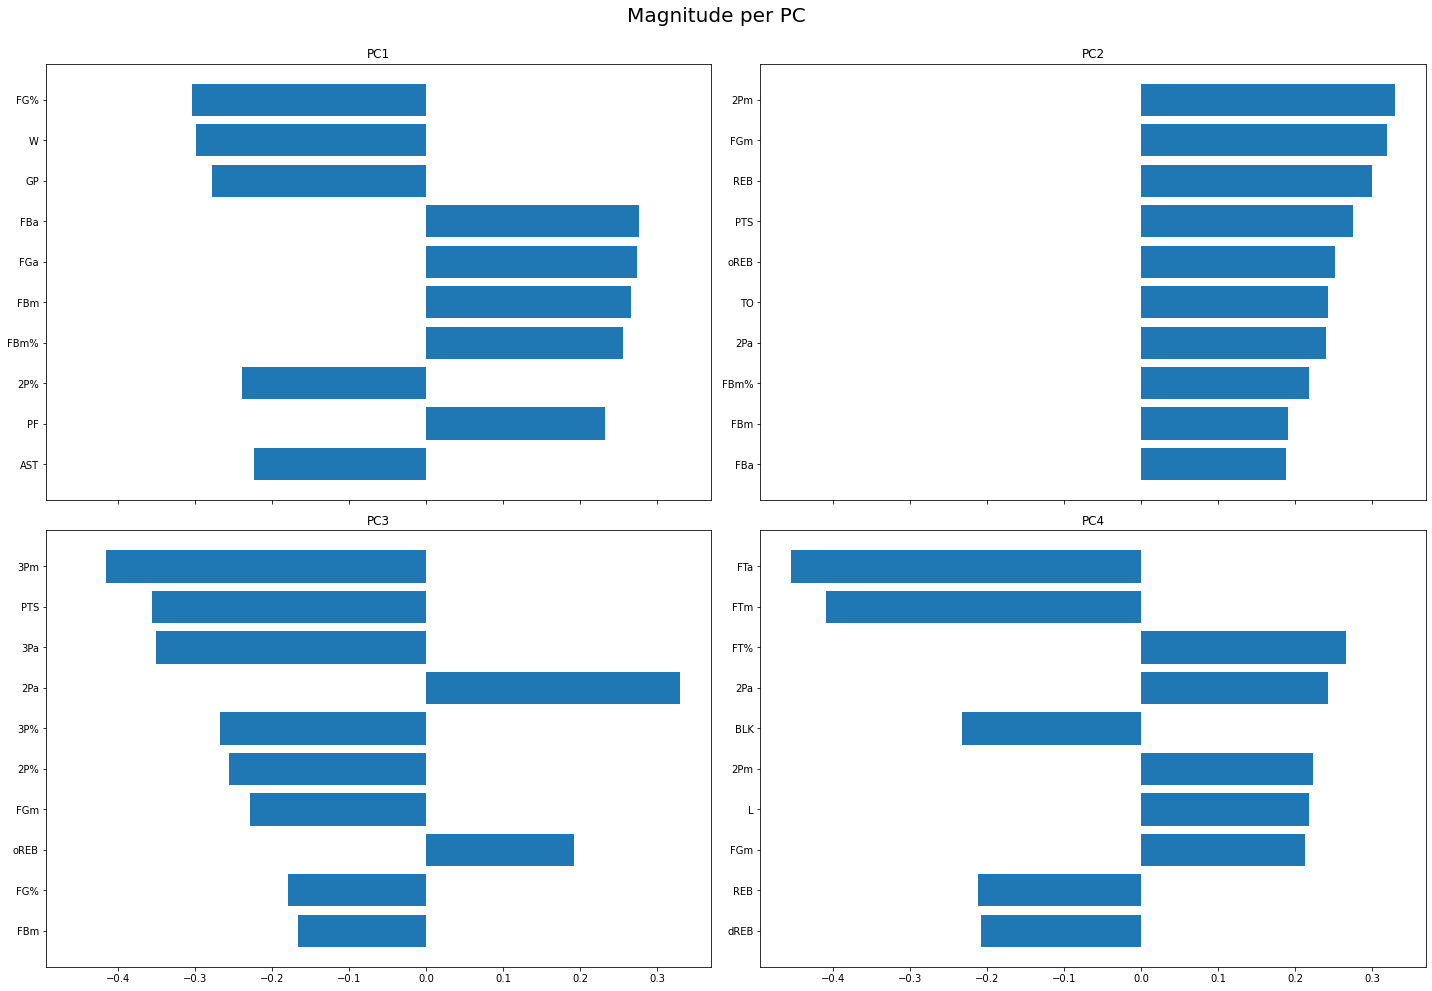

In [1126]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

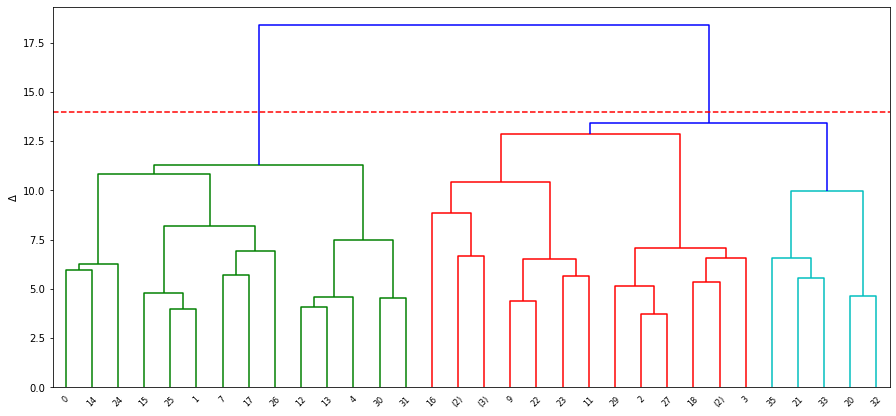

In [1133]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(14, c='r', linestyle='dashed');

#### Single Linkage Method

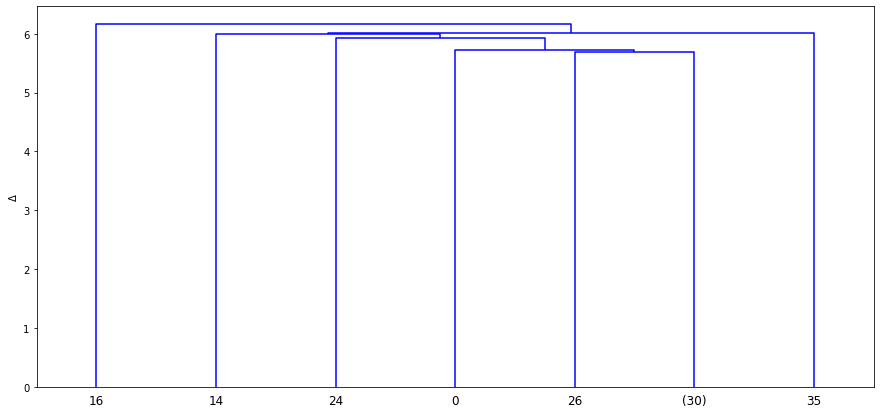

In [1128]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

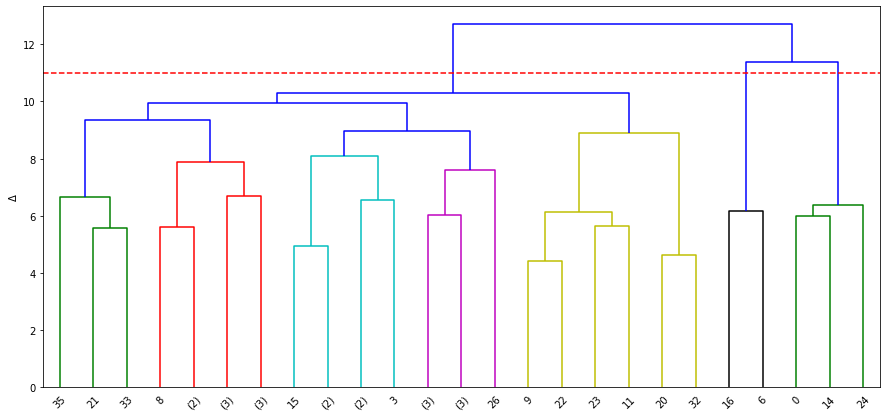

In [1129]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

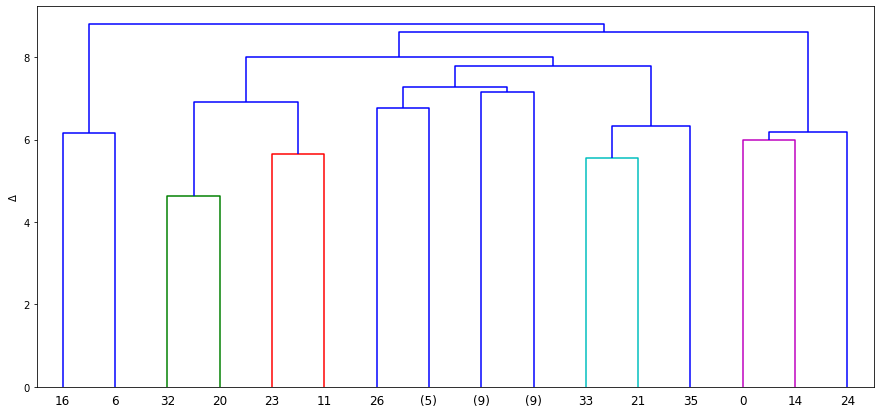

In [1130]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

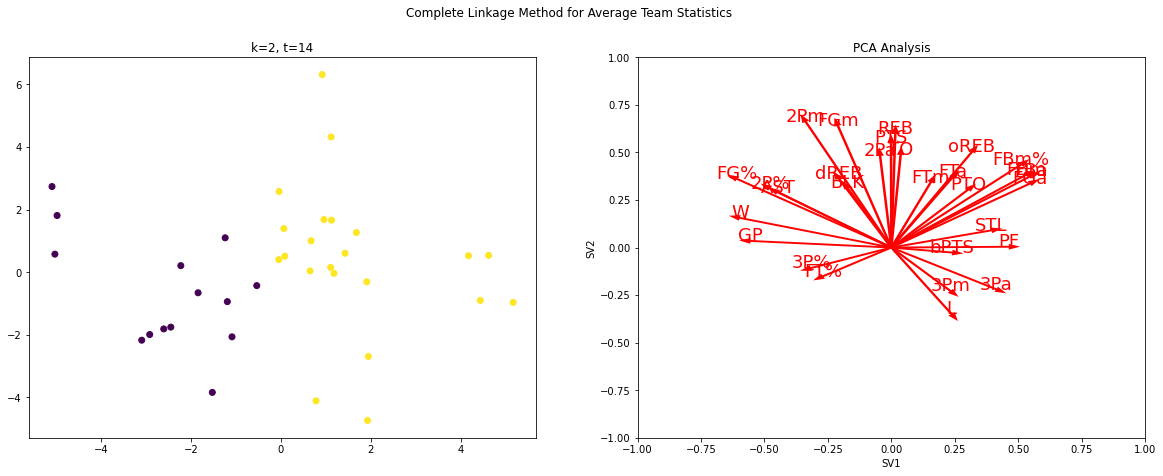

In [1134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 14, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

We have examined the performance of each Agglomerative clustering method using dendrograms. From the results we have gathered, we infer that using Ward's method is the best for this scenario. Unlike the other methods, Ward's method formed clusters that are far from each other, and the number of each data point within the cluster is balanced. Three groups yield the longest distance from other clusters with a threshold of 70.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is bPTS while PTS is the most dominant feature in SV1. As the two most dominant feature in the dataset are orthogonal to one another, we infer that there is no correlation between PTS and bPTS. Based on the magnitude of the bPTS, we can cluster the dataset with teams with low bPTS.

In [1135]:
y_cluster = fcluster(Z_ward, t=14, criterion='distance')
df_avg_team_gov['cluster'] = y_cluster

#### Radar plot

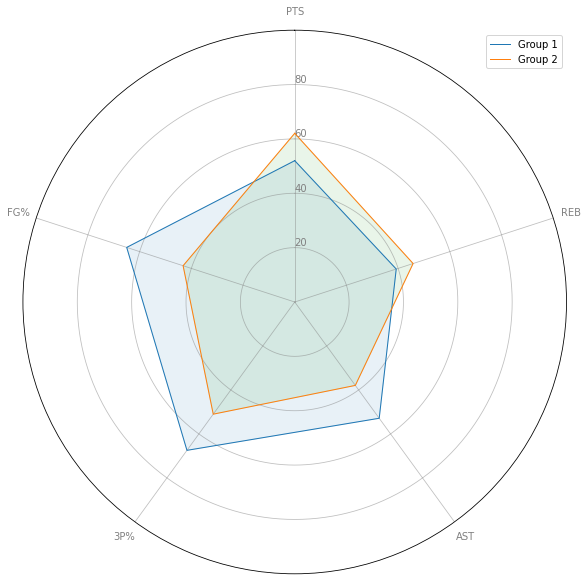

In [1136]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_gov[['cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average team statistics Commisioner's Cup

In [1137]:
m1 = df_avg_team.conference == 'COM'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_com = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_com.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

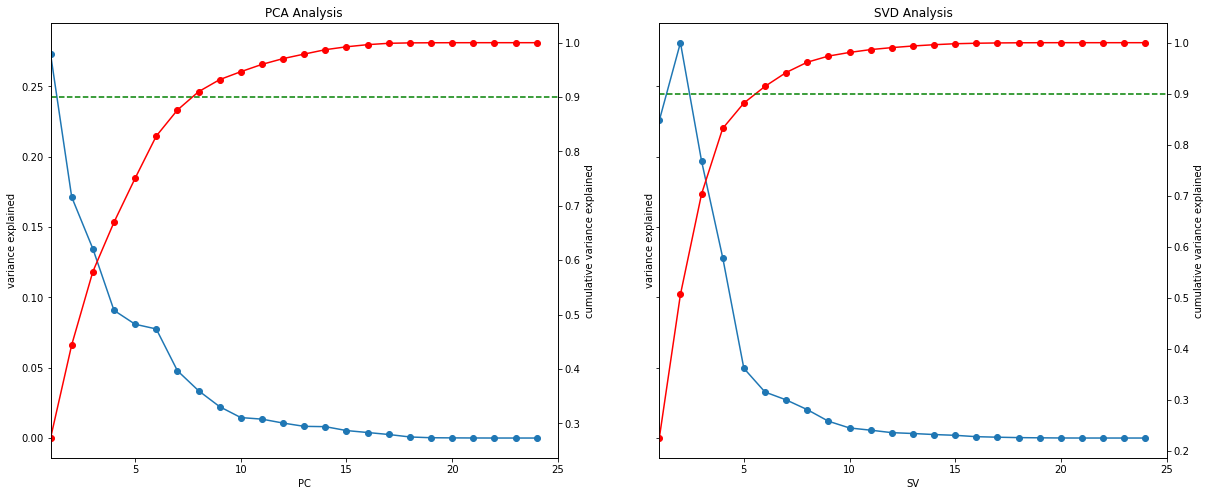

In [1138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved a 90% cumulative explained variance with just seven components where using PCA needed eleven components.

In [1139]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

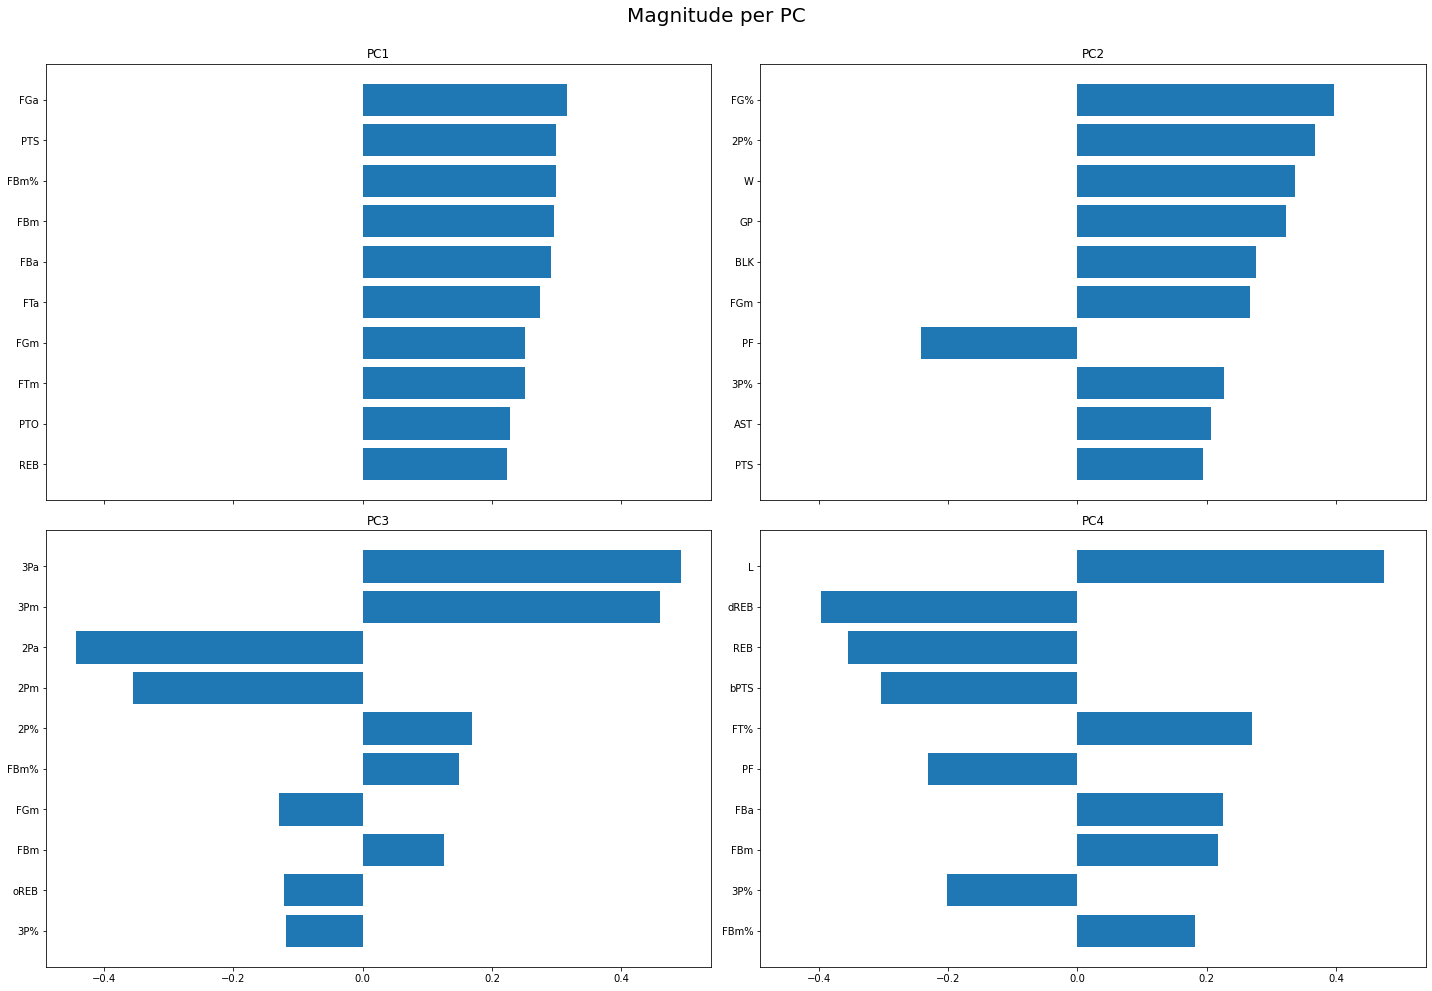

In [1140]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

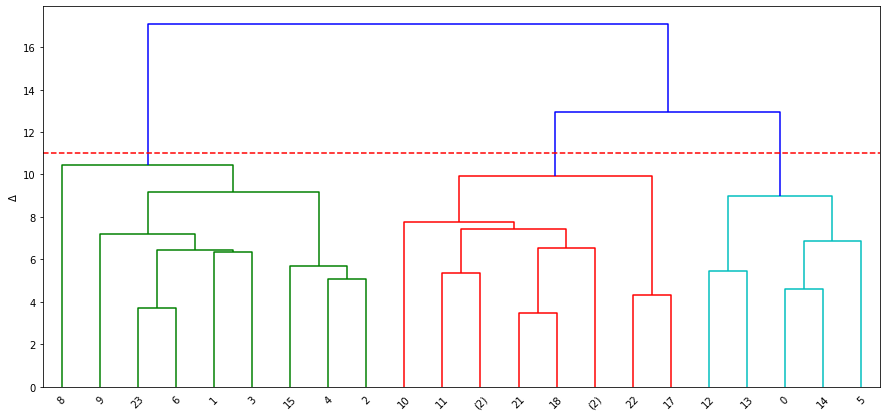

In [1141]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Single Linkage Method

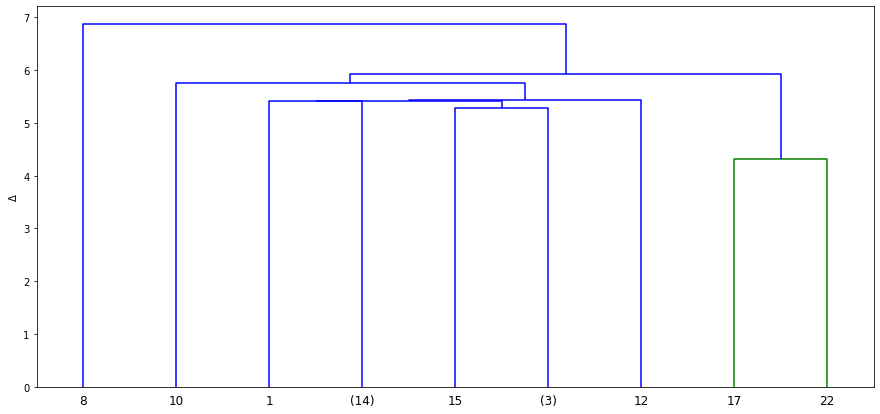

In [1142]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

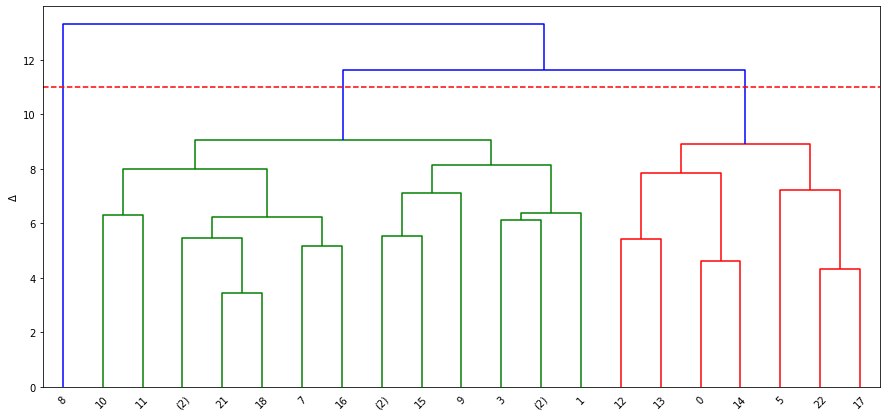

In [1143]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

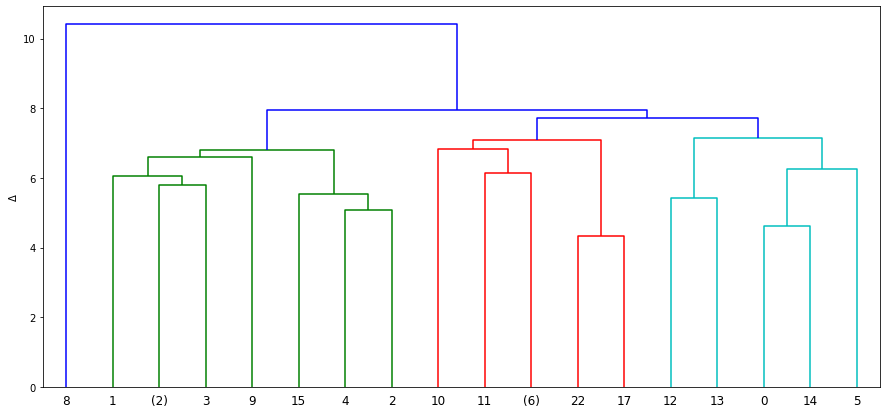

In [1144]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

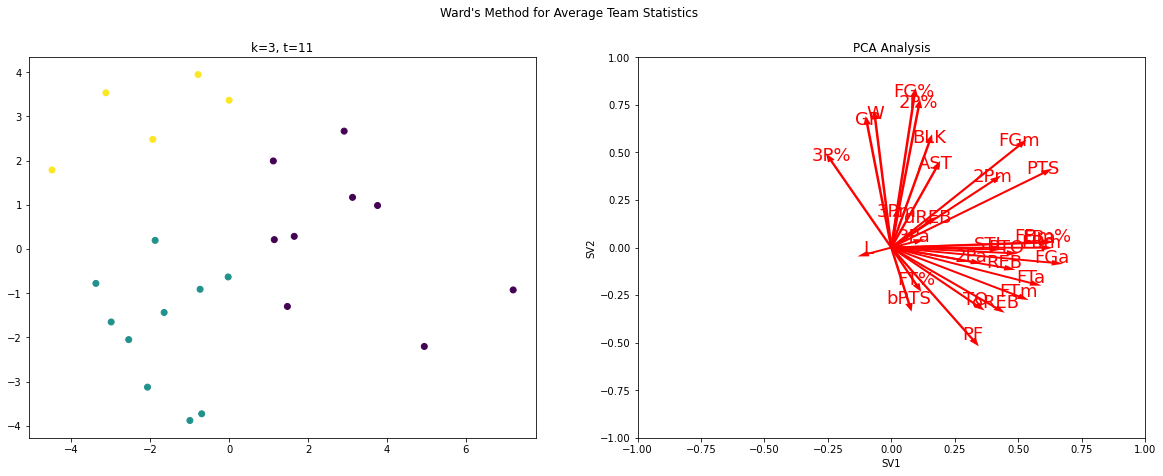

In [1146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 11, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

We have examined the performance of each Agglomerative clustering method using dendrograms. From the results we have gathered, we infer that using Ward's method is the best for this scenario. Unlike the other methods, Ward's method formed clusters that are far from each other, and the number of each data point within the cluster is balanced. Three groups yield the longest distance from other clusters with a threshold of 70.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is bPTS while PTS is the most dominant feature in SV1. As the two most dominant feature in the dataset are orthogonal to one another, we infer that there is no correlation between PTS and bPTS. Based on the magnitude of the bPTS, we can cluster the dataset with teams with low bPTS.

In [1147]:
y_cluster = fcluster(Z_ward, t=11, criterion='distance')
df_avg_team_com['cluster'] = y_cluster

#### Radar plot

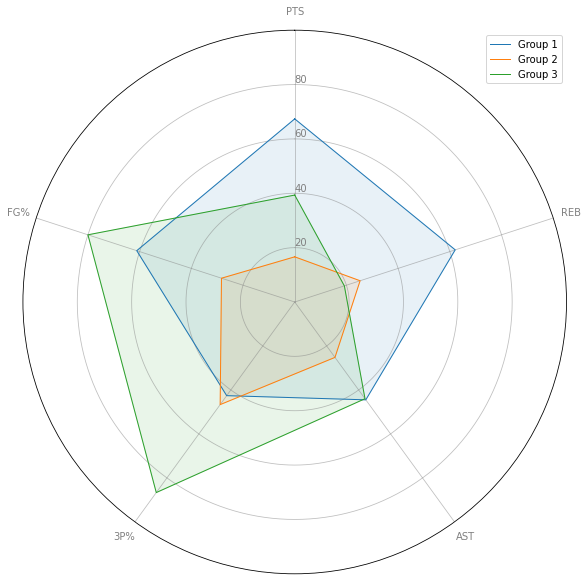

In [1148]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_com[['cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

### Average team statistics Philippine Cup

In [1149]:
m1 = df_avg_team.conference == 'PH'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_ph = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_ph.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

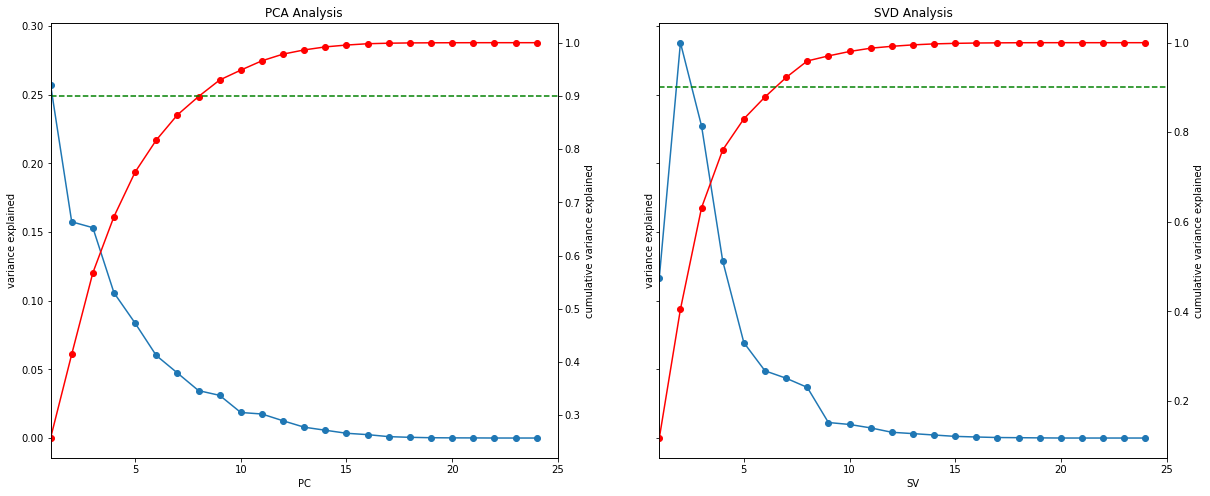

In [1152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved a 90% cumulative explained variance with just seven components where using PCA needed eleven components.

In [1153]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

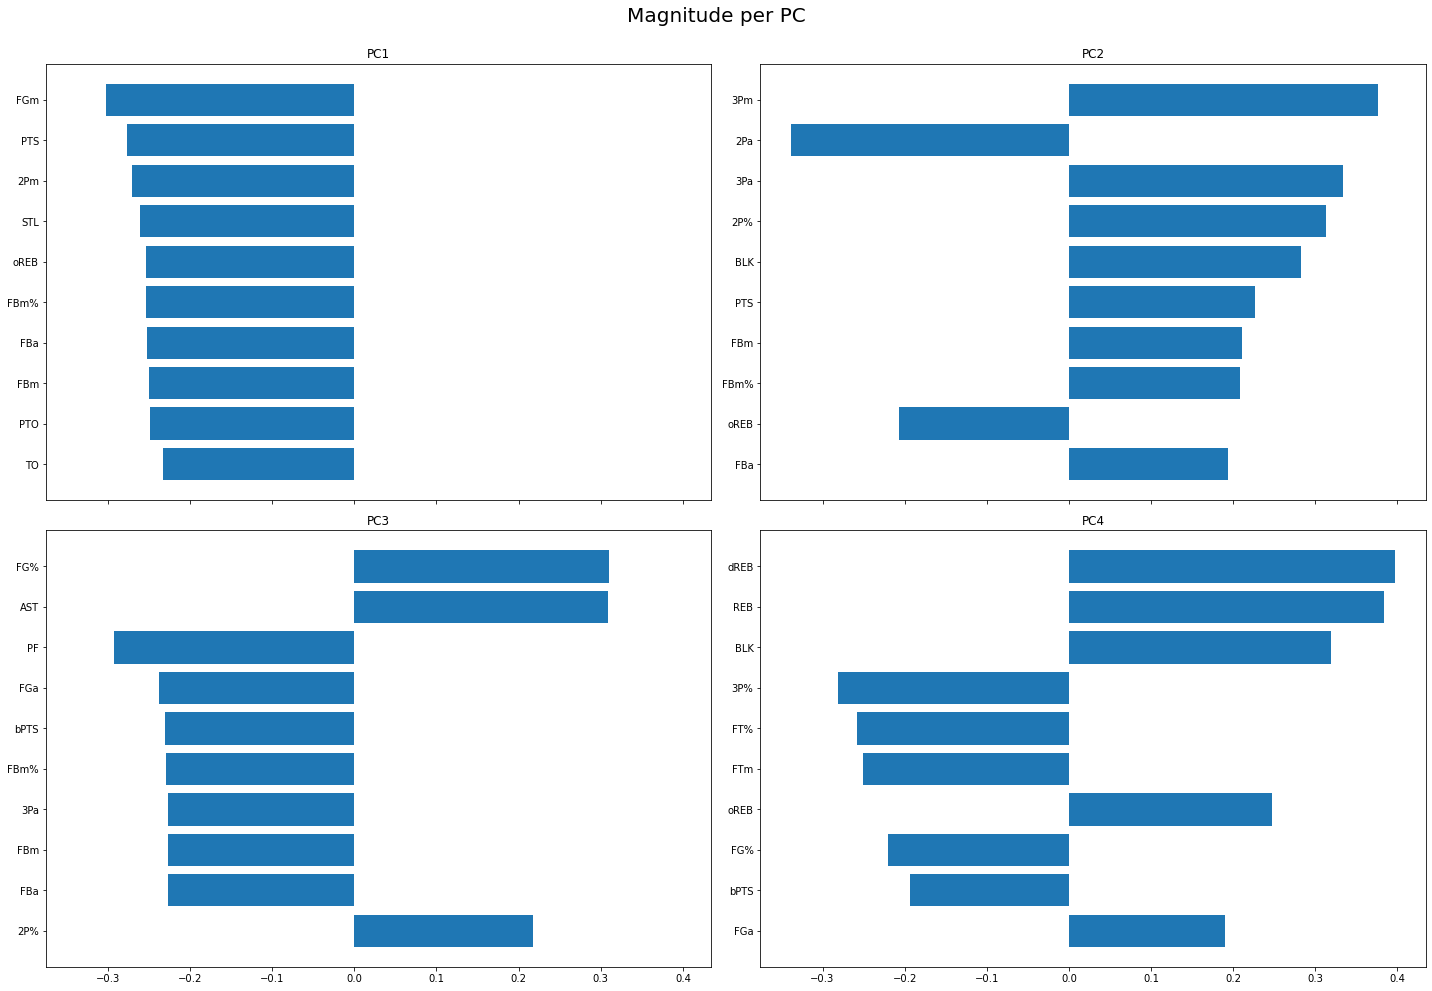

In [1154]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

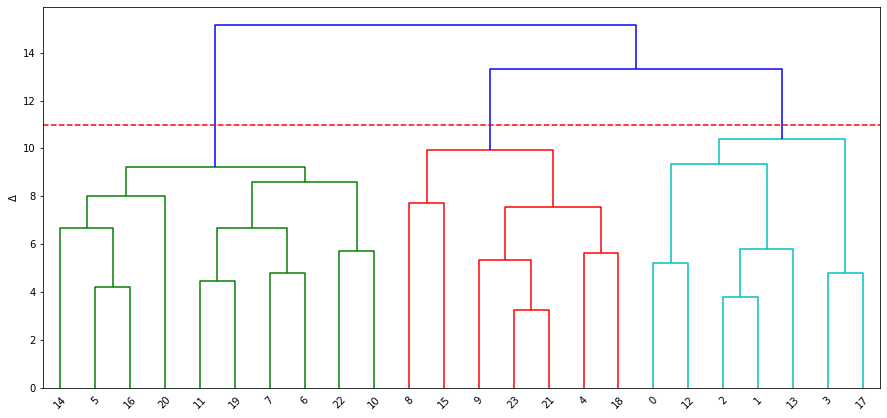

In [1157]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Single Linkage Method

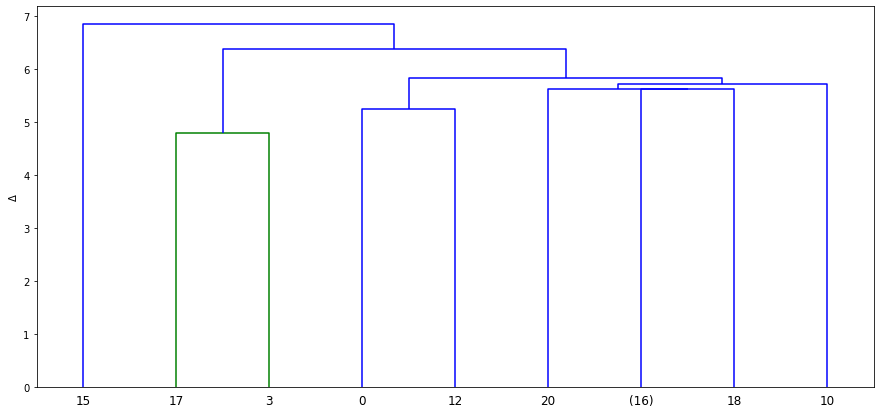

In [1116]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

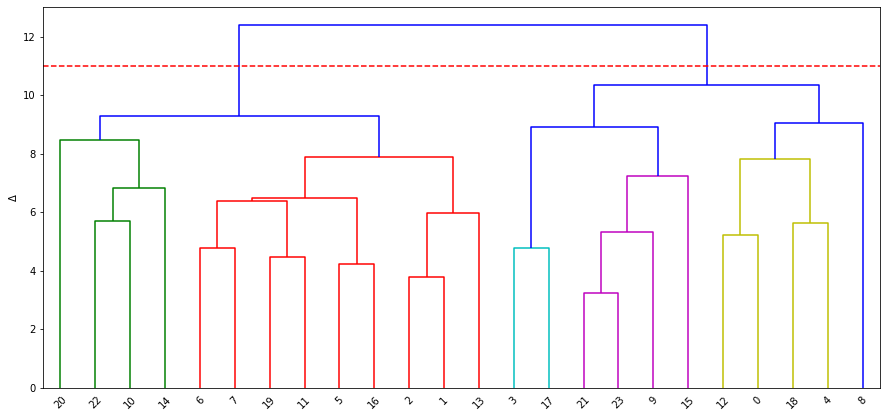

In [1117]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

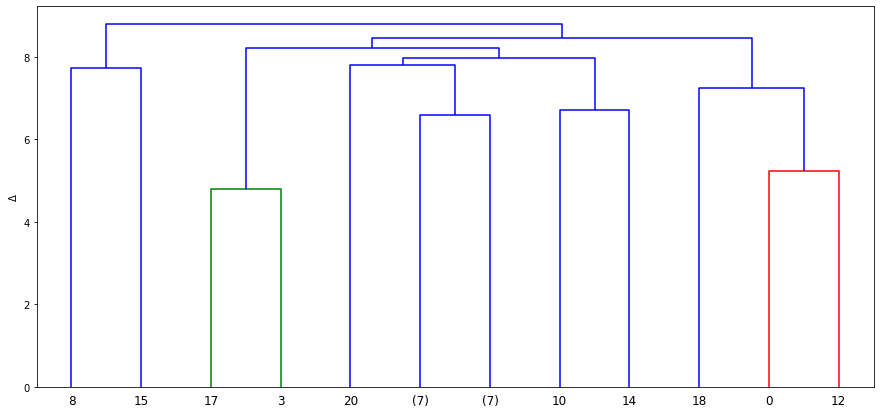

In [1118]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

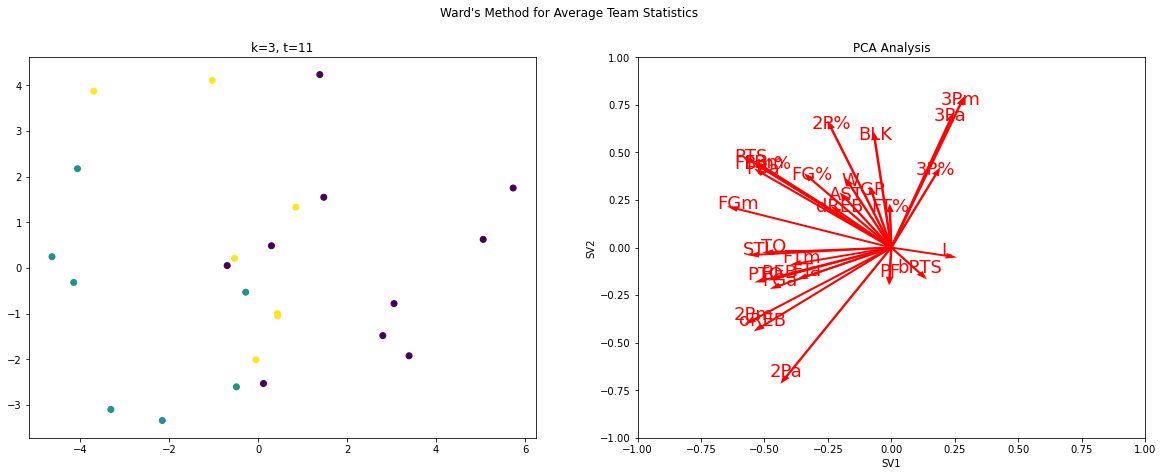

In [1158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 11, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

We have examined the performance of each Agglomerative clustering method using dendrograms. From the results we have gathered, we infer that using Ward's method is the best for this scenario. Unlike the other methods, Ward's method formed clusters that are far from each other, and the number of each data point within the cluster is balanced. Three groups yield the longest distance from other clusters with a threshold of 70.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is bPTS while PTS is the most dominant feature in SV1. As the two most dominant feature in the dataset are orthogonal to one another, we infer that there is no correlation between PTS and bPTS. Based on the magnitude of the bPTS, we can cluster the dataset with teams with low bPTS.

In [1159]:
y_cluster = fcluster(Z_ward, t=11, criterion='distance')
df_avg_team_ph['cluster'] = y_cluster

#### Radar plot

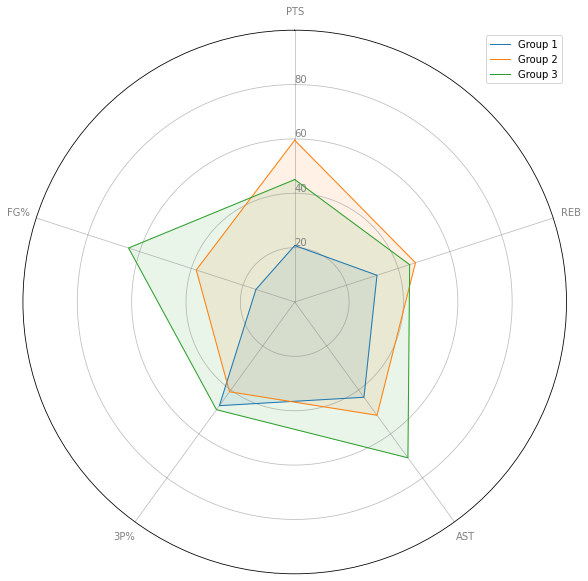

In [1160]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_ph[['cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

## Average + Total Team Statistics

In [889]:
df_tot_team = fetcher.get_avg_total_team()
df_tot_team = df_tot_team.loc[df_tot_team.year.astype(int) < 2020]
features_raw = df_tot_team.drop(['year', 'conference', 'team_name'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)

### Explore Dimensionality Reduction

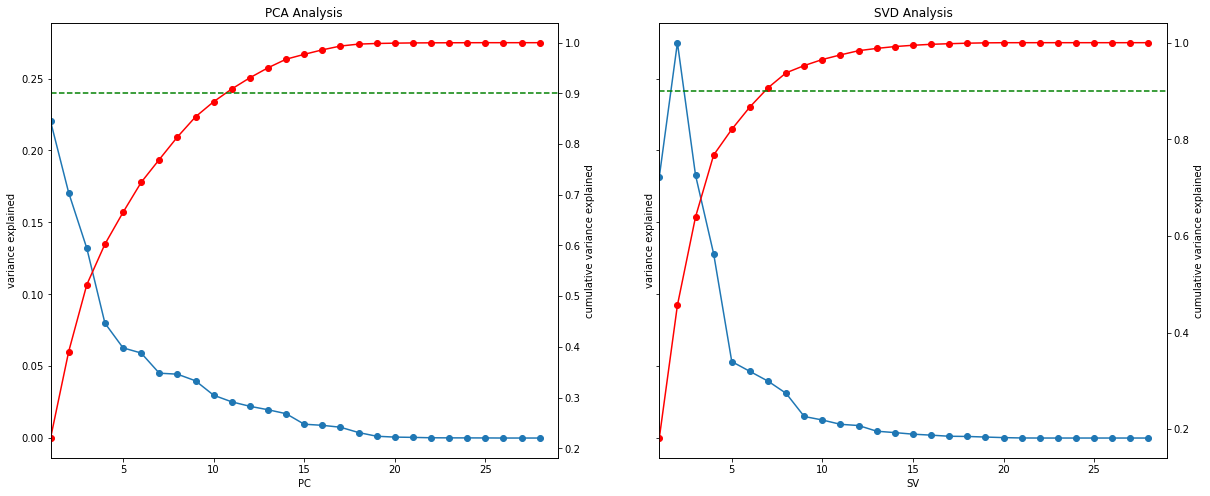

In [891]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved a 90% cumulative explained variance with just seven components where using PCA needed eleven components.

In [892]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

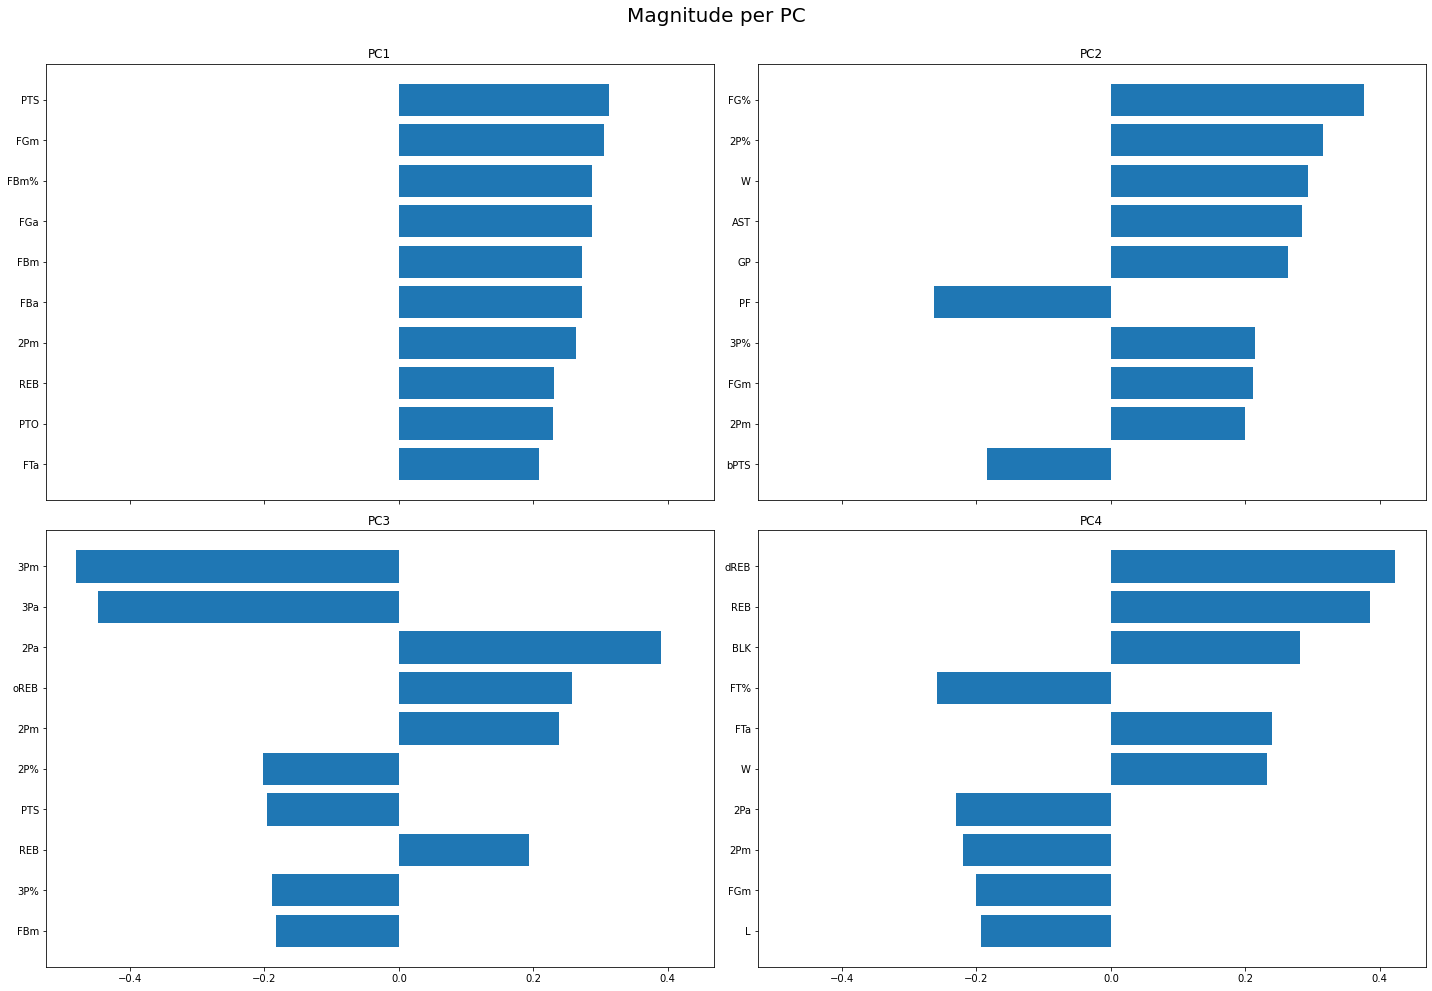

In [893]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

### Ward's Method

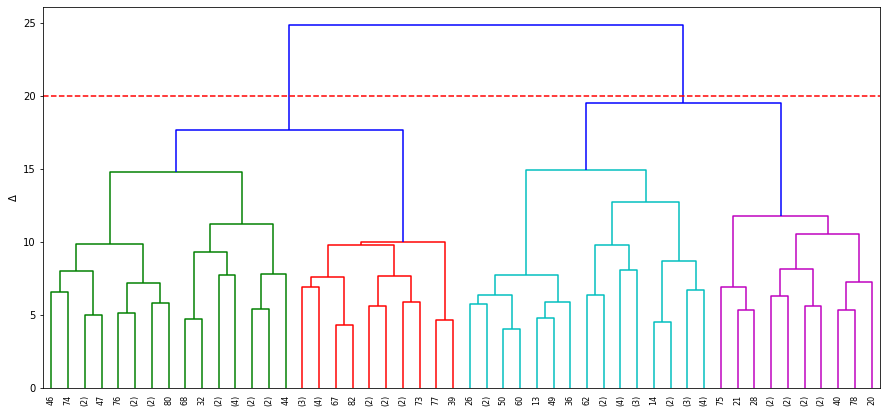

In [895]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(20, c='r', linestyle='dashed');

### Single Linkage Method

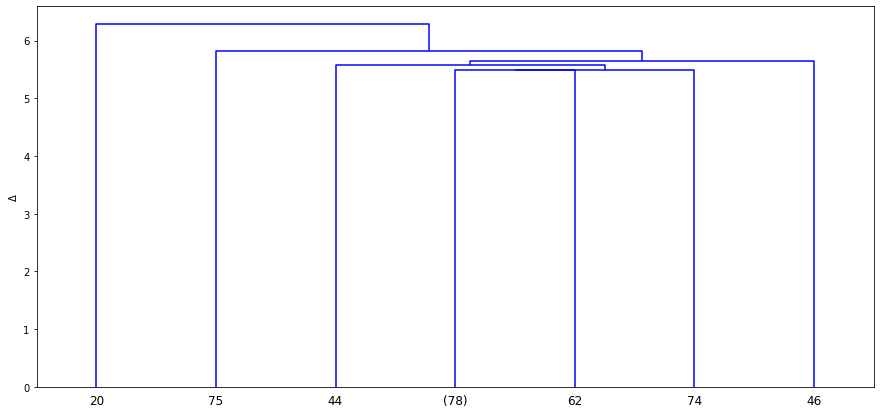

In [896]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

### Complete Linkage Method

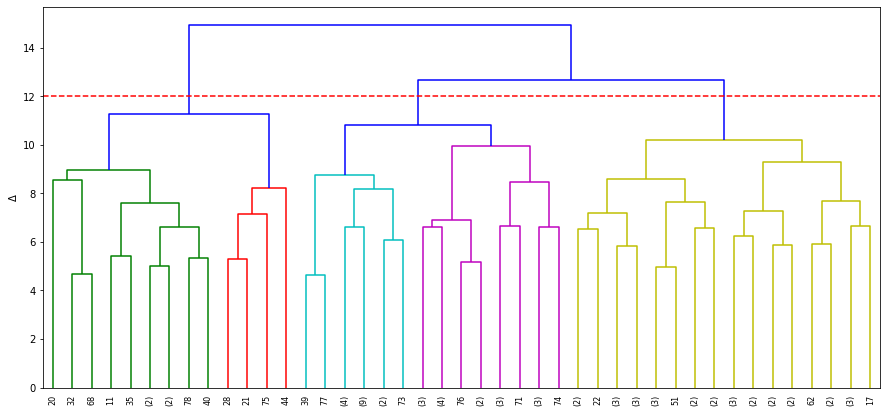

In [899]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(12, c='r', linestyle='dashed');

### Average Linkage Method

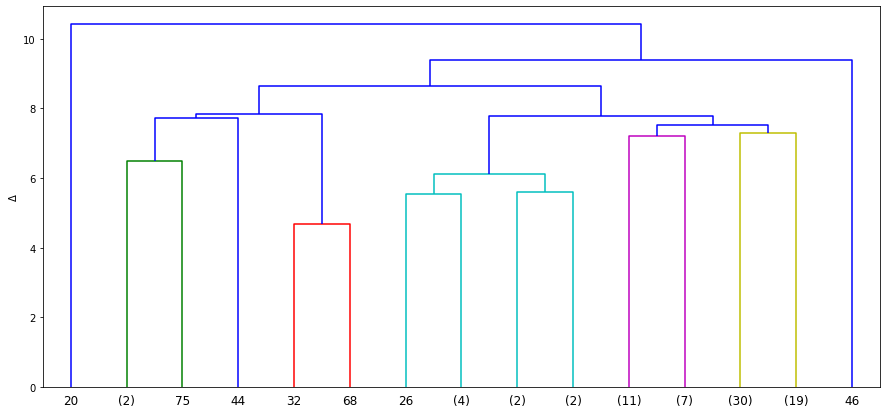

In [900]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

### Result

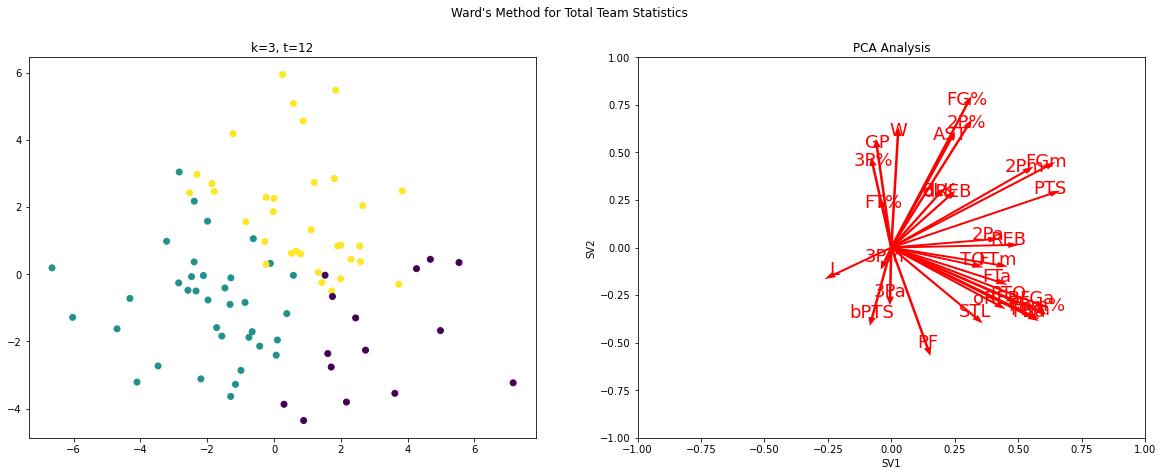

In [902]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 12, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Total Team Statistics");

We have examined the performance of each Agglomerative clustering method using dendrograms. From the results we have gathered, we infer that using Ward's method is the best for this scenario. Unlike the other methods, Ward's method formed clusters that are far from each other, and the number of each data point within the cluster is balanced. Three groups yield the longest distance from other clusters with a threshold of 70.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is bPTS while PTS is the most dominant feature in SV1. As the two most dominant feature in the dataset are orthogonal to one another, we infer that there is no correlation between PTS and bPTS. Based on the magnitude of the bPTS, we can cluster the dataset with players with low bPTS.